<div class="alert alert-block alert-info">
<center> <h1> DATA MINING MDSAA-BA </h1> </center> <br>
<center> PVA PROJECT 2020/2021 </center>

**GROUP AZ:** <br>
- Ana Paulino (20170743) <br>
- Soraia Cunha (20170806)

**Table of Contents** <br>
* [1.Import Libraries](#importlibraries)
* [2.Import Dataset](#importdataset)
* [3. Initial Analysis](#initialanalysis)
* [4. Data Pre-Processing](#datapreprocessing)
    * [4.1 Fill empty cells](#fillemptycells)
    * [4.2. METRIC and NON METRIC FEATURES](#metricandnonmetric)
    * [4.3. Filling Missing Values - 2ND TIME](#fillmissingvalues)
    * [4.4. CATEGORIES OF VARIABLES](#categoriesofvariables)
    * [4.5. REDEFINITION OF METRIC & NON METRIC FEATURES](#features)
    * [4.6. Graphics](#graphics)
    * [4.7. Transforming data type](#transformingdatatype)
    * [4.8. New variables](#newvariables)
    * [4.9. Incoherents](#incoherents)
    * [4.10. Correlation](#correlation)
* [5. Outliers](#outliers)
    * [5.1. IQR](#iqr)
    * [5.2. LOF](#lof)
    * [5.3. Z-Score](#zscore)
    * [5.4. LOF & Z-Score](#lofzscore)
    * [5.5. DBSCAN](#dbscan)
* [6. Standardization](#standardization)
* [7. More relevant features](#features)
* [8. PCA](#pca)
* [9. Clustering](#clustering)
    * [9.1. K-means - all donors dataset](#kmeans)
    * [9.2. Clustering using different perspectives](#perspectives)
    * [9.3. Comparing the cluster algorithms](#comparing)
    * [9.4. K-Prototypes](#kprototypes)
    * [9.5. T-SNE](#tsne)
* [10. Outliers Classification](#classification)
    
    

<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import libraries
    
</a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import dataset
    
</a>

In [2]:
donors=pd.DataFrame(pd.read_csv("donors.csv")) # Load data

<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>

In [3]:
donors.head(50) # checking data

Unnamed: 0     ODATEDW OSOURCE  TCODE STATE     ZIP MAILCODE PVASTATE  \
0            0  2009-01-01     GRI      0    IL   61081                     
1            1  2014-01-01     BOA      1    CA   91326                     
2            2  2010-01-01     AMH      1    NC   27017                     
3            3  2007-01-01     BRY      0    CA   95953                     
4            4  2006-01-01              0    FL   33176                     
5            5  2014-01-01     CWR      0    AL   35603                     
6            6  2007-01-01     DRK      0    IN   46755                     
7            7  2014-01-01     NWN      0    LA   70611                     
8            8  2008-01-01     LIS      1    IA   51033                     
9            9  2014-01-01     MSD      1    TN  37127-                     
10          10  2016-01-01     AGR      0    KS   67335                     
11          11  2016-01-01     CSM      1    IN   46220                     
12          12  2009-01-01     ENQ      0    MN   56475                     
13          13  2012-01-01     HCC      1    LA   70791                     
14          14  2013-01-01     USB      1    UT   84720                     
15          15  2014-01-01     FRC      1    CA   90056                     
16          16  2014-01-01     RKB      0    MI   48067                     
17          17  2008-01-01     PCH      2    IL   62376                     
18          18  2006-01-01     AMB     28    FL   32810        B            
19          19  2015-01-01     L15      1    NC   27850                     
20          20  2007-01-01     BBK      2    MN   55125                     
21          21  2016-01-01     L21      1    MI   49247                     
22          22  2014-01-01     SYN      0    FL   33983                     
23          23  2013-01-01     L01      2    IL   60042                     
24          24  2015-01-01     MOP      0    MN   55044                     
25          25  2011-01-01     UCA      0    CA  93527-                     
26          26  2016-01-01     ESN      0    IL   60091                     
27          27  2012-01-01     L01      1    MO   64468                     
28          28  2011-01-01     IMP      0    TX   77381                     
29          29  2011-01-01     AVN      0    IL   62249                     
30          30  2010-01-01     SYN      0    TX   77546                     
31          31  2015-01-01     RMG      1    MO   63031                     
32          32  2015-01-01     DNA     28    NC   27106                     
33          33  2012-01-01     L04      3    FL   33143                     
34          34  2011-01-01     AML      1    OR   97008                     
35          35  2015-01-01              1    OR   97708                     
36          36  2015-01-01     AIR      1    TX   78748                     
37          37  2006-01-01     DUR      0    CA   90274                     
38          38  2010-01-01     LHJ      0    MN   55112                     
39          39  2006-01-01     WKB      0    MN  55066-                     
40          40  2013-01-01     AGR      0    IL   61604                     
41          41  2007-01-01     STL      2    MI   49506                     
42          42  2015-01-01     DCD      1    WA   98006                     
43          43  2013-01-01     AGR      1    FL   33332                     
44          44  2012-01-01     IMA      0    WI   53221                     
45          45  2006-01-01     DRK      0    IA   52402                     
46          46  2006-01-01     GRI      0    AL   36322                     
47          47  2011-01-01     L01      1    IN   46350                     
48          48  2009-01-01     ACS      1    WA   98116                     
49          49  2015-01-01     ALZ      1    TX   75606                     

           DOB NOEXCH  ...    AVGGIFT CONTROLN HPHONE_D RFA_2R RFA_2F RFA_2A

In [4]:
donors=donors.iloc[0:,1:476]

In [5]:
donors.describe(include="all")

ODATEDW OSOURCE         TCODE  STATE    ZIP MAILCODE PVASTATE  \
count        95412   95412  95412.000000  95412  95412    95412    95412   
unique          54     896           NaN     57  19938        2        3   
top     2015-01-01     MBC           NaN     CA  85351                     
freq         15358    4539           NaN  17343     61    94013    93954   
mean           NaN     NaN     54.223117    NaN    NaN      NaN      NaN   
std            NaN     NaN    953.844476    NaN    NaN      NaN      NaN   
min            NaN     NaN      0.000000    NaN    NaN      NaN      NaN   
25%            NaN     NaN      0.000000    NaN    NaN      NaN      NaN   
50%            NaN     NaN      1.000000    NaN    NaN      NaN      NaN   
75%            NaN     NaN      2.000000    NaN    NaN      NaN      NaN   
max            NaN     NaN  72002.000000    NaN    NaN      NaN      NaN   

               DOB NOEXCH RECINHSE  ...       AVGGIFT       CONTROLN  \
count        71529  95412    95412  ...  95412.000000   95412.000000   
unique         847      6        2  ...           NaN            NaN   
top     1968-01-01      0           ...           NaN            NaN   
freq          1479  61203    88709  ...           NaN            NaN   
mean           NaN    NaN      NaN  ...     13.347786   95778.176959   
std            NaN    NaN      NaN  ...     10.769997   55284.596094   
min            NaN    NaN      NaN  ...      1.285714       1.000000   
25%            NaN    NaN      NaN  ...      8.384615   47910.750000   
50%            NaN    NaN      NaN  ...     11.636364   95681.500000   
75%            NaN    NaN      NaN  ...     15.477955  143643.500000   
max            NaN    NaN      NaN  ...   1000.000000  191779.000000   

            HPHONE_D RFA_2R        RFA_2F RFA_2A MDMAUD_R MDMAUD_F MDMAUD_A  \
count   95412.000000  95412  95412.000000  95412    95412    95412    95412   
unique           NaN      1           NaN      4        5        4        5   
top              NaN      L           NaN      F        X        X        X   
freq             NaN  95412           NaN  46964    95118    95118    95118   
mean        0.500618    NaN      1.910053    NaN      NaN      NaN      NaN   
std         0.500002    NaN      1.072749    NaN      NaN      NaN      NaN   
min         0.000000    NaN      1.000000    NaN      NaN      NaN      NaN   
25%         0.000000    NaN      1.000000    NaN      NaN      NaN      NaN   
50%         1.000000    NaN      2.000000    NaN      NaN      NaN      NaN   
75%         1.000000    NaN      3.000000    NaN      NaN      NaN      NaN   
max         1.000000    NaN      4.000000    NaN      NaN      NaN      NaN   

       GEOCODE2  
count     95280  
unique        5  
top           A  
freq      34484  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  

[11 rows x 475 columns]

In [6]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 475 entries, ODATEDW to GEOCODE2
dtypes: float64(49), int64(301), object(125)
memory usage: 345.8+ MB


In [7]:
donors.isnull().sum().head(50)# Count missing values

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
dtype: int64

In [8]:
donors.isnull().sum().tail(50)

RDATE_19    79535
RDATE_20    87524
RDATE_21    85899
RDATE_22    74539
RDATE_23    87553
RDATE_24    77674
RAMNT_3     95170
RAMNT_4     95131
RAMNT_5     95403
RAMNT_6     94636
RAMNT_7     86517
RAMNT_8     73940
RAMNT_9     78678
RAMNT_10    84951
RAMNT_11    80672
RAMNT_12    69712
RAMNT_13    83162
RAMNT_14    72095
RAMNT_15    88150
RAMNT_16    68418
RAMNT_17    86011
RAMNT_18    75634
RAMNT_19    79535
RAMNT_20    87524
RAMNT_21    85899
RAMNT_22    74539
RAMNT_23    87553
RAMNT_24    77674
RAMNTALL        0
NGIFTALL        0
CARDGIFT        0
MINRAMNT        0
MINRDATE        0
MAXRAMNT        0
MAXRDATE        0
LASTGIFT        0
LASTDATE        0
FISTDATE        2
NEXTDATE     9973
TIMELAG      9973
AVGGIFT         0
CONTROLN        0
HPHONE_D        0
RFA_2R          0
RFA_2F          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      132
dtype: int64

In [9]:
donors.duplicated().value_counts() # Counting duplicated data

False    95412
dtype: int64

In [10]:
donors.shape # dataframe shape(rows,columns)

(95412, 475)

In [11]:
donors.dtypes.unique() #data types

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [12]:
donors=donors[donors.columns[donors.isnull().sum() < 47706]] # eliminate columns with 50% or more of missing values

In [13]:
donors.shape

(95412, 413)

In [14]:
donors.isnull().sum().head(50)# Count missing values again

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG           0
HOMEE           0
PETS            0
CDPLAY          0
STEREO          0
PCOWNERS        0
PHOTO           0
CRAFTS          0
FISHER          0
GARDENIN        0
dtype: int64

In [15]:
# sample=donors.loc[:2000]

In [16]:
# from pandas_profiling import ProfileReport

In [17]:
# sample = donors.sample(5000)
#ProfileReport(sample, minimal=True)


<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Data Pre-Processing
    
</a>

<hr>
<a class="anchor" id="fillemptycells">
    
## 4.1 Fill empty cells
    
</a>

In [18]:
toreplace = [' ', 'A', 'C']
donors['GENDER'] = donors['GENDER'].replace(toreplace, 'U')
donors['GENDER'].value_counts()

F    51277
M    39094
U     4676
J      365
Name: GENDER, dtype: int64

In [19]:
donors['HOMEOWNR'] = donors['HOMEOWNR'].replace(' ', 'U')
donors['HOMEOWNR'].value_counts()

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

In [20]:
donors['MAILCODE'] = donors['MAILCODE'].replace(' ', 'O')
donors['CHILD03'] = donors['CHILD03'].replace(' ', 'N')
donors['CHILD07'] = donors['CHILD07'].replace(' ', 'N')
donors['CHILD12'] = donors['CHILD12'].replace(' ', 'N')
donors['CHILD18'] = donors['CHILD18'].replace(' ', 'N')

In [21]:
donors['COLLECT1'] = donors['COLLECT1'].replace(' ', 'N')
donors['VETERANS'] = donors['VETERANS'].replace(' ', 'N')
donors['BIBLE'] = donors['BIBLE'].replace(' ', 'N')
donors['CATLG'] = donors['CATLG'].replace(' ', 'N')
donors['HOMEE'] = donors['HOMEE'].replace(' ', 'N')
donors['PETS'] = donors['PETS'].replace(' ', 'N')
donors['CDPLAY'] = donors['CDPLAY'].replace(' ', 'N')
donors['STEREO'] = donors['STEREO'].replace(' ', 'N')
donors['PCOWNERS'] = donors['PCOWNERS'].replace(' ', 'N')
donors['PHOTO'] = donors['PHOTO'].replace(' ', 'N')
donors['CRAFTS'] = donors['CRAFTS'].replace(' ', 'N')
donors['FISHER'] = donors['FISHER'].replace(' ', 'N')
donors['GARDENIN'] = donors['BOATS'].replace(' ', 'N')
donors['BOATS'] = donors['BOATS'].replace(' ', 'N')
donors['WALKER'] = donors['WALKER'].replace(' ', 'N')
donors['KIDSTUFF'] = donors['KIDSTUFF'].replace(' ', 'N')
donors['CARDS'] = donors['CARDS'].replace(' ', 'N')
donors['PLATES'] = donors['PLATES'].replace(' ', 'N')

In [22]:
donors.replace(" ", np.nan, inplace=True)

In [23]:
donors['MAJOR'].value_counts()

X    294
Name: MAJOR, dtype: int64

In [24]:
donors['CHILD03'] = donors['CHILD03'].replace(np.nan, 'N')
donors['CHILD07'] = donors['CHILD07'].replace(np.nan, 'N')
donors['CHILD12'] = donors['CHILD12'].replace(np.nan, 'N')
donors['CHILD18'] = donors['CHILD18'].replace(np.nan, 'N')

donors['SOLP3'] = donors['SOLP3'].replace(np.nan, 'Default')
donors['SOLIH'] = donors['SOLIH'].replace(np.nan, 'Default')
donors['MAJOR'] = donors['MAJOR'].replace(np.nan, 'N')
donors['PEPSTRFL'] = donors['PEPSTRFL'].replace(np.nan, 'N')

In [25]:
donors['PEPSTRFL'].value_counts()

N    50143
X    45269
Name: PEPSTRFL, dtype: int64

In [26]:
donors.isnull().sum().tail(50)
# osource nan
# PVASTATE nan
# RECINHSE nan
# RECP3    nan   
# RECPGVG   nan  
# RECSWEEP   nan
# DOMAIN nan -> replace mode
# DATASRCE nan -> replace
# GEOCODE nan

RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_5       33590
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_10      32748
RFA_11      10422
RFA_12       8923
RFA_13      40219
RFA_14      18867
RFA_15      65477
RFA_16      20417
RFA_17      27650
RFA_18      21263
RFA_19      24492
RFA_20      50200
RFA_21      35212
RFA_22      25648
RFA_23      56274
RFA_24      36973
CARDPROM        0
MAXADATE        0
NUMPROM         0
CARDPM12        0
NUMPRM12        0
RAMNTALL        0
NGIFTALL        0
CARDGIFT        0
MINRAMNT        0
MINRDATE        0
MAXRAMNT        0
MAXRDATE        0
LASTGIFT        0
LASTDATE        0
FISTDATE        2
NEXTDATE     9973
TIMELAG      9973
AVGGIFT         0
CONTROLN        0
HPHONE_D        0
RFA_2R          0
RFA_2F          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

In [27]:
donors.shape

(95412, 413)

In [28]:
donors=donors[donors.columns[donors.isnull().sum() < 47706]]

In [29]:
donors.shape

(95412, 403)

<a class="anchor" id="metricandnonmetric">

## 4.2. METRIC and NON METRIC FEATURES

</a>

In [30]:
metric_features=donors.select_dtypes(exclude=[object]).columns

In [31]:
len(metric_features)

313

In [32]:
non_metric_features=donors.select_dtypes(include=[object]).columns
len(non_metric_features)

90

<a class="anchor" id="fillmissingvalues">

## 4.3. Filling Missing Values - 2ND TIME

</a>

In [33]:
donors_c=donors.copy()

In [34]:
donors_c.median()  # we use median because isn´t influenced by the outliers

TCODE           1.000000
INCOME          4.000000
WEALTH1         6.000000
HIT             0.000000
DATASRCE        3.000000
                ...     
TIMELAG         6.000000
AVGGIFT        11.636364
CONTROLN    95681.500000
HPHONE_D        1.000000
RFA_2F          2.000000
Length: 314, dtype: float64

In [35]:
modes = donors_c[non_metric_features].mode().loc[0]
modes

ODATEDW     2015-01-01
OSOURCE            MBC
STATE               CA
ZIP              85351
MAILCODE             O
               ...    
RFA_2A               F
MDMAUD_R             X
MDMAUD_F             X
MDMAUD_A             X
GEOCODE2             A
Name: 0, Length: 90, dtype: object

In [36]:
donors_c.fillna(donors_c.median(), inplace=True)

In [37]:
donors_c.fillna(modes, inplace=True)

In [38]:
donors_c.isna().sum().head(50)

ODATEDW     0
OSOURCE     0
TCODE       0
STATE       0
ZIP         0
MAILCODE    0
DOB         0
NOEXCH      0
MDMAUD      0
DOMAIN      0
HOMEOWNR    0
CHILD03     0
CHILD07     0
CHILD12     0
CHILD18     0
INCOME      0
GENDER      0
WEALTH1     0
HIT         0
DATASRCE    0
MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
FEDGOV      0
SOLP3       0
SOLIH       0
MAJOR       0
WEALTH2     0
COLLECT1    0
VETERANS    0
BIBLE       0
CATLG       0
HOMEE       0
PETS        0
CDPLAY      0
STEREO      0
PCOWNERS    0
PHOTO       0
CRAFTS      0
FISHER      0
GARDENIN    0
BOATS       0
WALKER      0
KIDSTUFF    0
CARDS       0
PLATES      0
PEPSTRFL    0
dtype: int64

In [39]:
donors_c.isna().sum().head(50) # checking how many NaNs we still have

ODATEDW     0
OSOURCE     0
TCODE       0
STATE       0
ZIP         0
MAILCODE    0
DOB         0
NOEXCH      0
MDMAUD      0
DOMAIN      0
HOMEOWNR    0
CHILD03     0
CHILD07     0
CHILD12     0
CHILD18     0
INCOME      0
GENDER      0
WEALTH1     0
HIT         0
DATASRCE    0
MALEMILI    0
MALEVET     0
VIETVETS    0
WWIIVETS    0
LOCALGOV    0
STATEGOV    0
FEDGOV      0
SOLP3       0
SOLIH       0
MAJOR       0
WEALTH2     0
COLLECT1    0
VETERANS    0
BIBLE       0
CATLG       0
HOMEE       0
PETS        0
CDPLAY      0
STEREO      0
PCOWNERS    0
PHOTO       0
CRAFTS      0
FISHER      0
GARDENIN    0
BOATS       0
WALKER      0
KIDSTUFF    0
CARDS       0
PLATES      0
PEPSTRFL    0
dtype: int64

In [40]:
nans_index = donors_c.isna().any(axis=1)
donors_c[nans_index]

Empty DataFrame
Columns: [ODATEDW, OSOURCE, TCODE, STATE, ZIP, MAILCODE, DOB, NOEXCH, MDMAUD, DOMAIN, HOMEOWNR, CHILD03, CHILD07, CHILD12, CHILD18, INCOME, GENDER, WEALTH1, HIT, DATASRCE, MALEMILI, MALEVET, VIETVETS, WWIIVETS, LOCALGOV, STATEGOV, FEDGOV, SOLP3, SOLIH, MAJOR, WEALTH2, COLLECT1, VETERANS, BIBLE, CATLG, HOMEE, PETS, CDPLAY, STEREO, PCOWNERS, PHOTO, CRAFTS, FISHER, GARDENIN, BOATS, WALKER, KIDSTUFF, CARDS, PLATES, PEPSTRFL, POP901, POP902, POP903, POP90C1, POP90C2, POP90C3, POP90C4, POP90C5, ETH1, ETH2, ETH3, ETH4, ETH5, ETH6, ETH7, ETH8, ETH9, ETH10, ETH11, ETH12, ETH13, ETH14, ETH15, ETH16, AGE901, AGE902, AGE903, AGE904, AGE905, AGE906, AGE907, CHIL1, CHIL2, CHIL3, AGEC1, AGEC2, AGEC3, AGEC4, AGEC5, AGEC6, AGEC7, CHILC1, CHILC2, CHILC3, CHILC4, CHILC5, HHAGE1, HHAGE2, HHAGE3, HHN1, ...]
Index: []

[0 rows x 403 columns]

In [41]:
donors= donors_c

<a class="anchor" id="categoriesofvariables">

## 4.4. CATEGORIES OF VARIABLES

</a>

<font color='darkblue'> Considering the threshold of **|corr| > 0.90** for removing the highly correlated variables.

***Donor Info***

In [42]:
donorinfo = donors[['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 
                   'MAILCODE', 'DOB', 'MDMAUD', 'DOMAIN',
                   'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18',
                   'INCOME', 'GENDER', 'HIT', 'MAJOR']]

In [43]:
donorinfo.head()

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE         DOB MDMAUD DOMAIN  \
0  2009-01-01     GRI      0    IL  61081        O  1957-12-01   XXXX     T2   
1  2014-01-01     BOA      1    CA  91326        O  1972-02-01   XXXX     S1   
2  2010-01-01     AMH      1    NC  27017        O  1968-01-01   XXXX     R2   
3  2007-01-01     BRY      0    CA  95953        O  1948-01-01   XXXX     R2   
4  2006-01-01     MBC      0    FL  33176        O  1940-01-01   XXXX     S2   

  HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  INCOME GENDER  HIT MAJOR  
0        U       N       N       N       N     4.0      F    0     N  
1        H       N       N       N       M     6.0      M   16     N  
2        U       N       N       N       N     3.0      M    2     N  
3        U       N       N       N       N     1.0      F    2     N  
4        H       N       N       N       N     3.0      F   60     N

In [44]:
donorinfo['CHILD03'].value_counts()

N    94266
M      869
F      237
B       40
Name: CHILD03, dtype: int64

In [45]:
donorinfo['CHILD07'].value_counts()

N    93846
M     1061
F      408
B       97
Name: CHILD07, dtype: int64

In [46]:
donorinfo['CHILD12'].value_counts()

N    93601
M     1149
F      520
B      142
Name: CHILD12, dtype: int64

In [47]:
donorinfo['CHILD18'].value_counts()

N    92565
M     1442
F     1142
B      263
Name: CHILD18, dtype: int64

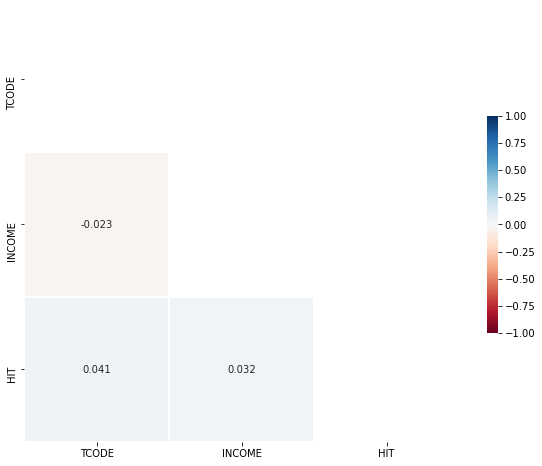

In [48]:
corr = donorinfo.corr(method = 'spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

***Donor interests***

In [49]:
donorinterests = donors[['COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE',
                        'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 
                        'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
                        'KIDSTUFF', 'CARDS', 'PLATES']]

In [50]:
donorinterests.head()

COLLECT1 VETERANS BIBLE CATLG HOMEE PETS CDPLAY STEREO PCOWNERS PHOTO  \
0        N        N     N     N     N    N      N      N        N     N   
1        N        N     N     N     N    N      N      N        N     N   
2        N        N     N     N     N    N      N      N        N     N   
3        N        N     N     N     N    N      N      N        N     N   
4        N        N     Y     Y     N    N      N      Y        N     N   

  CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF CARDS PLATES  
0      N      N        N     N      N        N     N      N  
1      N      N        N     N      N        N     N      N  
2      N      N        N     N      N        N     N      N  
3      N      N        N     N      N        N     N      N  
4      Y      N        N     N      Y        N     Y      N

***Well-being and House changes***

In [51]:
wellbeing = donors[['WEALTH1', 'WEALTH2', 'MC1', 'MC2', 'MC3']]

In [52]:
wellbeing.head()

WEALTH1  WEALTH2  MC1  MC2  MC3
0      6.0      5.0   46   54    3
1      9.0      9.0   56   44    9
2      1.0      1.0   38   62    8
3      4.0      0.0   46   54    3
4      2.0      5.0   20   80    4

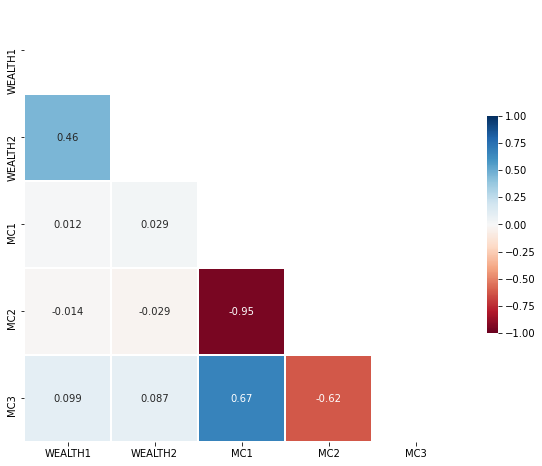

In [53]:
corr = wellbeing.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [54]:
donors = donors.drop(columns=['MC1'])

In [55]:
donors.shape

(95412, 402)

***Others***

In [56]:
others = donors[['DATASRCE', 'MALEMILI', 'MALEVET', 'VIETVETS', 'WWIIVETS',
                'LOCALGOV', 'STATEGOV', 'FEDGOV', 'SOLP3', 'SOLIH',
                'CONTROLN', 'HPHONE_D', 'GEOCODE2']]

In [57]:
others.head()

DATASRCE  MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  \
0        3         0       39        34        18        10         2       1   
1        3         0       15        55        11         6         2       1   
2        3         0       20        29        33         6         8       1   
3        3         0       23        14        31         3         0       3   
4        3         1       28         9        53        26         3       2   

     SOLP3    SOLIH  CONTROLN  HPHONE_D GEOCODE2  
0  Default  Default     95515         0        C  
1  Default  Default    148535         0        A  
2  Default  Default     15078         1        C  
3  Default  Default    172556         1        C  
4  Default       12      7112         1        A

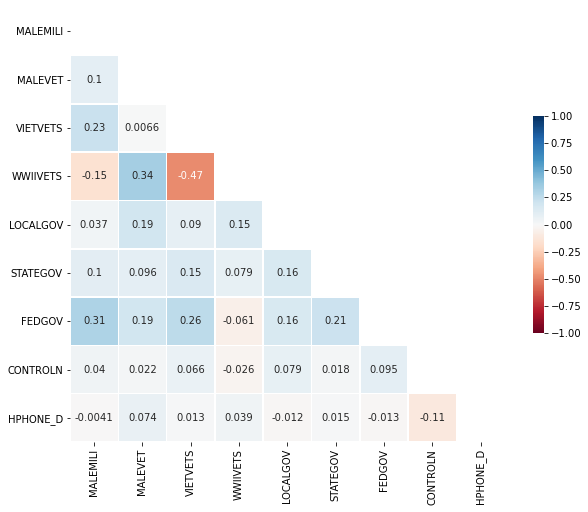

In [58]:
corr = others.corr(method = 'spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

***Neighborhood Other***

In [59]:
neighother = donors[['HC2', 'HC3', 'HC4', 'HC5', 'HC6', 'HC7', 'HC8', 'HC9',
                    'HC10', 'MHUC1', 'MHUC2','ADI','DMA']]

In [60]:
neighother.head()

HC2  HC3  HC4  HC5  HC6  HC7  HC8  HC9  HC10  MHUC1  MHUC2    ADI    DMA
0   31    5   14   14   31   54   46    0     0      6      2  177.0  682.0
1   10    2   26   56   97   99    0    0     0     20      4   13.0  803.0
2   22    3   12   23   50   69   31    0     0      9      2  281.0  518.0
3   38    0   10   19   39   45   55    0     0     16      2   67.0  862.0
4   34    0    1    3    6   33   67    0     0      6      2  127.0  528.0

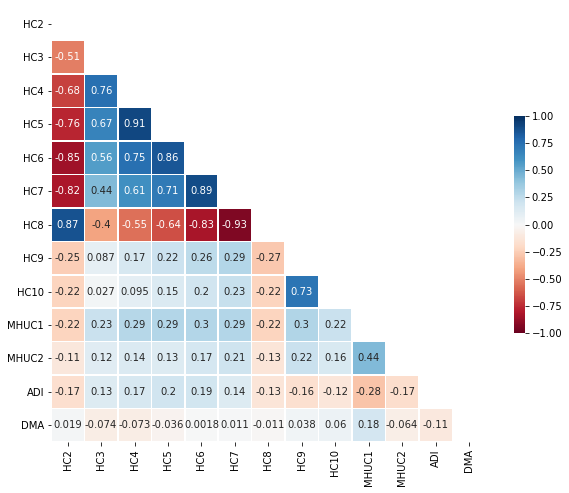

In [61]:
corr = neighother.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [62]:
len(neighother.loc[neighother['HC2'] == ' '])

0

In [63]:
donors = donors.drop(columns=['HC5','HC7'])

In [64]:
donors.shape

(95412, 400)

***Neighborhood Population***

In [65]:
neighpop = donors[['POP901', 'POP902', 'POP903', 'POP90C1','POP90C2', 'POP90C3',
'POP90C4', 'POP90C5','ETH1','ETH2','ETH3','ETH4','ETH5','ETH6','ETH7','ETH8','ETH9',
'ETH10','ETH11','ETH12','ETH13','ETH14','ETH15','ETH16','ETHC1','ETHC2','ETHC3',
'ETHC4','ETHC5','ETHC6','POBC1','POBC2','LSC1','LSC2','LSC3','LSC4']]

In [66]:
neighpop.head()

POP901  POP902  POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  \
0     992     264     332        0       35       65       47       53    92   
1    3611     940     998       99        0        0       50       50    67   
2    7001    2040    2669        0        2       98       49       51    96   
3     640     160     219        0        8       92       54       46    61   
4    2520     627     761       99        0        0       46       54     2   

   ETH2  ...  ETHC3  ETHC4  ETHC5  ETHC6  POBC1  POBC2  LSC1  LSC2  LSC3  LSC4  
0     1  ...     25      0      0      0      3     74    88     8     0     4  
1     0  ...      5      0      0      0     42     39    50     7    27    16  
2     2  ...     18      0      1      0      2     84    96     3     0     0  
3     0  ...     13      0      0      0     29     67    56    41     3     0  
4    98  ...      0     21     58     19      1     65    99     0     0     0  

[5 rows x 36 columns]

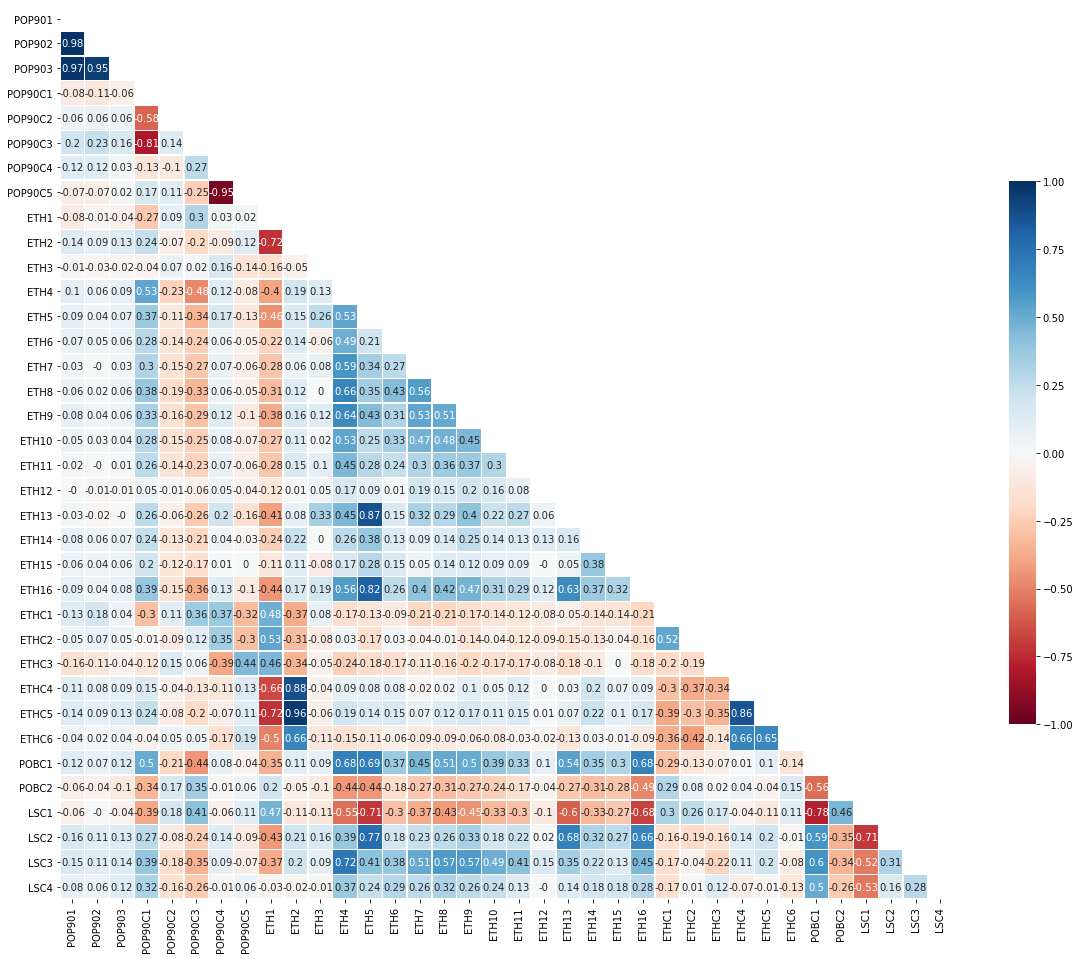

In [67]:
corr = neighpop.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [68]:
donors = donors.drop(columns=['POP902', 'POP903'])

In [69]:
donors = donors.drop(columns=['ETHC5', 'POP90C5'])

In [70]:
donors.shape

(95412, 396)

***Neighborhood Population Age***

In [71]:
neighpopage = donors[['AGE901','AGE902','AGE903','AGE904','AGE905','AGE906',
'AGE907','CHIL1','CHIL2','CHIL3','AGEC1','AGEC2','AGEC3','AGEC4','AGEC5',
'AGEC6','AGEC7','CHILC1','CHILC2','CHILC3','CHILC4','CHILC5','HHAGE1','HHAGE2',
'HHAGE3','AC1','AC2']]

In [72]:
neighpopage.head()

AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
1      34      41      43      32      42      45      32     33     46   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
4      33      45      50      36      46      50      27     34     43   

   CHIL3  ...  CHILC1  CHILC2  CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  \
0     27  ...      12      11      34      25      18      26      10      23   
1     21  ...      11      16      36      22      15      12       1       5   
2     25  ...      15      14      30      22      19      25      10      23   
3     20  ...      20      17      30      14      19      25      11      23   
4     23  ...      13      15      34      19      19      31       7      27   

   AC1  AC2  
0   10    7  
1    6    5  
2    6    5  
3    6    6  
4    7   11  

[5 rows x 27 columns]

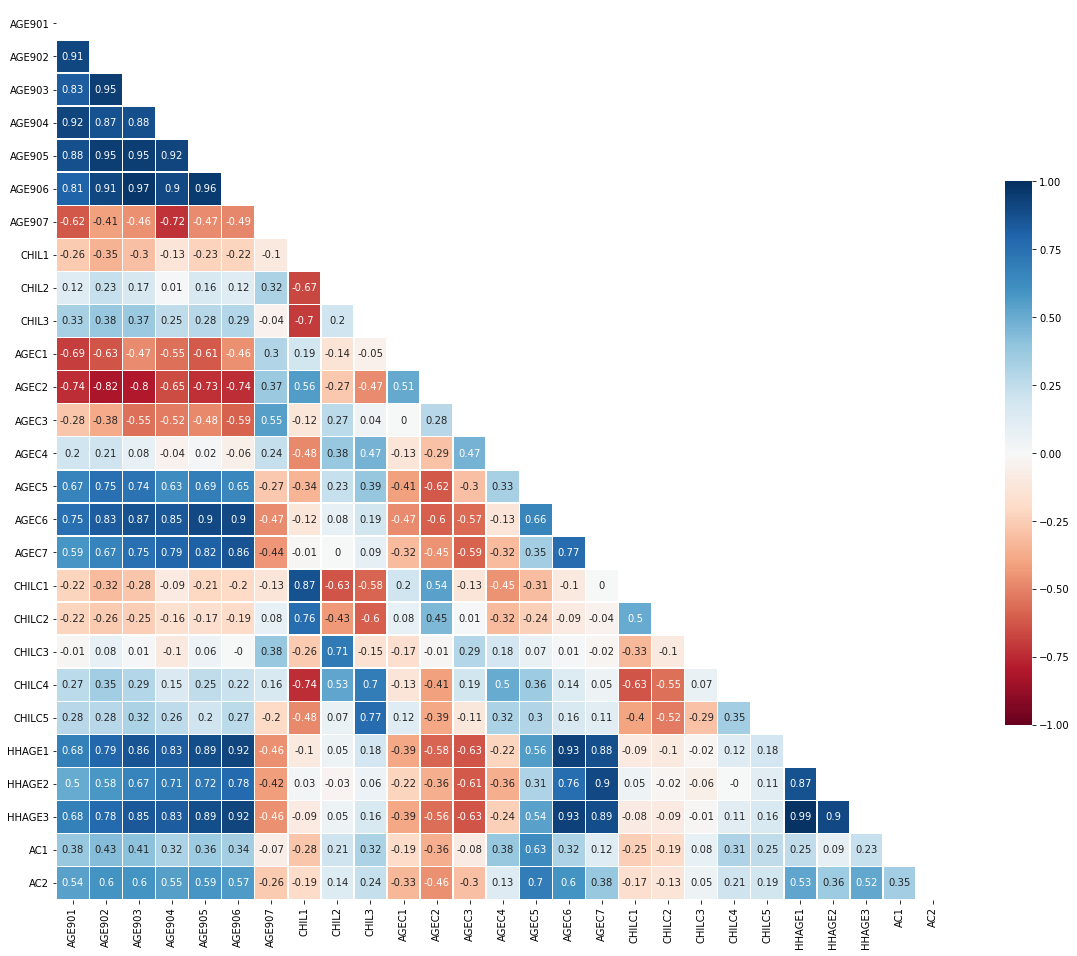

In [73]:
corr = neighpopage.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [74]:
donors = donors.drop(columns=['AGE901', 'AGE902', 'AGE903', 'AGE905', 'AGE906','HHAGE1','HHAGE3','AC1','AC2'])
# AC1 & AC2 are 2 variables that can be represented by AGEC5 & AGEC6

In [75]:
donors.shape

(95412, 387)

***Households Number of People***

In [76]:
housenumpeople = donors[['HHN1','HHN2','HHN3','HHN4','HHN5','HHN6','HHP1',
'HHP2','HHD1','HHD2','HHD3','HHD4','HHD5','HHD6','HHD7','HHD8','HHD9',
'HHD10','HHD11','HHD12']]

In [77]:
housenumpeople.head()

HHN1  HHN2  HHN3  HHN4  HHN5  HHN6  HHP1  HHP2  HHD1  HHD2  HHD3  HHD4  \
0    18    33    49    28    12     4   198   276    38    80    70    32   
1     4    21    75    55    23     9   317   360    59    94    88    55   
2    21    35    44    22     6     2   183   254    36    76    65    30   
3    23    27    50    30    15     8   199   283    36    73    61    30   
4    16    26    57    36    24    14   235   323    42    82    49    22   

   HHD5  HHD6  HHD7  HHD8  HHD9  HHD10  HHD11  HHD12  
0    84    16     6     2     5      9     15      3  
1    95     5     4     1     3      5      4      2  
2    86    14     7     2     5     11     17      3  
3    84    16     6     3     3     21     12      4  
4    92     8    20     3    17      9     23      1

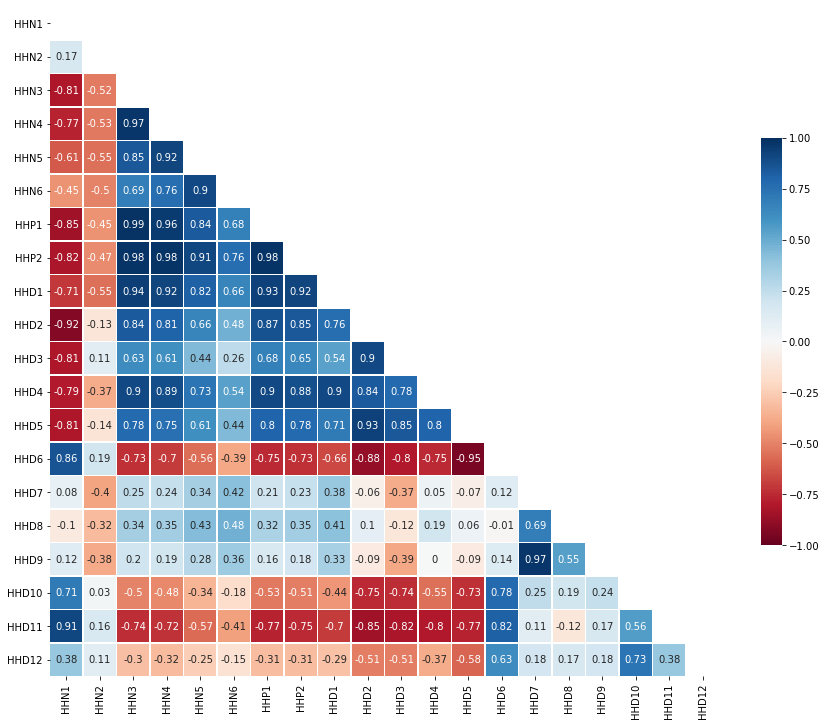

In [78]:
corr = housenumpeople.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [79]:
donors = donors.drop(columns=['HHN4','HHN5','HHN6', 'HHP1', 'HHD2','HHD6', 'HHD7'])

In [80]:
donors.shape

(95412, 380)

***Neighborhood Marital Status***

In [81]:
neighmaritalstatus = donors[['MARR1', 'MARR2', 'MARR3', 'MARR4']]

In [82]:
neighmaritalstatus.head()

MARR1  MARR2  MARR3  MARR4
0     61      7     12     19
1     69      4      3     24
2     63      9      9     19
3     63      9      6     23
4     42     17      9     33

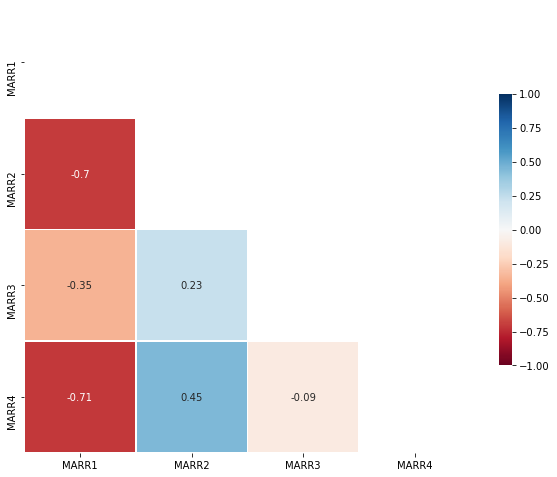

In [83]:
corr = neighmaritalstatus.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

***Neighborhood house units***

In [84]:
neighhouseunits = donors[['DW1', 'DW2', 'DW3', 'DW4', 'DW5', 'DW6', 'DW7',
                         'DW8', 'DW9', 'HU1', 'HU2', 'HU3', 'HU4', 'HU5','HUR1', 'HUR2']]

In [85]:
neighhouseunits.head()

DW1  DW2  DW3  DW4  DW5  DW6  DW7  DW8  DW9  HU1  HU2  HU3  HU4  HU5  HUR1  \
0   97   95    2    2    0    0    7    7    0   86   14   96    4    7     1   
1   99   99    0    0    0    0    0    0    0   96    4   97    3    9     0   
2   69   69    1    6    5    3    3    3    0   78   22   93    7   18     4   
3   85   83    3    4    1    0    2    0    2   48   52   93    7    6    15   
4   99   98    0    0    0    0    0    0    0   90   10   97    3    0     2   

   HUR2  
0    61  
1    83  
2    36  
3    42  
4    45

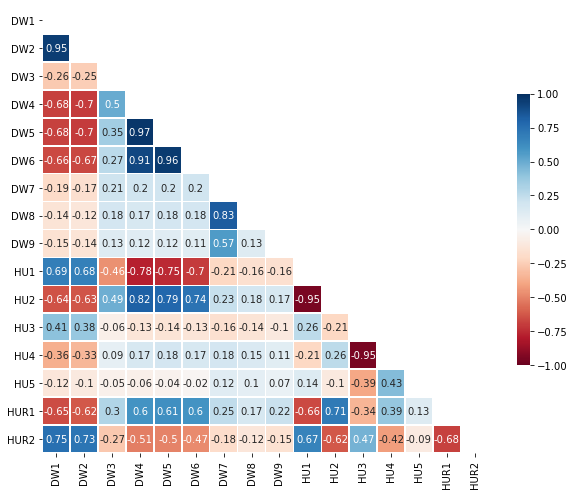

In [86]:
corr = neighhouseunits.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [87]:
donors = donors.drop(columns=['DW2', 'DW5', 'HU2', 'HU4'])

In [88]:
donors.shape

(95412, 376)

***Neighborhood House Value***

In [89]:
neighhousevalue = donors[['HV1','HV2','HV3','HV4','HVP1','HVP2','HVP3','HVP4',
'HVP5','HVP6','RP1' ,'RP2','RP3','RP4','HC1','HC11','HC12','HC13','HC14','HC15',
'HC16','HC17','HC18','HC19','HC20','HC21']]

In [90]:
neighhousevalue.head()

HV1   HV2  HV3  HV4  HVP1  HVP2  HVP3  HVP4  HVP5  HVP6  ...  HC12  HC13  \
0   479   635    3    2     2     7    13    27    47     0  ...     0    10   
1  5468  5218   12   10    97    98    98    98    99    94  ...     0     4   
2   497   546    2    1     0     1     6    18    50     0  ...     6    35   
3  1000  1263    2    1    10    25    50    69    92    10  ...    22    17   
4   576   594    4    3     0     1     2    16    67     0  ...    14    72   

   HC14  HC15  HC16  HC17  HC18  HC19  HC20  HC21  
0     0     0     0    33    65    40    99    99  
1     0     0     0    99     0    99    99    99  
2    44     0    15    22    77    17    97    92  
3     0     0    16    23    77    22    93    89  
4     3     0     0    99     1    21    99    96  

[5 rows x 26 columns]

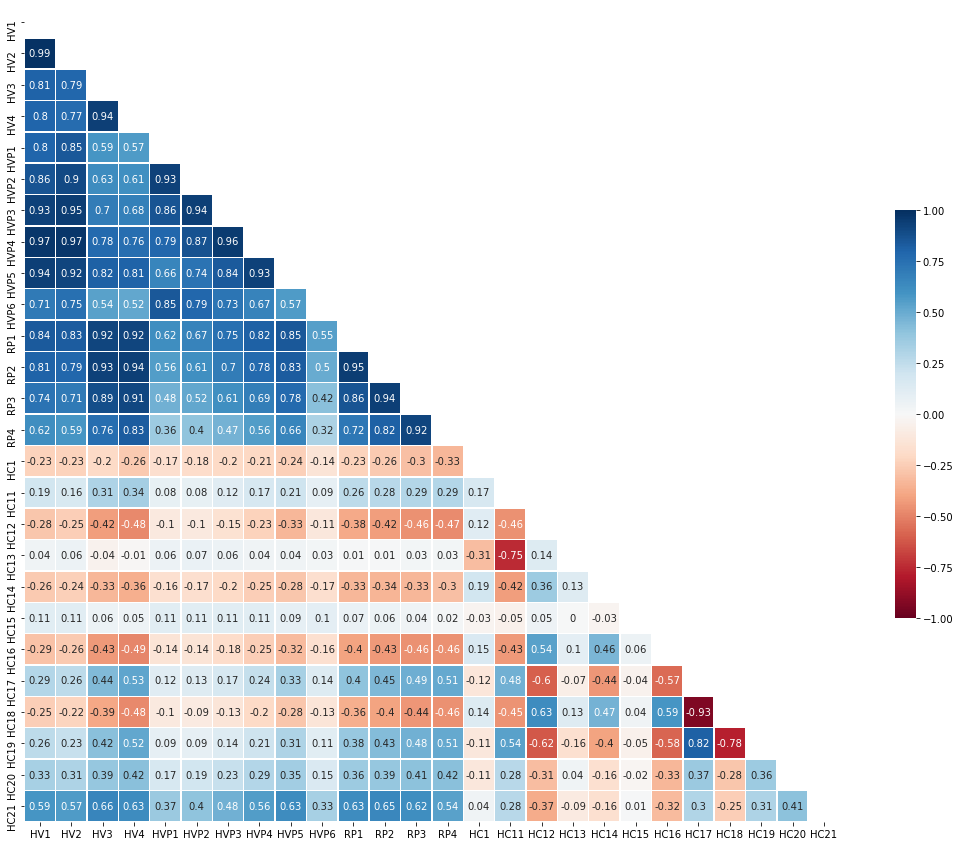

In [91]:
corr = neighhousevalue.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [92]:
donors = donors.drop(columns=['HV1', 'HV3', 'HVP1','HVP2','HVP3','HVP4','RP2', 'RP3','HC18'])

In [93]:
donors.shape

(95412, 367)

***Neighborhood House Units - Rooms***

In [94]:
neighouseunitsrooms = donors[['RHP1','RHP2', 'RHP3','RHP4','HUPA1','HUPA2',
'HUPA3','HUPA4','HUPA5','HUPA6','HUPA7']]

In [95]:
neighouseunitsrooms.head()

RHP1  RHP2  RHP3  RHP4  HUPA1  HUPA2  HUPA3  HUPA4  HUPA5  HUPA6  HUPA7
0    58    61    15     4      2      0      0     14      1      0      0
1    76    73    21     5      0      0      0      4      0      0      0
2    49    51    14     5      4      2     24     11      2      3      6
3    55    50    15     5      4      0      9     42      4      0      5
4    52    53    16     6      0      0      0      9      0      0      0

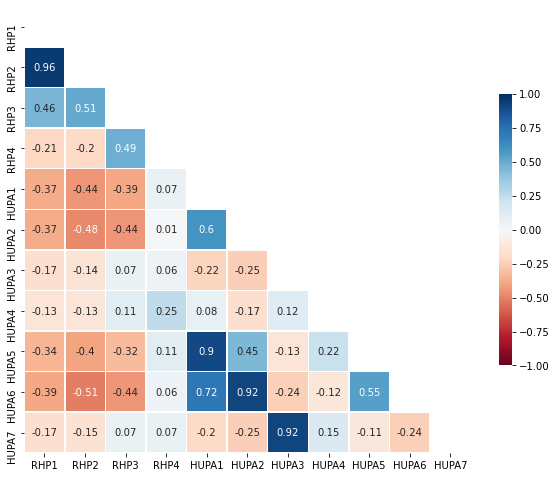

In [96]:
corr = neighouseunitsrooms.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [97]:
donors = donors.drop(columns=['RHP1', 'HUPA1','HUPA2','HUPA3'])

In [98]:
donors.shape

(95412, 363)

***Neighborhood Household Income***

In [99]:
neighhouseholdincome = donors[['IC1','IC2','IC3','IC4','IC5','IC6','IC7','IC8',
'IC9','IC10','IC11','IC12','IC13','IC14','IC15','IC16','IC17','IC18','IC19',
'IC20','IC21','IC22','IC23','HHAS1','HHAS2','HHAS3','HHAS4']]

In [100]:
neighhouseholdincome.head()

IC1   IC2   IC3   IC4    IC5  IC6  IC7  IC8  IC9  IC10  ...  IC18  IC19  \
0   307   318   349   378  12883   13   23   23   23    15  ...    26    17   
1  1088  1096  1026  1037  36175    2    6    2    5    15  ...     5    15   
2   251   292   292   340  11576   32   18   20   15    12  ...    18    16   
3   386   388   396   423  15130   27   12    4   26    22  ...    12    30   
4   240   250   293   321   9836   24   29   23   13     4  ...    16     4   

   IC20  IC21  IC22  IC23  HHAS1  HHAS2  HHAS3  HHAS4  
0     2     0     0     2     28      4     51      1  
1    14    14    10    32      6      2     66      3  
2     2     0     0     1     28      8     31     11  
3     6     0     0     5     22     14     26     20  
4     5     0     0     3     35      8     11     14  

[5 rows x 27 columns]

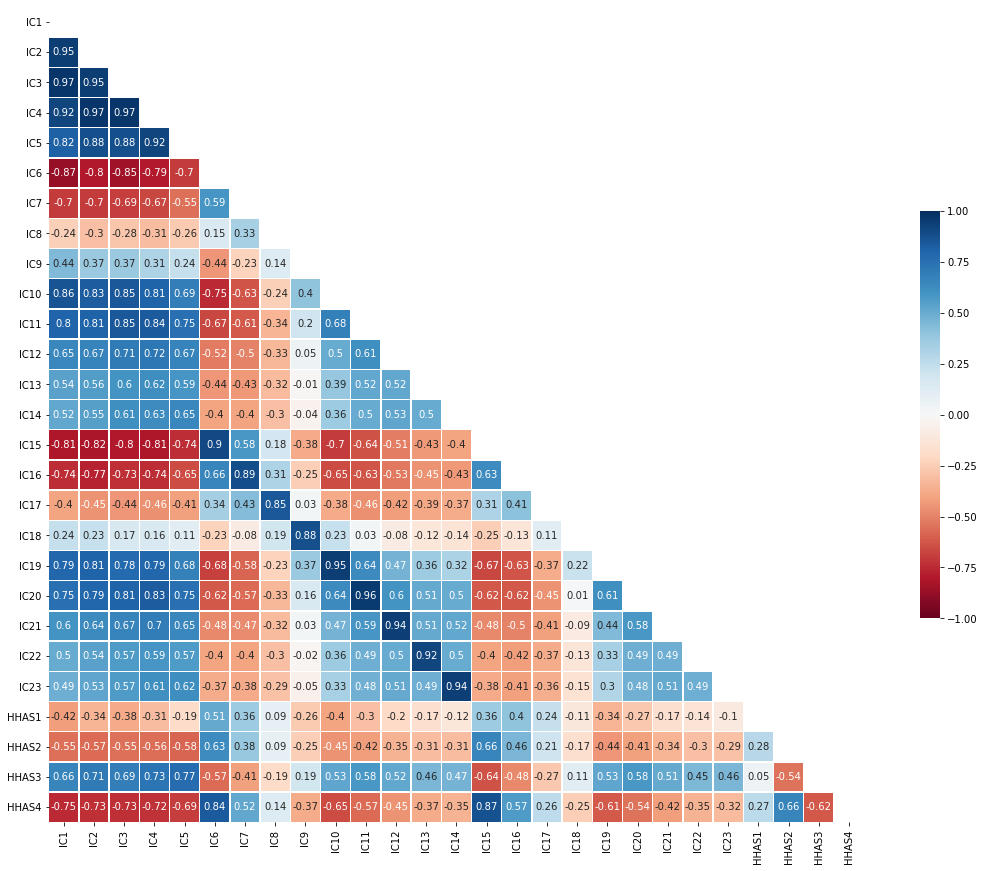

In [101]:
corr = neighhouseholdincome.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [102]:
donors = donors.drop(columns=['IC1','IC2','IC4','IC15','IC18','IC19','IC20','IC21','IC22','IC23'])

In [103]:
donors.shape

(95412, 353)

***Neighborhood use of transports / time***

In [104]:
neightransptime = donors[['TPE1','TPE2','TPE3','TPE4','TPE5','TPE6','TPE7',
'TPE8','TPE9','VOC1','VOC2','VOC3','PEC1','PEC2','TPE10','TPE11','TPE12','TPE13']]

In [105]:
neightransptime.head()

TPE1  TPE2  TPE3  TPE4  TPE5  TPE6  TPE7  TPE8  TPE9  VOC1  VOC2  VOC3  \
0    88     8     0     0     0     0     0     0     4    96    77    19   
1    80    14     0     0     0     0     0     0     6    99    92    53   
2    74    22     0     0     0     0     0     2     2    92    65    29   
3    58    36     0     0     0     0     0     6     0    94    43    27   
4    73    22     1     1     0     0     0     3     1    90    45    18   

   PEC1  PEC2  TPE10  TPE11  TPE12  TPE13  
0     1    13     14     16      2     45  
1     0     2     24     32     12     71  
2     1    21     19     24      6     61  
3     0    17     13     15      0     43  
4     2     1     24     27      3     76

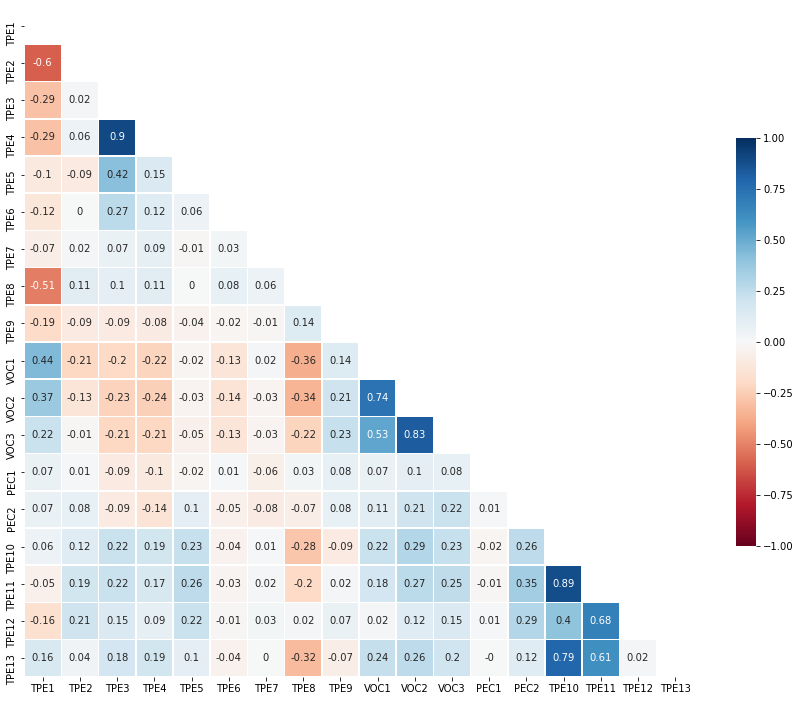

In [106]:
corr = neightransptime.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [107]:
donors = donors.drop(columns=['TPE4'])

In [108]:
donors.shape

(95412, 352)

***Neighborhood Employment***

In [109]:
neighemployment = donors[['LFC1', 'LFC2', 'LFC3', 'LFC4', 'LFC5', 'LFC6', 'LFC7',
                         'LFC8', 'LFC9', 'LFC10']]

In [110]:
neighemployment.head()

LFC1  LFC2  LFC3  LFC4  LFC5  LFC6  LFC7  LFC8  LFC9  LFC10
0    56    64    50    64    44    62    53    99     0      0
1    70    83    58    81    57    64    57    99    99      0
2    65    73    59    70    56    78    62    82    99      4
3    69    81    53    68    45    33    31     0    99     23
4    61    73    51    65    49    80    31    81    99     10

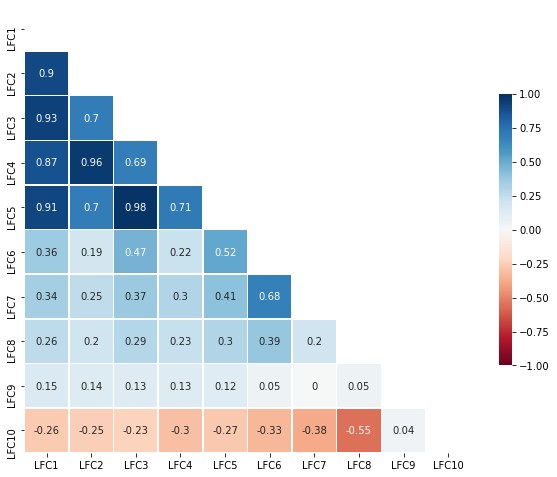

In [111]:
corr = neighemployment.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [112]:
donors = donors.drop(columns=['LFC1', 'LFC2', 'LFC3'])

In [113]:
donors.shape

(95412, 349)

***Neighborhood Jobs***

In [114]:
neighjobs = donors[['OCC1','OCC2','OCC3','OCC4','OCC5','OCC6','OCC7','OCC8',
'OCC9','OCC10','OCC11','OCC12','OCC13','EIC1','EIC2','EIC3','EIC4','EIC5',
'EIC6','EIC7','EIC8','EIC9','EIC10','EIC11','EIC12','EIC13','EIC14','EIC15',
'EIC16']]

In [115]:
neighjobs.head()

OCC1  OCC2  OCC3  OCC4  OCC5  OCC6  OCC7  OCC8  OCC9  OCC10  ...  EIC7  \
0     9     3     8    13     9     0     3     9     3     15  ...     7   
1    22    24     4    21    13     2     1     6     0      4  ...     8   
2    10     5     2     6    12     0     1     9     5     18  ...     2   
3    17     3     0     6     6     0     0    13    42     12  ...     0   
4    17     8     2     6    15     3     7    22     2      9  ...     2   

   EIC8  EIC9  EIC10  EIC11  EIC12  EIC13  EIC14  EIC15  EIC16  
0    13     6      5      0      4      9      4      1      3  
1    18    11      4      3      4     10      7     11      1  
2    12     3      3      2      0      7      8      3      3  
3    23     3      3      6      0      3      3      3      3  
4    12     2      7      6      4     15     29      4      3  

[5 rows x 29 columns]

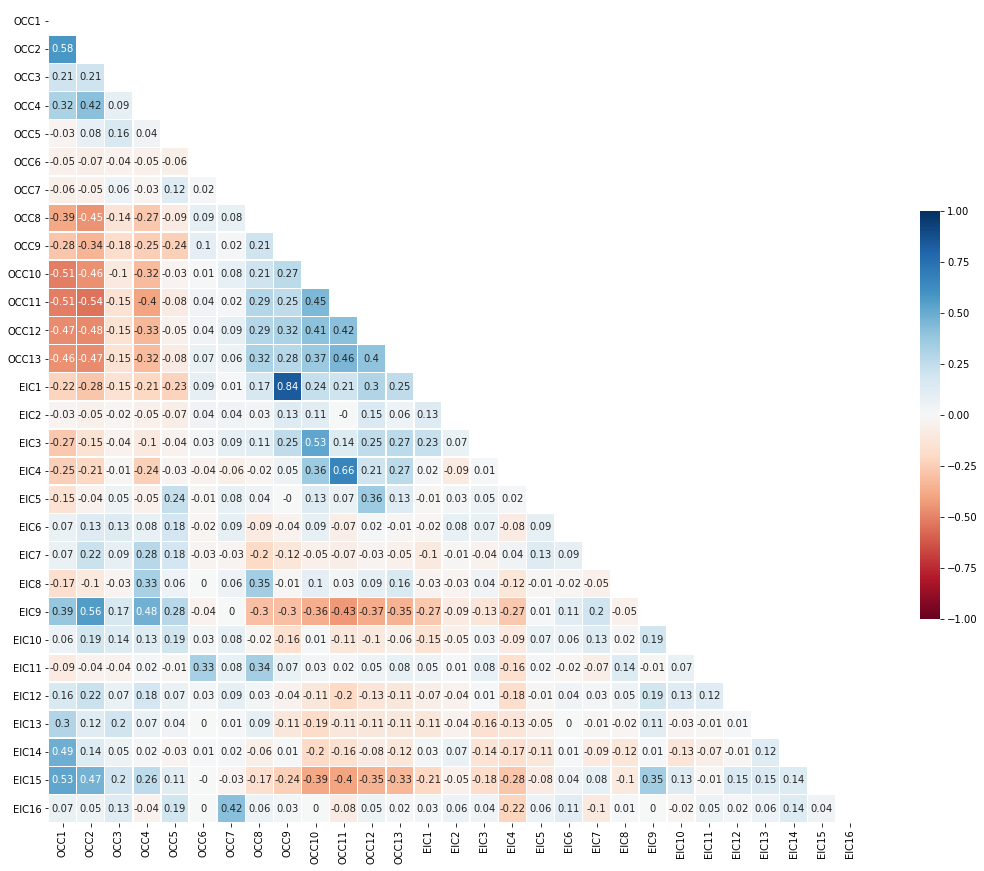

In [116]:
corr = neighjobs.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

***Neighborhood Employment Sector***

In [117]:
neighemploysector = donors[['OEDC1', 'OEDC2', 'OEDC3', 'OEDC4', 'OEDC5', 'OEDC6',
                           'OEDC7']]

In [118]:
neighemploysector.head()

OEDC1  OEDC2  OEDC3  OEDC4  OEDC5  OEDC6  OEDC7
0     10      2      1      7     78      2      0
1      6      2      1     16     69      5      2
2      6      7      1      8     74      3      1
3      3      0      3      6     87      0      0
4     26      3      2      7     49     12      1

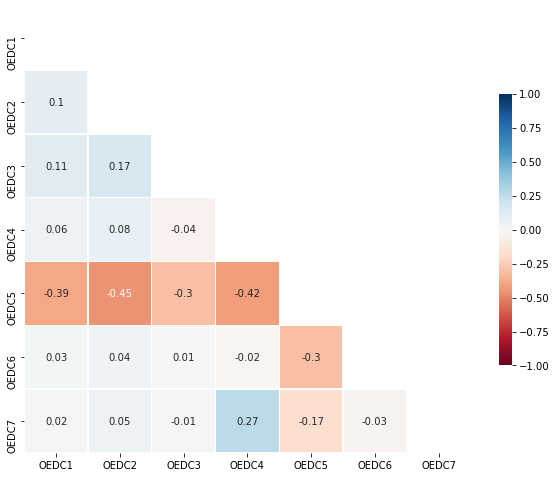

In [119]:
corr = neighemploysector.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

***Neighborhood Years Education***

In [120]:
neighyearseduc = donors[['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8',
                        'SEC1', 'SEC2', 'SEC3', 'SEC4', 'SEC5']]

In [121]:
neighyearseduc.head()

EC1  EC2  EC3  EC4  EC5  EC6  EC7  EC8  SEC1  SEC2  SEC3  SEC4  SEC5
0  120   16   10   39   21    8    4    3     5    20     3    19     4
1  160    5    5   12   21    7   30   20    14    24     4    24    10
2  120   22   20   28   16    6    5    3     1    23     1    16     6
3  120   28   12   14   27   10    3    5     0    19     1    17     0
4  120   16   20   30   13    3   12    5     2    26     1    20     7

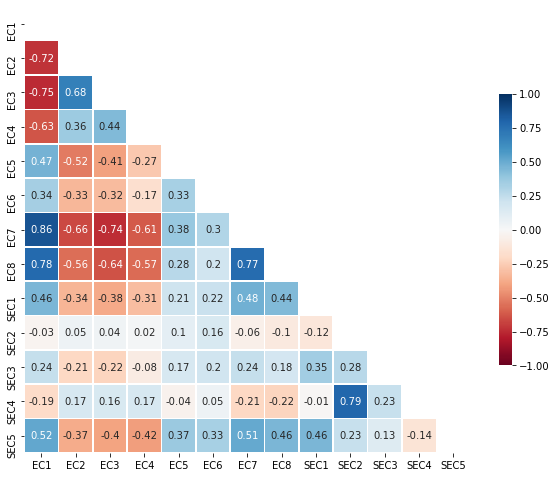

In [122]:
corr = neighyearseduc.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

***Neighborhood Military Service***

In [123]:
neighmilitary = donors[['AFC1', 'AFC2', 'AFC3', 'AFC4', 'AFC5', 'AFC6', 'VC1',
                       'VC2', 'VC3', 'VC4']]

In [124]:
neighmilitary.head()

AFC1  AFC2  AFC3  AFC4  AFC5  AFC6  VC1  VC2  VC3  VC4
0     0     0     0    18    39     0   34   23   18   16
1     0     0     0     8    15     0   55   10   11    0
2     0     0     0    10    21     0   28   23   32    8
3     0     0     0    13    23     0   14   40   31   16
4     1     1     1    15    28     4    9   16   53   20

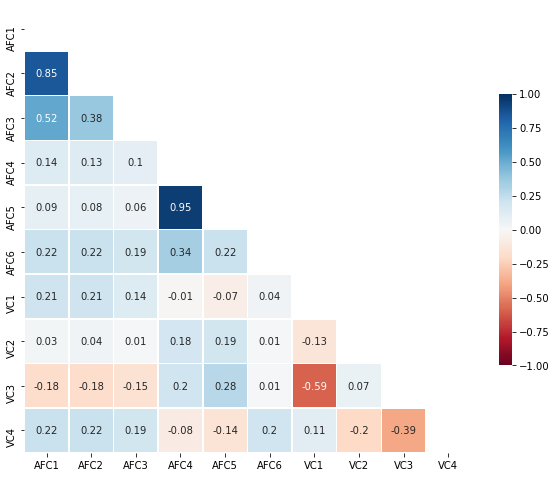

In [125]:
corr = neighmilitary.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [126]:
donors = donors.drop(columns=['AFC4'])

In [127]:
donors.shape

(95412, 348)

***Neighborhood Ancestry***

In [128]:
neighancestry = donors[['ANC1', 'ANC2', 'ANC3', 'ANC4', 'ANC5', 'ANC6', 'ANC7',
                       'ANC8', 'ANC9', 'ANC10', 'ANC11', 'ANC12', 'ANC13', 'ANC14',
                       'ANC15']]

In [129]:
neighancestry.head()

ANC1  ANC2  ANC3  ANC4  ANC5  ANC6  ANC7  ANC8  ANC9  ANC10  ANC11  ANC12  \
0     1     4     0    23     0     0     5     1     0      0      0      0   
1     0     2     0     3     1     1     2     3     1      1      0      3   
2     1    14     1     5     0     0     7     0     0      0      0      0   
3     0     1     0    13     0     0     4     0     0      0      3      0   
4     0     0     0     0     0     0     0     0     0      0      0      0   

   ANC13  ANC14  ANC15  
0      0      2      0  
1      0      0      0  
2      1      0      0  
3      0      0      0  
4      0      0      0

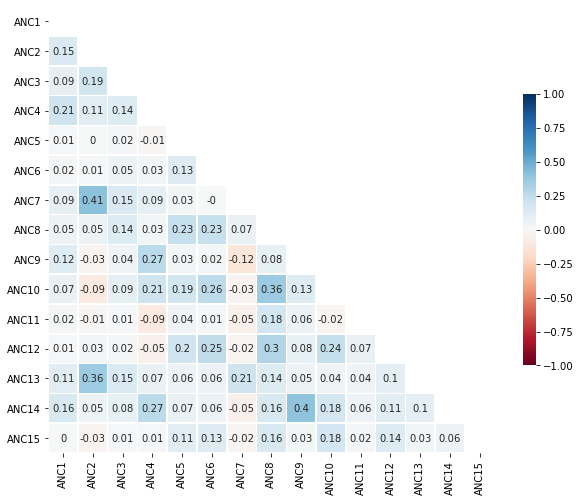

In [130]:
corr = neighancestry.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

***Promorion history File***

In [131]:
promhistfile = donors[['ADATE_2','ADATE_3','ADATE_4','ADATE_5','ADATE_6',
'ADATE_7','ADATE_8','ADATE_9','ADATE_10','ADATE_11','ADATE_12','ADATE_13',
'ADATE_14','ADATE_16','ADATE_17','ADATE_18','ADATE_19','ADATE_21',
'ADATE_22','ADATE_24']]

In [132]:
promhistfile.head()

ADATE_2     ADATE_3     ADATE_4     ADATE_5     ADATE_6     ADATE_7  \
0  2017-06-01  2016-06-01  2016-04-01  2016-04-01  2016-03-01  2016-02-01   
1  2017-06-01  2016-06-01  2016-04-01  2016-04-01  2016-03-01  2016-02-01   
2  2017-06-01  2016-06-01  2016-04-01  2016-04-01  2016-03-01  2016-02-01   
3  2017-06-01  2016-06-01  2016-04-01  2016-04-01  2016-03-01  2016-02-01   
4  2017-06-01  2016-06-01  2016-04-01  2016-04-01  2016-03-01  2015-12-01   

      ADATE_8     ADATE_9    ADATE_10    ADATE_11    ADATE_12    ADATE_13  \
0  2016-01-01  2015-11-01  2015-10-01  2015-10-01  2015-08-01  2015-07-01   
1  2016-01-01  2015-11-01  2015-10-01  2015-10-01  2015-09-01  2015-07-01   
2  2016-01-01  2015-11-01  2015-10-01  2015-10-01  2015-08-01  2015-07-01   
3  2016-01-01  2015-11-01  2015-10-01  2015-10-01  2015-08-01  2015-07-01   
4  2016-01-01  2015-11-01  2015-10-01  2015-09-01  2015-08-01  2015-02-01   

     ADATE_14    ADATE_16    ADATE_17    ADATE_18    ADATE_19    ADATE_21  \
0  2015-06-01  2015-03-01  2015-02-01  2015-01-01  2014-11-01  2014-10-01   
1  2015-06-01  2015-03-01  2015-02-01  2015-01-01  2014-11-01  2014-10-01   
2  2015-06-01  2015-03-01  2015-02-01  2015-01-01  2014-11-01  2014-10-01   
3  2015-06-01  2015-03-01  2015-02-01  2015-01-01  2014-11-01  2014-10-01   
4  2015-06-01  2015-03-01  2015-02-01  2014-12-01  2014-11-01  2014-10-01   

     ADATE_22    ADATE_24  
0  2014-09-01  2014-06-01  
1  2014-09-01  2014-06-01  
2  2014-09-01  2014-06-01  
3  2014-09-01  2014-06-01  
4  2015-06-01  2014-06-01

***Promotion RFA***

In [133]:
promrfa = donors[['RFA_2','RFA_3' ,'RFA_4','RFA_5','RFA_6','RFA_7','RFA_8',
'RFA_9','RFA_10','RFA_11','RFA_12','RFA_13','RFA_14','RFA_16','RFA_17',
'RFA_18','RFA_19','RFA_21','RFA_22','RFA_24','RFA_2R','RFA_2F',
'RFA_2A' ,'MDMAUD_R','MDMAUD_F','MDMAUD_A']]

In [134]:
promrfa.head()

RFA_2 RFA_3 RFA_4 RFA_5 RFA_6 RFA_7 RFA_8 RFA_9 RFA_10 RFA_11  ... RFA_19  \
0   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E    S4E    S4E  ...    S4E   
1   L2G   A2G   A2G   A2G   A2G   A1E   A1E   A1E    A1E    A1E  ...    N1E   
2   L4E   S4E   S4E   S4E   S4E   S4F   S4F   S4F    A1F    S4F  ...    S4D   
3   L4E   S4E   S4E   S4E   S4E   S4E   S4E   S4E    A1F    S4E  ...    A1D   
4   L2F   A2F   A2F   A2F   A1D   I2D   A1E   A1E    L1D    A1E  ...    A3D   

  RFA_21 RFA_22 RFA_24 RFA_2R RFA_2F RFA_2A MDMAUD_R MDMAUD_F MDMAUD_A  
0    S4E    S4E    S4E      L      4      E        X        X        X  
1    N1E    N1E    F1E      L      2      G        X        X        X  
2    A1E    S4D    S3D      L      4      E        X        X        X  
3    A1D    A1D    A1E      L      4      E        X        X        X  
4    A3D    I4E    A3D      L      2      F        X        X        X  

[5 rows x 26 columns]

In [135]:
donors = donors.drop(columns=['RFA_2R','RFA_2F','RFA_2A'])

In [136]:
len(promrfa.loc[promrfa['RFA_10'] == ' '])

0

In [137]:
promrfa['MDMAUD_R'].value_counts()

X    95118
C      109
L       70
D       65
I       50
Name: MDMAUD_R, dtype: int64

In [138]:
promrfa['MDMAUD_F'].value_counts()

X    95118
1      187
2       87
5       20
Name: MDMAUD_F, dtype: int64

In [139]:
promrfa['MDMAUD_A'].value_counts()

X    95118
C      249
L       23
M       17
T        5
Name: MDMAUD_A, dtype: int64

***Promotion HIstory File Summary***

In [140]:
promhistsummary = donors[['CARDPROM','MAXADATE','NUMPROM','CARDPM12','NUMPRM12',
'NGIFTALL','RAMNTALL','MINRAMNT','MINRDATE','MAXRAMNT','MAXRDATE','LASTGIFT',
'LASTDATE','FISTDATE','NEXTDATE','TIMELAG','AVGGIFT']]

In [141]:
promhistsummary.head()

CARDPROM    MAXADATE  NUMPROM  CARDPM12  NUMPRM12  NGIFTALL  RAMNTALL  \
0        27  2017-02-01       74         6        14        31     240.0   
1        12  2017-02-01       32         6        13         3      47.0   
2        26  2017-02-01       63         6        14        27     202.0   
3        27  2017-02-01       66         6        14        16     109.0   
4        43  2017-02-01      113        10        25        37     254.0   

   MINRAMNT    MINRDATE  MAXRAMNT    MAXRDATE  LASTGIFT    LASTDATE  \
0       5.0  2012-08-01      12.0  2014-02-01      10.0  2015-12-01   
1      10.0  2013-10-01      25.0  2015-12-01      25.0  2015-12-01   
2       2.0  2011-11-01      16.0  2012-07-01       5.0  2015-12-01   
3       2.0  2007-11-01      11.0  2014-11-01      10.0  2015-12-01   
4       3.0  2013-10-01      15.0  2016-01-01      15.0  2016-01-01   

     FISTDATE    NEXTDATE  TIMELAG    AVGGIFT  
0  2009-11-01  2010-03-01      4.0   7.741935  
1  2013-10-01  2015-04-01     18.0  15.666667  
2  2010-01-01  2011-01-01     12.0   7.481481  
3  2007-02-01  2007-11-01      9.0   6.812500  
4  1999-03-01  2000-05-01     14.0   6.864865

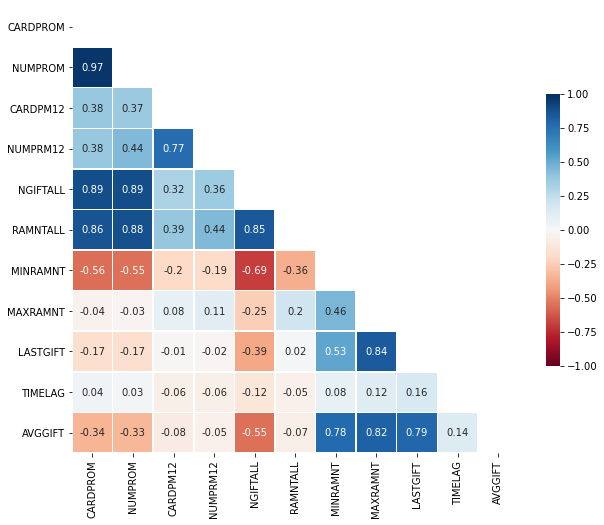

In [142]:
corr = promhistsummary.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(round(corr,2), mask = mask, cmap = 'RdBu', vmax = 1.0, vmin= -1.0, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [143]:
donors.shape

(95412, 345)

<a class="anchor" id="redefinitionmetricnonmetric">

## 4.5. REDEFINITION OF METRIC & NON METRIC FEATURES

</a>

In [144]:
metric_features=donors.select_dtypes(exclude=[object]).columns

In [145]:
len(metric_features)

257

In [146]:
non_metric_features=donors.select_dtypes(include=[object]).columns
len(non_metric_features)

88

<a class="anchor" id="graphics">

## 4.6. Graphics

</a>

In [147]:
import math

In [148]:
len(metric_features)

257

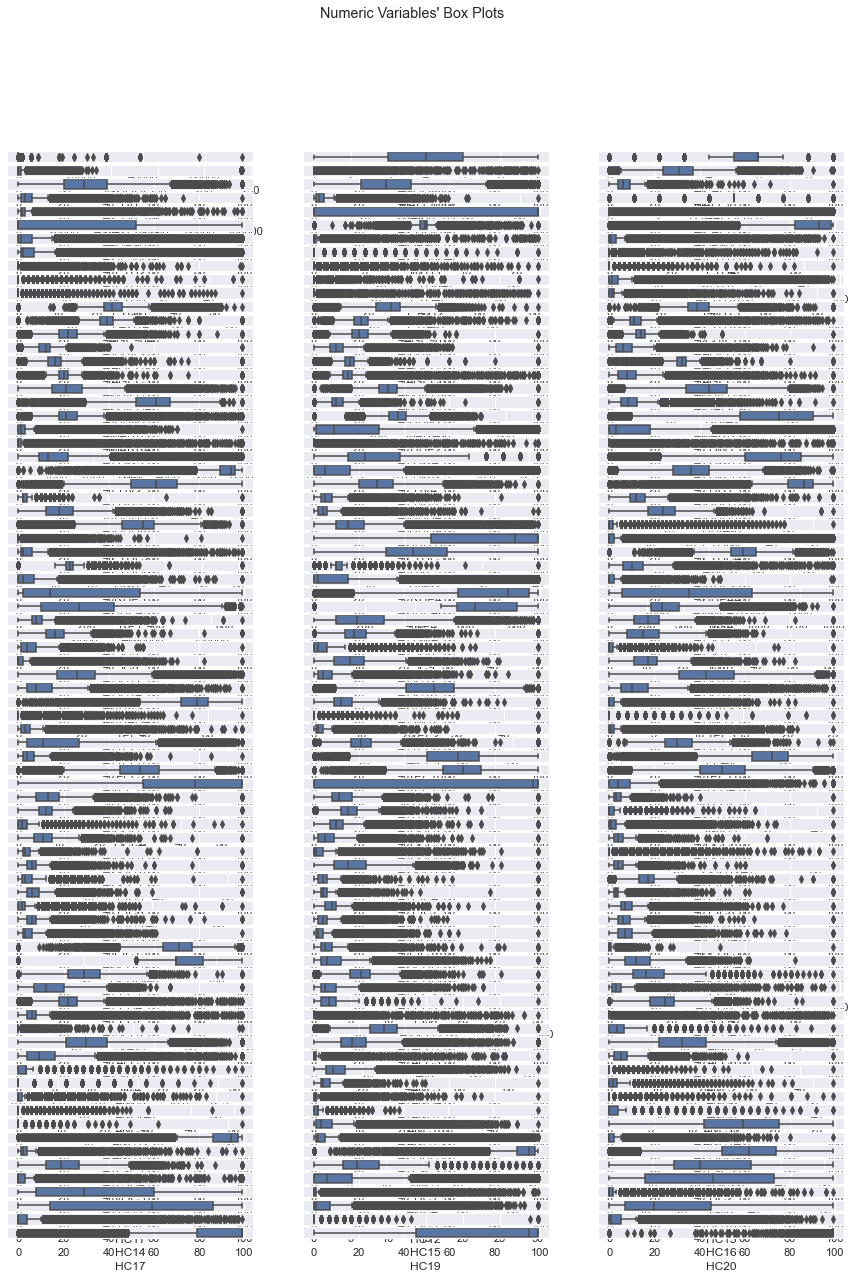

In [149]:
sns.set()

fig, axes = plt.subplots(80, math.ceil(len(metric_features) / 100), figsize=(15, 20))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(donors[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<a class="anchor" id="transformingdatatype">

## 4.7. Transforming data type

</a>

In [150]:
from datetime import datetime
import calendar

In [151]:
donors["ODATEDW"] = donors["ODATEDW"].astype("datetime64") # change data type

In [152]:
donors["ODATEDW"]

0       2009-01-01
1       2014-01-01
2       2010-01-01
3       2007-01-01
4       2006-01-01
           ...    
95407   2016-01-01
95408   2016-01-01
95409   2015-01-01
95410   2006-01-01
95411   2008-01-01
Name: ODATEDW, Length: 95412, dtype: datetime64[ns]

In [153]:
donors["DOB"]= donors["DOB"].astype("datetime64")

In [154]:
donors["DOB"]

0       1957-12-01
1       1972-02-01
2       1968-01-01
3       1948-01-01
4       1940-01-01
           ...    
95407   1968-01-01
95408   1970-01-01
95409   1958-01-01
95410   1960-05-01
95411   1938-01-01
Name: DOB, Length: 95412, dtype: datetime64[ns]

In [155]:
donors["LASTDATE"]= donors["LASTDATE"].astype("datetime64") # recency

<hr>
<a class="anchor" id="newvariables">
    
## 4.8. New variables
    
</a>

In [156]:
donors['DOB']

0       1957-12-01
1       1972-02-01
2       1968-01-01
3       1948-01-01
4       1940-01-01
           ...    
95407   1968-01-01
95408   1970-01-01
95409   1958-01-01
95410   1960-05-01
95411   1938-01-01
Name: DOB, Length: 95412, dtype: datetime64[ns]

In [157]:
datetime.now().year

2021

In [158]:
# Age -> today year - DOB.year
# donors['Age'] = (datetime.now().year - pd.DatetimeIndex(donors['DOB']).year)

In [159]:
# donors.groupby("Age").count()["ODATEDW"].head(20)

In [160]:
# AGE = ADATE_2 - DOB (re-computed)
donors['Age'] = (pd.DatetimeIndex(donors['ADATE_2']).year - pd.DatetimeIndex(donors['DOB']).year)

In [161]:
donors['Age']

0        60
1        45
2        49
3        69
4        77
         ..
95407    49
95408    47
95409    59
95410    57
95411    79
Name: Age, Length: 95412, dtype: int64

In [162]:
donors["Age"]=donors['Age'].astype("int64")

In [163]:
donors["Age"].unique()

array([60, 45, 49, 69, 77, 37, 65, 74, 71, 70, 43, 61, 81, 54, 41, 83, 68,
       87, 84, 29, 44, 51, 66,  7, 67, 39, 47, 33, 79, 35, 40, 53, 72, 46,
       32, 62, 63, 59, 76, 73, 86, 50, 17, 58, 85, 25, 75, 57, 38, 82, 80,
       55, 78, 36, 56, 48, 64, 52, 34, 16, 42, 30, 28, 27, 31, 21,  6, 23,
       26, 19, 18, 24, 22, 13, 15, 20, 10,  2,  1,  9,  0, 11,  5,  4,  8,
       12, 14], dtype=int64)

In [164]:
donors["ADATE_2"]= donors["ADATE_2"].astype("datetime64")

In [165]:
# Recency -> days since last recent gift
donors['Recency'] = (donors['ADATE_2'] - donors['LASTDATE']).dt.days.astype('int64')

In [166]:
donors['Recency']=donors['Recency'].astype("int64")

In [167]:
donors[donors['Recency']<0]

Empty DataFrame
Columns: [ODATEDW, OSOURCE, TCODE, STATE, ZIP, MAILCODE, DOB, NOEXCH, MDMAUD, DOMAIN, HOMEOWNR, CHILD03, CHILD07, CHILD12, CHILD18, INCOME, GENDER, WEALTH1, HIT, DATASRCE, MALEMILI, MALEVET, VIETVETS, WWIIVETS, LOCALGOV, STATEGOV, FEDGOV, SOLP3, SOLIH, MAJOR, WEALTH2, COLLECT1, VETERANS, BIBLE, CATLG, HOMEE, PETS, CDPLAY, STEREO, PCOWNERS, PHOTO, CRAFTS, FISHER, GARDENIN, BOATS, WALKER, KIDSTUFF, CARDS, PLATES, PEPSTRFL, POP901, POP90C1, POP90C2, POP90C3, POP90C4, ETH1, ETH2, ETH3, ETH4, ETH5, ETH6, ETH7, ETH8, ETH9, ETH10, ETH11, ETH12, ETH13, ETH14, ETH15, ETH16, AGE904, AGE907, CHIL1, CHIL2, CHIL3, AGEC1, AGEC2, AGEC3, AGEC4, AGEC5, AGEC6, AGEC7, CHILC1, CHILC2, CHILC3, CHILC4, CHILC5, HHAGE2, HHN1, HHN2, HHN3, MARR1, MARR2, MARR3, MARR4, HHP2, DW1, DW3, DW4, ...]
Index: []

[0 rows x 347 columns]

In [168]:
# Convert 'MAXADATE' to datetime
donors['MAXADATE'] = donors['MAXADATE'].astype("datetime64")

In [169]:
donors['MAXADATE']

0       2017-02-01
1       2017-02-01
2       2017-02-01
3       2017-02-01
4       2017-02-01
           ...    
95407   2017-02-01
95408   2017-02-01
95409   2017-02-01
95410   2017-02-01
95411   2017-02-01
Name: MAXADATE, Length: 95412, dtype: datetime64[ns]

In [170]:
# Days_lastPromotion -> days since most recent promotion received
donors['Days_lastPromotion'] = (donors['ADATE_2'] - donors['MAXADATE']).dt.days.astype('int64')

In [171]:
donors['Days_lastPromotion']=donors['Days_lastPromotion'].astype("int64")

In [172]:
donors[donors['Days_lastPromotion']<0]

Empty DataFrame
Columns: [ODATEDW, OSOURCE, TCODE, STATE, ZIP, MAILCODE, DOB, NOEXCH, MDMAUD, DOMAIN, HOMEOWNR, CHILD03, CHILD07, CHILD12, CHILD18, INCOME, GENDER, WEALTH1, HIT, DATASRCE, MALEMILI, MALEVET, VIETVETS, WWIIVETS, LOCALGOV, STATEGOV, FEDGOV, SOLP3, SOLIH, MAJOR, WEALTH2, COLLECT1, VETERANS, BIBLE, CATLG, HOMEE, PETS, CDPLAY, STEREO, PCOWNERS, PHOTO, CRAFTS, FISHER, GARDENIN, BOATS, WALKER, KIDSTUFF, CARDS, PLATES, PEPSTRFL, POP901, POP90C1, POP90C2, POP90C3, POP90C4, ETH1, ETH2, ETH3, ETH4, ETH5, ETH6, ETH7, ETH8, ETH9, ETH10, ETH11, ETH12, ETH13, ETH14, ETH15, ETH16, AGE904, AGE907, CHIL1, CHIL2, CHIL3, AGEC1, AGEC2, AGEC3, AGEC4, AGEC5, AGEC6, AGEC7, CHILC1, CHILC2, CHILC3, CHILC4, CHILC5, HHAGE2, HHN1, HHN2, HHN3, MARR1, MARR2, MARR3, MARR4, HHP2, DW1, DW3, DW4, ...]
Index: []

[0 rows x 348 columns]

In [173]:
# Days_FirstGift -> days since first gift (ODATEDW - date of first gift)
donors['Days_FirstGift'] = (donors['ADATE_2'] - donors['ODATEDW']).dt.days.astype('int64')

In [174]:
donors['Days_FirstGift']=donors['Days_FirstGift'].astype("int64")

In [175]:
donors[donors['Days_FirstGift']<0]

Empty DataFrame
Columns: [ODATEDW, OSOURCE, TCODE, STATE, ZIP, MAILCODE, DOB, NOEXCH, MDMAUD, DOMAIN, HOMEOWNR, CHILD03, CHILD07, CHILD12, CHILD18, INCOME, GENDER, WEALTH1, HIT, DATASRCE, MALEMILI, MALEVET, VIETVETS, WWIIVETS, LOCALGOV, STATEGOV, FEDGOV, SOLP3, SOLIH, MAJOR, WEALTH2, COLLECT1, VETERANS, BIBLE, CATLG, HOMEE, PETS, CDPLAY, STEREO, PCOWNERS, PHOTO, CRAFTS, FISHER, GARDENIN, BOATS, WALKER, KIDSTUFF, CARDS, PLATES, PEPSTRFL, POP901, POP90C1, POP90C2, POP90C3, POP90C4, ETH1, ETH2, ETH3, ETH4, ETH5, ETH6, ETH7, ETH8, ETH9, ETH10, ETH11, ETH12, ETH13, ETH14, ETH15, ETH16, AGE904, AGE907, CHIL1, CHIL2, CHIL3, AGEC1, AGEC2, AGEC3, AGEC4, AGEC5, AGEC6, AGEC7, CHILC1, CHILC2, CHILC3, CHILC4, CHILC5, HHAGE2, HHN1, HHN2, HHN3, MARR1, MARR2, MARR3, MARR4, HHP2, DW1, DW3, DW4, ...]
Index: []

[0 rows x 349 columns]

In [176]:
donors.shape

(95412, 349)

In [177]:
donors=donors.drop(columns={"ODATEDW",'MAXADATE',"LASTDATE",'DOB',})

In [178]:
donors['ADATE_2']=donors['ADATE_2'].astype("str")

In [179]:
donors.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [180]:
donors.shape

(95412, 345)

<hr>
<a class="anchor" id="incoherents">
    
## 4.9. Incoherents
    
</a>

In [181]:
# we want people with more than 17 years in the dataset
donors=donors[donors["Age"]>17]

In [182]:
donors.shape

(94405, 345)

In [183]:
# recency cannot be negative
donors=donors[donors["Recency"]>0]

In [184]:
donors.shape

(94405, 345)

<hr>
<a class="anchor" id="correlation">
    
# 4.10. Correlation
    
</a>

In [185]:
#corr=donors.corr()

In [186]:
#sns.heatmap(corr,cmap="YlGnBu")

In [187]:
# corr = donors.corr(method="spearman")

# kot = corr[np.abs(corr)>=.9]
# plt.figure(figsize=(12,8))
# sns.heatmap(kot, cmap="Greens")

In [188]:
c = donors.corr(method="spearman").abs()
s = c.unstack()
so = round(s.sort_values(kind="quicksort"),4)
high_pairs = so[so > 0.90]
high_pairs = high_pairs[high_pairs < 1.0]

In [189]:
pd.set_option('display.max_rows', 562)
high_pairs

AGE904          ETHC3             0.9004
ETHC3           AGE904            0.9004
MARR3           AGEC7             0.9066
AGEC7           MARR3             0.9066
HHD3            MARR1             0.9083
MARR1           HHD3              0.9083
DW6             DW4               0.9127
DW4             DW6               0.9127
Days_FirstGift  NUMPROM           0.9132
NUMPROM         Days_FirstGift    0.9132
HHD11           HHN1              0.9142
HHN1            HHD11             0.9142
HHD1            RHP3              0.9153
RHP3            HHD1              0.9153
HHD1            HHP2              0.9159
HHP2            HHD1              0.9159
HV4             RP1               0.9175
RP1             HV4               0.9175
HVP5            HV2               0.9193
HV2             HVP5              0.9193
HHD1            AGE907            0.9210
AGE907          HHD1              0.9210
NGIFTALL        CARDGIFT          0.9230
CARDGIFT        NGIFTALL          0.9230
Days_FirstGift  

In [190]:
so_low = round(s.sort_values(kind="quicksort"),4)
low_pairs = so_low[so_low < 0.05]

In [191]:
pd.set_option('display.max_rows', 562)
low_pairs

EC5       ANC7        0.0000
ANC7      EC5         0.0000
HHAS1     ANC10       0.0000
ANC10     HHAS1       0.0000
POP90C2   HC15        0.0000
                       ...  
ETH3      HC13        0.0499
HC3       AFC3        0.0499
AFC3      HC3         0.0499
EC2       LOCALGOV    0.0499
LOCALGOV  EC2         0.0499
Length: 24220, dtype: float64

In [192]:
donors.shape

(94405, 345)

In [193]:
correlated_features = set()
correlation_matrix = donors.corr(method = 'spearman')
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [194]:
donors.drop(labels=correlated_features, axis=1, inplace=True)

In [195]:
donors.shape

(94405, 330)

In [196]:
metric_features=donors.select_dtypes(exclude=[object]).columns

In [197]:
len(metric_features)

246

In [198]:
non_metric_features=donors.select_dtypes(include=[object]).columns
len(non_metric_features)

84

In [199]:
donors.head()

OSOURCE  TCODE STATE    ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR CHILD03  \
0     GRI      0    IL  61081        O      0   XXXX     T2        U       N   
1     BOA      1    CA  91326        O      0   XXXX     S1        H       N   
2     AMH      1    NC  27017        O      0   XXXX     R2        U       N   
3     BRY      0    CA  95953        O      0   XXXX     R2        U       N   
4     MBC      0    FL  33176        O      0   XXXX     S2        H       N   

   ...    AVGGIFT CONTROLN HPHONE_D  MDMAUD_R MDMAUD_F  MDMAUD_A  GEOCODE2  \
0  ...   7.741935    95515        0         X        X         X         C   
1  ...  15.666667   148535        0         X        X         X         A   
2  ...   7.481481    15078        1         X        X         X         C   
3  ...   6.812500   172556        1         X        X         X         C   
4  ...   6.864865     7112        1         X        X         X         A   

  Age  Recency  Days_lastPromotion  
0  60      548                 120  
1  45      548                 120  
2  49      548                 120  
3  69      548                 120  
4  77      517                 120  

[5 rows x 330 columns]

In [200]:
donors.loc[:, 'HOMEOWNR':]

HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  INCOME GENDER  WEALTH1  HIT  \
0            U       N       N       N       N     4.0      F      6.0    0   
1            H       N       N       N       M     6.0      M      9.0   16   
2            U       N       N       N       N     3.0      M      1.0    2   
3            U       N       N       N       N     1.0      F      4.0    2   
4            H       N       N       N       N     3.0      F      2.0   60   
...        ...     ...     ...     ...     ...     ...    ...      ...  ...   
95407        U       N       N       N       N     4.0      M      6.0    0   
95408        H       N       N       N       M     7.0      M      9.0    1   
95409        U       N       N       N       N     4.0      M      6.0    0   
95410        H       N       N       N       N     7.0      F      6.0    0   
95411        U       N       N       N       N     5.0      F      8.0    3   

      DATASRCE  ...    AVGGIFT  CONTROLN  HPHONE_D  MDMAUD_R  MDMAUD_F  \
0            3  ...   7.741935     95515         0         X         X   
1            3  ...  15.666667    148535         0         X         X   
2            3  ...   7.481481     15078         1         X         X   
3            3  ...   6.812500    172556         1         X         X   
4            3  ...   6.864865      7112         1         X         X   
...        ...  ...        ...       ...       ...       ...       ...   
95407        3  ...  25.000000    184568         0         X         X   
95408        3  ...  20.000000    122706         1         X         X   
95409        3  ...   8.285714    189641         1         X         X   
95410        2  ...  12.146341      4693         1         X         X   
95411        3  ...  96.794872    185114         1         C         1   

       MDMAUD_A  GEOCODE2 Age Recency Days_lastPromotion  
0             X         C  60     548                120  
1             X         A  45     548                120  
2             X         C  49     548                120  
3             X         C  69     548                120  
4             X         A  77     517                120  
...         ...       ...  ..     ...                ...  
95407         X         C  49     486                120  
95408         X         A  47     457                120  
95409         X         B  59     243                120  
95410         X         A  57     151                120  
95411         C         C  79     182                120  

[94405 rows x 322 columns]

In [201]:
donors.loc[:, 'HIT':]

HIT DATASRCE  MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  \
0        0        3         0       39        34        18        10   
1       16        3         0       15        55        11         6   
2        2        3         0       20        29        33         6   
3        2        3         0       23        14        31         3   
4       60        3         1       28         9        53        26   
...    ...      ...       ...      ...       ...       ...       ...   
95407    0        3        14       36        47        11         7   
95408    1        3         0       31        43        19         4   
95409    0        3         0       18        46        20         7   
95410    0        2         0       28        35        20         9   
95411    3        3         1       33        22        27         8   

       STATEGOV  FEDGOV    SOLP3  ...    AVGGIFT CONTROLN  HPHONE_D MDMAUD_R  \
0             2       1  Default  ...   7.741935    95515         0        X   
1             2       1  Default  ...  15.666667   148535         0        X   
2             8       1  Default  ...   7.481481    15078         1        X   
3             0       3  Default  ...   6.812500   172556         1        X   
4             3       2  Default  ...   6.864865     7112         1        X   
...         ...     ...      ...  ...        ...      ...       ...      ...   
95407         8      13  Default  ...  25.000000   184568         0        X   
95408         1       0  Default  ...  20.000000   122706         1        X   
95409        23       0  Default  ...   8.285714   189641         1        X   
95410         1       1  Default  ...  12.146341     4693         1        X   
95411        10       3  Default  ...  96.794872   185114         1        C   

      MDMAUD_F MDMAUD_A GEOCODE2 Age Recency Days_lastPromotion  
0            X        X        C  60     548                120  
1            X        X        A  45     548                120  
2            X        X        C  49     548                120  
3            X        X        C  69     548                120  
4            X        X        A  77     517                120  
...        ...      ...      ...  ..     ...                ...  
95407        X        X        C  49     486                120  
95408        X        X        A  47     457                120  
95409        X        X        B  59     243                120  
95410        X        X        A  57     151                120  
95411        1        C        C  79     182                120  

[94405 rows x 314 columns]

In [202]:
donors.shape

(94405, 330)

<hr>
<a class="anchor" id="outliers">
    
# 5. Outliers
    
</a>

<hr>
<a class="anchor" id="iqr">
    
## 5.1. IQR
    
</a>

In [203]:
df_iqr=donors.copy()

In [204]:
Q1 = df_iqr.quantile(0.03)  
Q3 = df_iqr.quantile(0.97)
IQR = Q3 - Q1
print(IQR)

TCODE                     28.000000
INCOME                     6.000000
WEALTH1                    8.000000
HIT                       22.000000
MALEMILI                   7.000000
MALEVET                   52.000000
VIETVETS                  60.000000
WWIIVETS                  70.000000
LOCALGOV                  16.000000
STATEGOV                  17.000000
FEDGOV                    13.000000
WEALTH2                    9.000000
POP901                 16566.320000
POP90C1                   99.000000
POP90C2                   99.000000
POP90C3                   99.000000
POP90C4                   11.000000
ETH1                      84.000000
ETH2                      60.000000
ETH3                       4.000000
ETH4                      18.000000
ETH5                      48.000000
ETH6                       2.000000
ETH7                       2.000000
ETH8                       4.000000
ETH9                       4.000000
ETH10                      2.000000
ETH11                      2

In [205]:
df_iqr = df_iqr[~((df_iqr < (Q1 - 1.5 * IQR)) |(df_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr.shape

(69125, 330)

In [206]:
(1-(df_iqr.shape[0] / donors.shape[0]))*100

26.77824267782427

<hr>
<a class="anchor" id="lof">
    
## 5.2. LOF
    
</a>

In [207]:
df_lof=donors.copy()

In [208]:
from sklearn.neighbors import LocalOutlierFactor

In [209]:
lof = LocalOutlierFactor(n_neighbors=50)

In [210]:
lof_pred=lof.fit_predict(df_lof[metric_features])

In [211]:
outlier_index = df_lof[lof_pred == -1] # negative values are outliers
outlier_index

OSOURCE  TCODE STATE    ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR  \
35        MBC      1    OR  97708        O      0   XXXX     R1        U   
49        ALZ      1    TX  75606        O      0   XXXX     C3        H   
78        BHG      0    CA  92625        O      0   XXXX     S1        H   
82        NSH      0    TX  75082        O      0   XXXX     S1        H   
105       VIK      0    CA  90024        O      0   XXXX     C1        U   
...       ...    ...   ...    ...      ...    ...    ...    ...      ...   
95134     GUR      0    WA  98051        O      0   XXXX     R2        U   
95197     AHN      0    MI  49501        O      0   XXXX     S2        U   
95251     FRC      0    FL  32324        O      0   XXXX     R2        U   
95335     MCO      1    MT  59802        O      0   XXXX     C1        H   
95411     MCC      2    NC  28409        O      0   C1CM     C1        U   

      CHILD03  ...     AVGGIFT CONTROLN HPHONE_D  MDMAUD_R MDMAUD_F  MDMAUD_A  \
35          N  ...   12.312500      209        0         X        X         X   
49          N  ...   21.000000   118016        0         X        X         X   
78          N  ...   11.000000   156378        0         X        X         X   
82          N  ...    8.750000   116325        1         X        X         X   
105         N  ...   24.000000   142846        0         X        X         X   
...       ...  ...         ...      ...      ...       ...      ...       ...   
95134       N  ...   12.600000   133199        0         X        X         X   
95197       N  ...   21.142857    73591        0         X        X         X   
95251       N  ...  116.666667    33495        0         X        X         X   
95335       N  ...   15.000000    87489        1         X        X         X   
95411       N  ...   96.794872   185114        1         C        1         C   

       GEOCODE2 Age  Recency  Days_lastPromotion  
35            C  49      548                 120  
49            C  67      548                 120  
78            A  69      578                 120  
82            A  53      609                 120  
105           A  49      548                 120  
...         ...  ..      ...                 ...  
95134         A  56      792                 120  
95197         B  37      517                 120  
95251         B  49      701                 120  
95335         C  50      486                 120  
95411         C  79      182                 120  

[1798 rows x 330 columns]

In [212]:
(outlier_index.shape[0] / donors.shape[0])*100

1.9045601398231027

In [213]:
df_nonoise = df_lof[lof_pred != -1]
df_nonoise

OSOURCE  TCODE STATE     ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR  \
0         GRI      0    IL   61081        O      0   XXXX     T2        U   
1         BOA      1    CA   91326        O      0   XXXX     S1        H   
2         AMH      1    NC   27017        O      0   XXXX     R2        U   
3         BRY      0    CA   95953        O      0   XXXX     R2        U   
4         MBC      0    FL   33176        O      0   XXXX     S2        H   
...       ...    ...   ...     ...      ...    ...    ...    ...      ...   
95406     LHJ      0    FL  32776-        O      0   XXXX     S2        H   
95407     ASE      1    AK   99504        O      0   XXXX     C2        U   
95408     DCD      1    TX   77379        O      0   XXXX     C1        H   
95409     MBC      1    MI   48910        O      0   XXXX     C3        U   
95410     PRV      0    CA   91320        O      0   XXXX     C1        H   

      CHILD03  ...    AVGGIFT CONTROLN HPHONE_D  MDMAUD_R MDMAUD_F  MDMAUD_A  \
0           N  ...   7.741935    95515        0         X        X         X   
1           N  ...  15.666667   148535        0         X        X         X   
2           N  ...   7.481481    15078        1         X        X         X   
3           N  ...   6.812500   172556        1         X        X         X   
4           N  ...   6.864865     7112        1         X        X         X   
...       ...  ...        ...      ...      ...       ...      ...       ...   
95406       N  ...   3.375000    35088        0         X        X         X   
95407       N  ...  25.000000   184568        0         X        X         X   
95408       N  ...  20.000000   122706        1         X        X         X   
95409       N  ...   8.285714   189641        1         X        X         X   
95410       N  ...  12.146341     4693        1         X        X         X   

       GEOCODE2 Age  Recency  Days_lastPromotion  
0             C  60      548                 120  
1             A  45      548                 120  
2             C  49      548                 120  
3             C  69      548                 120  
4             A  77      517                 120  
...         ...  ..      ...                 ...  
95406         C  49      486                 120  
95407         C  49      486                 120  
95408         A  47      457                 120  
95409         B  59      243                 120  
95410         A  57      151                 120  

[92607 rows x 330 columns]

<hr>
<a class="anchor" id="zscore">
    
## 5.3. Z-Score
    
</a>

In [214]:
metric_features=donors.select_dtypes(exclude=[object]).columns
len(metric_features)

246

In [215]:
non_metric_features=donors.select_dtypes(include=[object]).columns
len(non_metric_features)

84

In [216]:
df_z=donors.copy()

In [217]:
from scipy import stats

In [218]:
z = np.abs(stats.zscore(df_z[metric_features]))
print(z)

[[0.05687421 0.0493405  0.16985471 ... 0.22453824 0.09181576 0.06058843]
 [0.05582652 1.2744824  1.65399382 ... 0.80939694 0.09181576 0.06058843]
 [0.05582652 0.56323046 2.30371048 ... 0.53368089 0.09181576 0.06058843]
 ...
 [0.05582652 0.0493405  0.16985471 ... 0.15560922 2.62174668 0.06058843]
 [0.05687421 1.88705336 0.16985471 ... 0.0177512  3.38487339 0.06058843]
 [0.05477883 0.66191145 1.15928078 ... 1.53418946 3.12773287 0.06058843]]


In [219]:
print(np.where(z > 15))

(array([   30,   118,   118, ..., 94166, 94269, 94404], dtype=int64), array([245, 178, 179, ..., 112, 200, 234], dtype=int64))


In [220]:
df_z = df_z[(z < 15).all(axis=1)]

In [221]:
df_z.shape

(92043, 330)

In [222]:
(1 - (df_z.shape[0] / donors.shape[0]))*100

2.5019861236163288

<hr>
<a class="anchor" id="lofzscore">
    
## 5.4. LOF & Z-Score
    
</a>

In [223]:
df_merge = df_nonoise.merge(df_z)

In [224]:
df_merge

OSOURCE  TCODE STATE     ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR  \
0         GRI      0    IL   61081        O      0   XXXX     T2        U   
1         BOA      1    CA   91326        O      0   XXXX     S1        H   
2         AMH      1    NC   27017        O      0   XXXX     R2        U   
3         BRY      0    CA   95953        O      0   XXXX     R2        U   
4         MBC      0    FL   33176        O      0   XXXX     S2        H   
...       ...    ...   ...     ...      ...    ...    ...    ...      ...   
90498     LHJ      0    FL  32776-        O      0   XXXX     S2        H   
90499     ASE      1    AK   99504        O      0   XXXX     C2        U   
90500     DCD      1    TX   77379        O      0   XXXX     C1        H   
90501     MBC      1    MI   48910        O      0   XXXX     C3        U   
90502     PRV      0    CA   91320        O      0   XXXX     C1        H   

      CHILD03  ...    AVGGIFT CONTROLN HPHONE_D  MDMAUD_R MDMAUD_F  MDMAUD_A  \
0           N  ...   7.741935    95515        0         X        X         X   
1           N  ...  15.666667   148535        0         X        X         X   
2           N  ...   7.481481    15078        1         X        X         X   
3           N  ...   6.812500   172556        1         X        X         X   
4           N  ...   6.864865     7112        1         X        X         X   
...       ...  ...        ...      ...      ...       ...      ...       ...   
90498       N  ...   3.375000    35088        0         X        X         X   
90499       N  ...  25.000000   184568        0         X        X         X   
90500       N  ...  20.000000   122706        1         X        X         X   
90501       N  ...   8.285714   189641        1         X        X         X   
90502       N  ...  12.146341     4693        1         X        X         X   

       GEOCODE2 Age  Recency  Days_lastPromotion  
0             C  60      548                 120  
1             A  45      548                 120  
2             C  49      548                 120  
3             C  69      548                 120  
4             A  77      517                 120  
...         ...  ..      ...                 ...  
90498         C  49      486                 120  
90499         C  49      486                 120  
90500         A  47      457                 120  
90501         B  59      243                 120  
90502         A  57      151                 120  

[90503 rows x 330 columns]

In [ ]:
df_outliers=donors.merge(df_merge,indicator = True, how='left').loc[lambda x : x['_merge']!='both']

In [ ]:
df_outliers.drop(columns={"_merge"},inplace=True)

In [225]:
donors = df_merge

<hr>
<a class="anchor" id="lofzscore">
    
## 5.5. DBSCAN
    
</a>

In [226]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [227]:
df_concat=donors.copy()

In [228]:
# # Perform DBSCAN clustering
#dbscan = DBSCAN(eps=9.7, min_samples=826, n_jobs=-1)
#dbscan_labels = dbscan.fit_predict(df_concat[metric_features])

#dbscan_n_clusters = len(np.unique(dbscan_labels))
#print("Number of estimated clusters : %d" % dbscan_n_clusters)

In [229]:
# K-distance graph to find out the right eps value
#neigh = NearestNeighbors(n_neighbors=500)
#neigh.fit(df_concat[metric_features])
#distances, _ = neigh.kneighbors(df_concat[metric_features])
#distances = np.sort(distances[:, -1])
#plt.plot(distances)
#plt.show()

In [230]:
# df_concat = pd.concat([df_concat[metric_features], pd.Series(dbscan_labels, index=df_concat.index, name="dbscan_labels")], axis=1)
# df_concat.head()

In [231]:
# Detecting noise (potential outliers)
# df_concat.loc[df_concat['dbscan_labels'] == -1]

In [232]:
# Computing the R^2 of the cluster solution
# df_nonoise = df_concat.loc[df_concat['dbscan_labels'] != -1]
# sst = get_ss(df[metric_features])  # get total sum of squares
# ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
# ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
# r2 = ssb / sst
# print("Cluster solution with R^2 of %0.4f" % r2)

<hr>
<a class="anchor" id="standardization">
    
# 6. Standardization
    
</a>

In [233]:
metric_features=donors.select_dtypes(exclude=[object]).columns
len(metric_features)

246

In [234]:
non_metric_features=donors.select_dtypes(include=[object]).columns
len(non_metric_features)

84

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
df_standard = donors.copy()

In [237]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_standard[metric_features])
scaled_feat

array([[-0.1614309 ,  0.04936275,  0.16847517, ...,  0.22058451,
        -0.09296552, -0.056743  ],
       [-0.154633  ,  1.27299391,  1.6551184 , ..., -0.81261552,
        -0.09296552, -0.056743  ],
       [-0.154633  , -0.56245282, -2.30926355, ..., -0.53709551,
        -0.09296552, -0.056743  ],
       ...,
       [-0.154633  ,  1.88480949,  1.6551184 , ..., -0.67485551,
        -0.84893882, -0.056743  ],
       [-0.154633  ,  0.04936275,  0.16847517, ...,  0.15170451,
        -2.62672216, -0.056743  ],
       [-0.1614309 ,  1.88480949,  0.16847517, ...,  0.0139445 ,
        -3.39100286, -0.056743  ]])

In [238]:
print("Parameters fitted:\n", scaler.mean_, "\n", scaler.var_)

Parameters fitted:
 [2.37471797e+01 3.91931759e+00 5.66002232e+00 3.14149807e+00
 9.03063987e-01 3.06563429e+01 2.98651205e+01 3.26666298e+01
 6.86167309e+00 4.56157254e+00 3.05804227e+00 4.97971338e+00
 3.20590577e+03 5.82532734e+01 1.37169155e+01 2.64984586e+01
 4.82169652e+01 8.53509276e+01 7.46638233e+00 6.96982420e-01
 2.63028850e+00 7.20500978e+00 2.08987547e-01 3.18729766e-01
 5.64025502e-01 5.07463841e-01 2.31285151e-01 1.93076473e-01
 2.72808636e-02 5.11736628e+00 2.65339271e-01 2.09993039e-01
 1.43386407e+00 3.59231517e+01 2.46140901e+01 3.95985879e+01
 3.84796637e+01 2.10359325e+01 1.20989912e+01 2.22130316e+01
 2.07329591e+01 1.41284046e+01 1.18996829e+01 1.05504569e+01
 7.62547098e+00 1.61638841e+01 1.61712761e+01 3.17559307e+01
 1.98216413e+01 1.51959935e+01 9.34270687e+00 2.27657868e+01
 3.37521187e+01 4.27320310e+01 5.83590820e+01 1.07084517e+01
 2.27673668e+01 7.04766251e+01 2.86172834e+00 1.90742075e+01
 1.58337293e+00 1.09831718e+00 4.76978664e-01 1.12128243e+03
 3.8

In [239]:
df_standard[metric_features] = scaled_feat
df_standard.head()

OSOURCE     TCODE STATE    ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR  \
0     GRI -0.161431    IL  61081        O      0   XXXX     T2        U   
1     BOA -0.154633    CA  91326        O      0   XXXX     S1        H   
2     AMH -0.154633    NC  27017        O      0   XXXX     R2        U   
3     BRY -0.161431    CA  95953        O      0   XXXX     R2        U   
4     MBC -0.161431    FL  33176        O      0   XXXX     S2        H   

  CHILD03  ...   AVGGIFT  CONTROLN  HPHONE_D  MDMAUD_R MDMAUD_F  MDMAUD_A  \
0       N  ... -0.682168  0.002178 -1.006062         X        X         X   
1       N  ...  0.308558  0.963193 -1.006062         X        X         X   
2       N  ... -0.714729 -1.455784  0.993974         X        X         X   
3       N  ... -0.798363  1.398586  0.993974         X        X         X   
4       N  ... -0.791816 -1.600172  0.993974         X        X         X   

   GEOCODE2       Age   Recency  Days_lastPromotion  
0         C  0.220585 -0.092966           -0.056743  
1         A -0.812616 -0.092966           -0.056743  
2         C -0.537096 -0.092966           -0.056743  
3         C  0.840505 -0.092966           -0.056743  
4         A  1.391545 -0.350495           -0.056743  

[5 rows x 330 columns]

In [240]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2)

TCODE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  VIETVETS  \
count  90503.00  90503.00  90503.00  90503.00  90503.00  90503.00  90503.00   
mean       0.00      0.00      0.00      0.00     -0.00      0.00     -0.00   
std        1.00      1.00      1.00      1.00      1.00      1.00      1.00   
min       -0.16     -1.79     -2.80     -0.48     -0.25     -2.72     -1.99   
25%       -0.16     -0.56     -0.33     -0.48     -0.25     -0.50     -0.59   
50%       -0.15      0.05      0.17     -0.48     -0.25      0.03      0.01   
75%       -0.15      0.66      0.17     -0.02     -0.25      0.56      0.61   
max       43.35      1.88      1.66     12.34     21.35      5.27      4.62   

       WWIIVETS  LOCALGOV  STATEGOV  ...  MINRAMNT  MAXRAMNT  LASTGIFT  \
count  90503.00  90503.00  90503.00  ...  90503.00  90503.00  90503.00   
mean       0.00      0.00      0.00  ...     -0.00     -0.00     -0.00   
std        1.00      1.00      1.00  ...      1.00      1.00      1.00   
min       -1.87     -1.60     -0.90  ...     -1.08     -1.14     -1.53   
25%       -0.67     -0.67     -0.70  ...     -0.67     -0.44     -0.63   
50%       -0.04     -0.20     -0.31  ...     -0.39     -0.21     -0.19   
75%        0.59      0.50      0.28  ...      0.29      0.26      0.26   
max        3.80     14.95     13.54  ...     13.28     27.37     18.52   

        TIMELAG   AVGGIFT  CONTROLN  HPHONE_D       Age   Recency  \
count  90503.00  90503.00  90503.00  90503.00  90503.00  90503.00   
mean       0.00     -0.00      0.00     -0.00      0.00     -0.00   
std        1.00      1.00      1.00      1.00      1.00      1.00   
min       -1.32     -1.49     -1.73     -1.01     -2.67     -3.65   
25%       -0.65     -0.60     -0.86     -1.01     -0.54     -0.61   
50%       -0.31     -0.20      0.00      0.99     -0.40     -0.09   
75%        0.36      0.28      0.86      0.99      0.84      0.66   
max       13.83     19.19      1.75      0.99      2.08      2.19   

       Days_lastPromotion  
count            90503.00  
mean                 0.00  
std                  1.00  
min                -16.24  
25%                 -0.06  
50%                 -0.06  
75%                 -0.06  
max                 16.39  

[8 rows x 246 columns]

In [241]:
donors=df_standard

<hr>
<a class="anchor" id="features">
    
# 7. More relevant features
    
</a>

**Dispersion ratio:** <br> The arithmetic mean divided by the geometric mean. Higher dispersion corresponds to more relevant features

In [242]:
def dispersion(data):
    data = data +1 #avoid 0 division
    aritmeticMean = np.mean(data, axis =0 )
    geometricMean = np.power(np.prod(data, axis =0 ),1/data.shape[0])
    R = aritmeticMean/geometricMean
    return R

In [243]:
R = dispersion(donors[metric_features])
pd.set_option('display.max_rows', 562)
R.sort_values(ascending = False)

Recency                    inf
IC9                        inf
MC2                        inf
HHAS4                      inf
HHAS3                      inf
HHAS2                      inf
HHAS1                      inf
IC17                       inf
IC16                       inf
IC12                       inf
IC11                       inf
IC10                       inf
IC8                        inf
TPE1                       inf
IC7                        inf
IC6                        inf
IC5                        inf
IC3                        inf
DMA                        inf
ADI                        inf
MSA                        inf
HUPA7                      inf
HUPA5                      inf
HUPA4                      inf
MC3                        inf
TPE2                       inf
EIC1                       inf
OCC1                       inf
OCC12                      inf
OCC11                      inf
OCC10                      inf
OCC9                       inf
OCC8    

**Mean absolute difference:** <br> Computes the mean absolute difference from the mean value.Higher values tend to have more discriminative power

In [244]:
mad = np.sum(np.abs(donors[metric_features] -np.mean(donors[metric_features], axis =0 )), axis = 0)/donors[metric_features].shape[0]

In [245]:
mad.sort_values(ascending = False)

HPHONE_D              0.999982
POP90C1               0.973458
LFC9                  0.929986
HC11                  0.901854
MSA                   0.880450
HC19                  0.869110
POP90C3               0.866098
CONTROLN              0.866063
DMA                   0.865241
HC6                   0.863157
CARDPROM              0.855476
HC8                   0.853685
Age                   0.849964
ADI                   0.841141
POBC2                 0.825074
HC13                  0.820058
HC2                   0.818206
IC16                  0.814496
IC10                  0.814082
EC7                   0.810088
IC6                   0.809372
EC3                   0.808366
HHAS3                 0.807039
IC7                   0.805896
RP4                   0.804616
EC4                   0.800683
HUR2                  0.797923
VOC3                  0.797428
LFC8                  0.796233
OCC10                 0.793646
EIC4                  0.792513
TPE13                 0.792261
EC5     

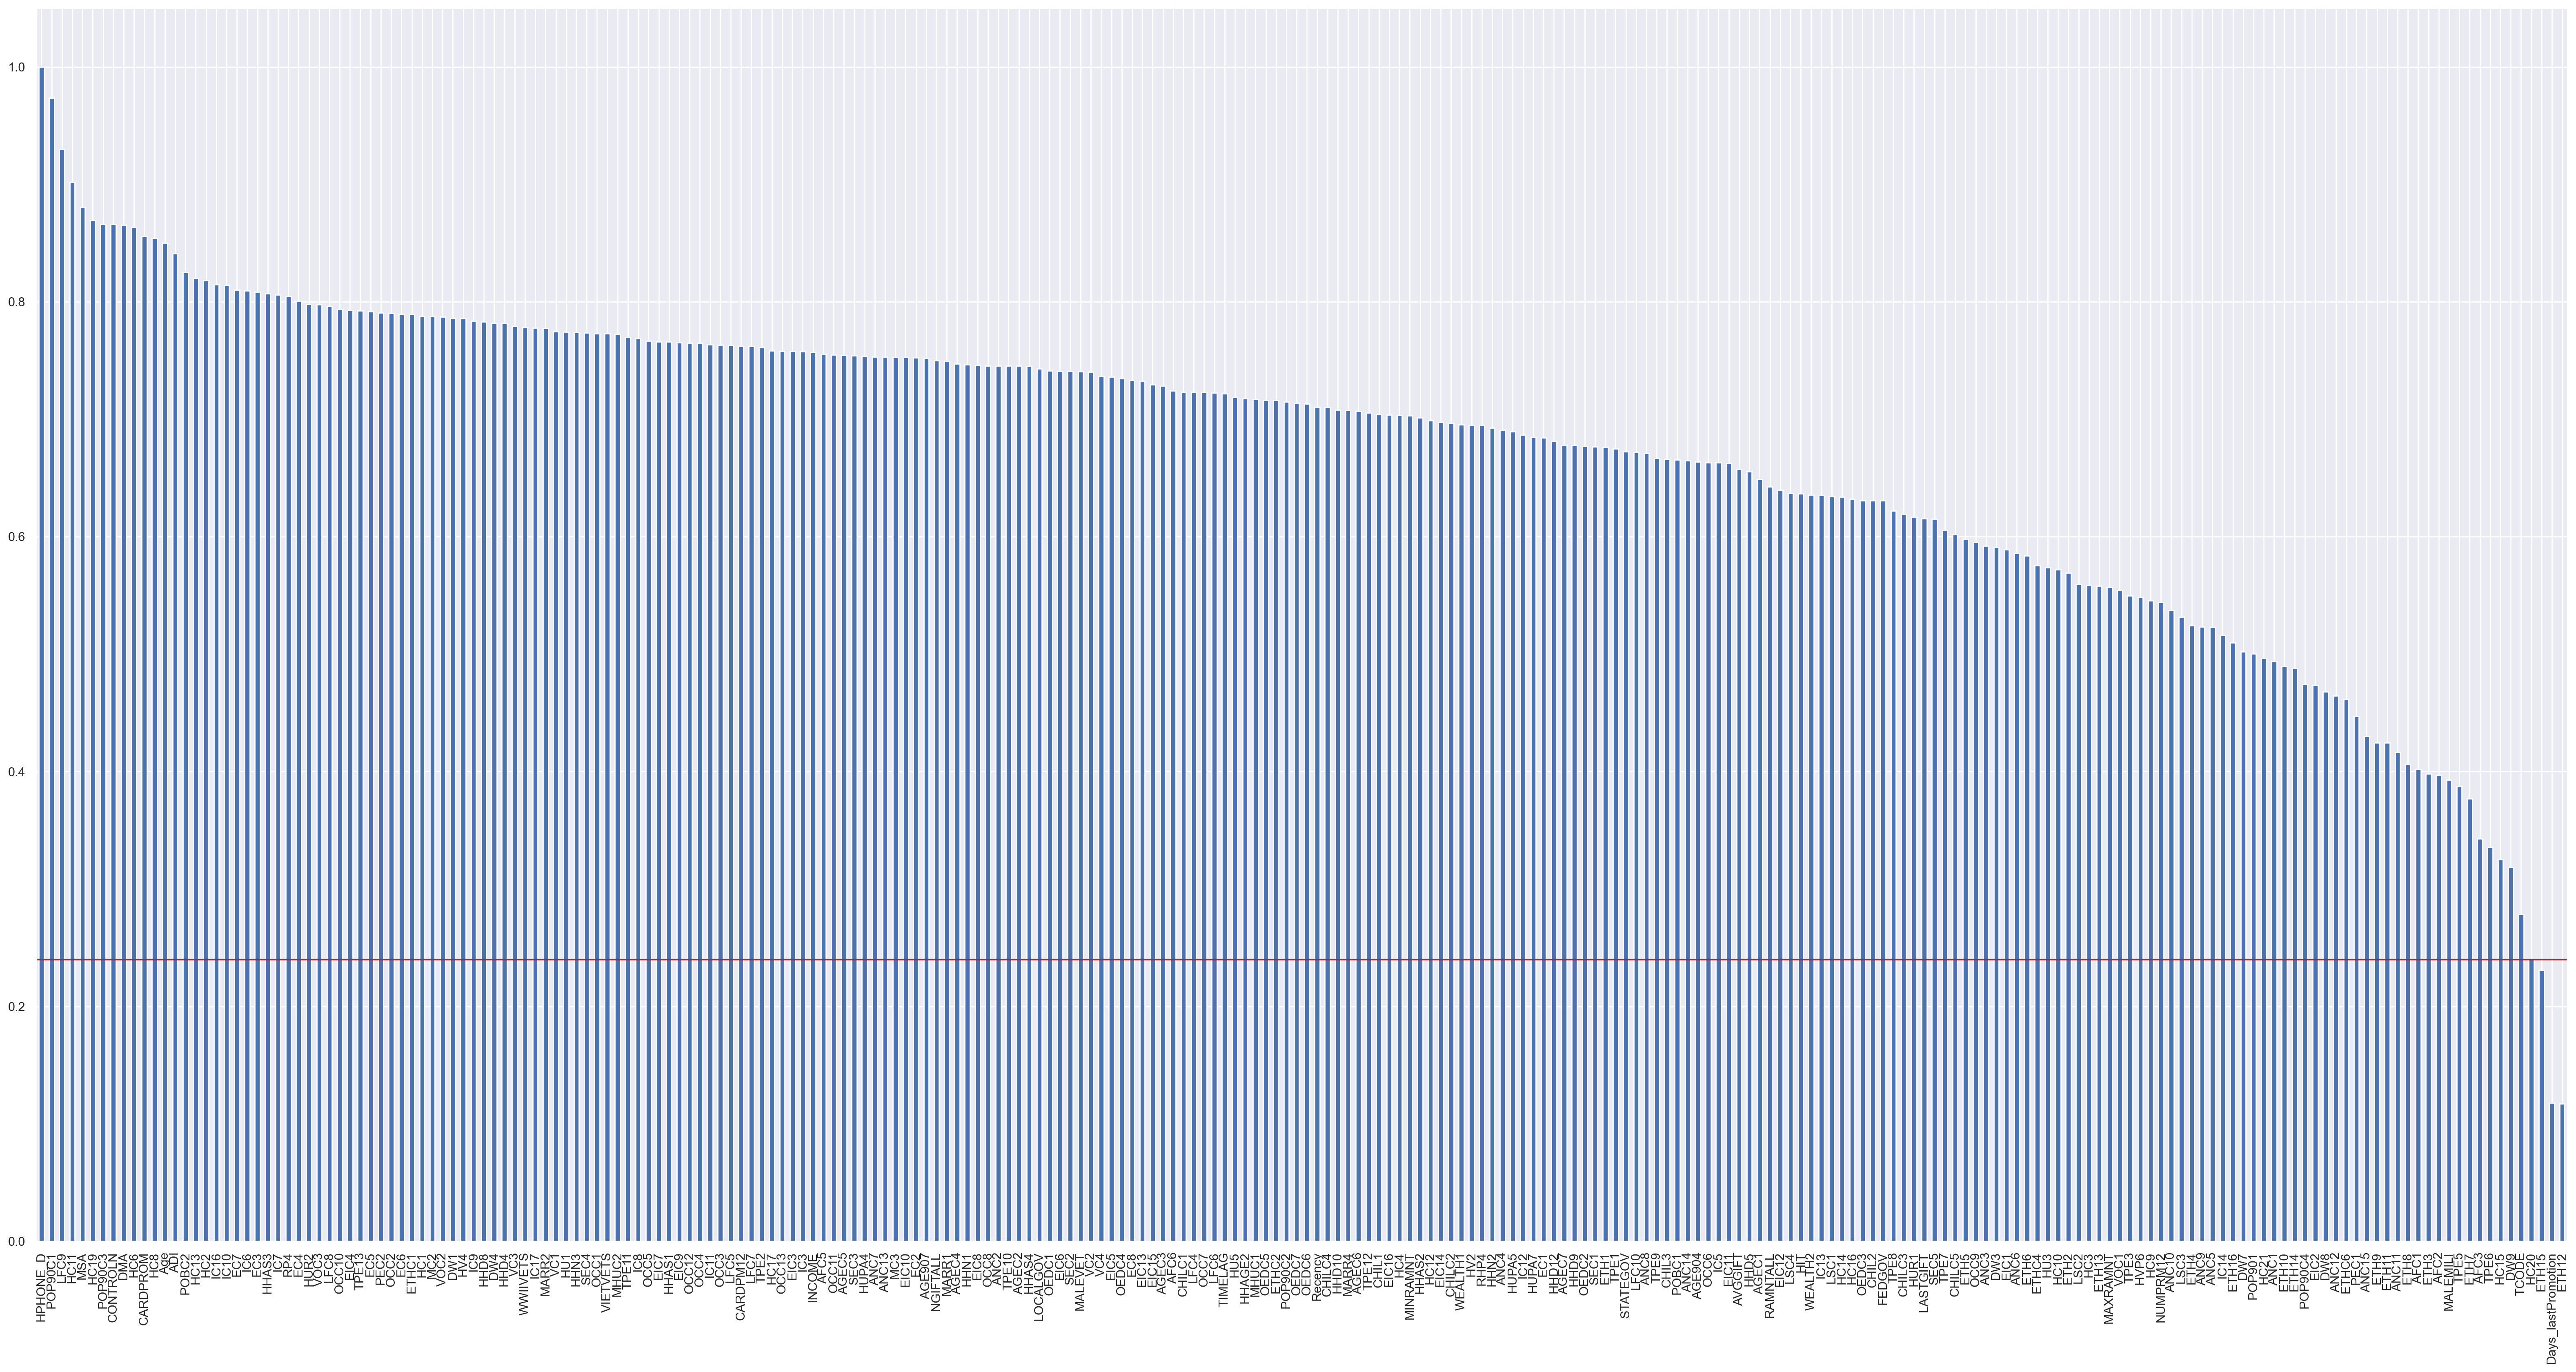

In [246]:
plt.figure(figsize=(40,20), dpi=200)
mad.sort_values(ascending=False).plot(kind='bar')
plt.axhline(y=0.239900, color='red')

In [247]:
donors=donors.drop(columns={"HC20","ETH15","ETH12","Days_lastPromotion","RP4","WEALTH1","LFC9","LFC8","ETHC2","HHD5","LSC1",
                            "HU1","HC19","DW1","ETH1","VOC1","HC17","HC21","HC20","HU3"})
# we are eliminating from mad the smallest values until the big jump and in the discrimination ratio the variables equal to 0

In [248]:
metric_features=donors.select_dtypes(exclude=[object]).columns
len(metric_features)

227

In [249]:
non_metric_features=donors.select_dtypes(include=[object]).columns
len(non_metric_features)

84

**R-square**

In [250]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [251]:
r2_variables(donors[metric_features], donors[metric_features].index).sort_values(ascending=False)

Recency     1.0
DW8         1.0
IC7         1.0
IC6         1.0
IC5         1.0
IC3         1.0
DMA         1.0
ADI         1.0
MSA         1.0
HUPA7       1.0
HUPA5       1.0
HUPA4       1.0
RHP4        1.0
HUR2        1.0
HUR1        1.0
HVP6        1.0
ETHC6       1.0
ETHC4       1.0
ETHC1       1.0
HHD12       1.0
HHD10       1.0
HHD9        1.0
HHD8        1.0
HHD4        1.0
HU5         1.0
HV4         1.0
HV2         1.0
IC8         1.0
IC9         1.0
IC10        1.0
TPE2        1.0
TPE12       1.0
TPE11       1.0
TPE10       1.0
PEC2        1.0
PEC1        1.0
TPE9        1.0
TPE8        1.0
TPE7        1.0
TPE6        1.0
TPE5        1.0
TPE3        1.0
TPE1        1.0
IC11        1.0
MC3         1.0
MC2         1.0
HHAS4       1.0
HHAS3       1.0
HHAS2       1.0
HHAS1       1.0
IC17        1.0
IC16        1.0
IC14        1.0
IC13        1.0
IC12        1.0
DW9         1.0
DW7         1.0
LFC4        1.0
DW4         1.0
ETH11       1.0
ETH10       1.0
ETH9        1.0
ETH8    

<hr>
<a class="anchor" id="pca">
    
# 8. PCA
    
</a>

In [253]:
from sklearn.decomposition import PCA

In [254]:
df_pca = donors.copy()

In [255]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat  

array([[-2.06883269e+00, -3.36921067e+00,  2.45327854e+00, ...,
         3.54701768e-02,  2.04967285e-04,  8.03858281e-03],
       [ 1.61563544e+01,  4.63154361e-01, -4.37258905e+00, ...,
         9.91518444e-03, -4.31969588e-04,  6.77620941e-03],
       [-4.56922480e+00, -4.26581865e+00,  1.87614813e+00, ...,
         2.04489342e-02,  4.15669526e-03,  6.29652181e-03],
       ...,
       [ 9.83092510e+00, -4.44263645e+00, -1.85557310e+00, ...,
        -1.58481363e-02, -4.83647938e-04,  6.88714590e-03],
       [-3.18393398e+00, -2.26448945e-01, -4.90616453e+00, ...,
         2.97772801e-04, -7.62083710e-04, -4.36101896e-03],
       [ 6.26173717e+00, -1.38481248e+00, -1.53993373e+00, ...,
         1.77916768e-02, -2.82222079e-03,  1.98303775e-03]])

In [256]:
# Output PCA table
PCA_table=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
PCA_table

Eigenvalue  Difference    Proportion  Cumulative
1     24.315348    0.000000  1.071149e-01    0.107115
2     16.806310   -7.509038  7.403579e-02    0.181151
3     15.285449   -1.520862  6.733603e-02    0.248487
4      8.367564   -6.917884  3.686111e-02    0.285348
5      7.473296   -0.894268  3.292165e-02    0.318269
6      6.721488   -0.751809  2.960975e-02    0.347879
7      6.108586   -0.612902  2.690977e-02    0.374789
8      5.390970   -0.717617  2.374850e-02    0.398537
9      4.864016   -0.526954  2.142714e-02    0.419965
10     3.649183   -1.214833  1.607552e-02    0.436040
11     3.537118   -0.112065  1.558184e-02    0.451622
12     3.358328   -0.178790  1.479423e-02    0.466416
13     3.267026   -0.091302  1.439203e-02    0.480808
14     3.061988   -0.205038  1.348878e-02    0.494297
15     2.835826   -0.226162  1.249249e-02    0.506790
16     2.711550   -0.124276  1.194502e-02    0.518735
17     2.495117   -0.216433  1.099158e-02    0.529726
18     2.366597   -0.128520  1.042542e-02    0.540152
19     2.138304   -0.228293  9.419738e-03    0.549571
20     2.034777   -0.103527  8.963678e-03    0.558535
21     1.874509   -0.160268  8.257660e-03    0.566793
22     1.804781   -0.069728  7.950490e-03    0.574743
23     1.703954   -0.100828  7.506321e-03    0.582249
24     1.631463   -0.072491  7.186980e-03    0.589436
25     1.548253   -0.083210  6.820420e-03    0.596257
26     1.473725   -0.074528  6.492107e-03    0.602749
27     1.449780   -0.023944  6.386628e-03    0.609136
28     1.426078   -0.023702  6.282214e-03    0.615418
29     1.374219   -0.051859  6.053762e-03    0.621472
30     1.328321   -0.045899  5.851568e-03    0.627323
31     1.291525   -0.036796  5.689473e-03    0.633013
32     1.254642   -0.036883  5.526996e-03    0.638540
33     1.232051   -0.022591  5.427478e-03    0.643967
34     1.218602   -0.013449  5.368231e-03    0.649335
35     1.178869   -0.039733  5.193200e-03    0.654528
36     1.165264   -0.013605  5.133266e-03    0.659662
37     1.138567   -0.026697  5.015659e-03    0.664677
38     1.110507   -0.028060  4.892046e-03    0.669569
39     1.095234   -0.015272  4.824767e-03    0.674394
40     1.084071   -0.011163  4.775590e-03    0.679170
41     1.066393   -0.017677  4.697716e-03    0.683868
42     1.043252   -0.023141  4.595775e-03    0.688463
43     1.036990   -0.006262  4.568189e-03    0.693032
44     1.021781   -0.015210  4.501186e-03    0.697533
45     1.009854   -0.011927  4.448646e-03    0.701981
46     1.006591   -0.003263  4.434271e-03    0.706416
47     0.998187   -0.008404  4.397250e-03    0.710813
48     0.982317   -0.015870  4.327340e-03    0.715140
49     0.977053   -0.005264  4.304152e-03    0.719444
50     0.971087   -0.005966  4.277869e-03    0.723722
51     0.964074   -0.007013  4.246977e-03    0.727969
52     0.949469   -0.014606  4.182636e-03    0.732152
53     0.932596   -0.016873  4.108306e-03    0.736260
54     0.924783   -0.007813  4.073889e-03    0.740334
55     0.918840   -0.005943  4.047708e-03    0.744382
56     0.912352   -0.006488  4.019128e-03    0.748401
57     0.907390   -0.004962  3.997267e-03    0.752398
58     0.899875   -0.007515  3.964163e-03    0.756362
59     0.897842   -0.002033  3.955205e-03    0.760317
60     0.879990   -0.017851  3.876566e-03    0.764194
61     0.871879   -0.008112  3.840832e-03    0.768035
62     0.854045   -0.017834  3.762270e-03    0.771797
63     0.850444   -0.003601  3.746407e-03    0.775544
64     0.842021   -0.008423  3.709302e-03    0.779253
65     0.834926   -0.007095  3.678046e-03    0.782931
66     0.831770   -0.003156  3.664145e-03    0.786595
67     0.814187   -0.017584  3.586685e-03    0.790182
68     0.810283   -0.003903  3.569491e-03    0.793751
69     0.793346   -0.016938  3.494877e-03    0.797246
70     0.786714   -0.006632  3.465663e-03    0.800712
71     0.781964   -0.004750  3.444737e-03    0.804157
72     0.758980   -0.022984  3.343487e-03    0.807500
73     0.748283   -0.010697  3.296366e-03    0.810796
74     0.

In [257]:
PCA_table.loc[PCA_table["Eigenvalue"]>1]

Eigenvalue  Difference  Proportion  Cumulative
1    24.315348    0.000000    0.107115    0.107115
2    16.806310   -7.509038    0.074036    0.181151
3    15.285449   -1.520862    0.067336    0.248487
4     8.367564   -6.917884    0.036861    0.285348
5     7.473296   -0.894268    0.032922    0.318269
6     6.721488   -0.751809    0.029610    0.347879
7     6.108586   -0.612902    0.026910    0.374789
8     5.390970   -0.717617    0.023749    0.398537
9     4.864016   -0.526954    0.021427    0.419965
10    3.649183   -1.214833    0.016076    0.436040
11    3.537118   -0.112065    0.015582    0.451622
12    3.358328   -0.178790    0.014794    0.466416
13    3.267026   -0.091302    0.014392    0.480808
14    3.061988   -0.205038    0.013489    0.494297
15    2.835826   -0.226162    0.012492    0.506790
16    2.711550   -0.124276    0.011945    0.518735
17    2.495117   -0.216433    0.010992    0.529726
18    2.366597   -0.128520    0.010425    0.540152
19    2.138304   -0.228293    0.009420    0.549571
20    2.034777   -0.103527    0.008964    0.558535
21    1.874509   -0.160268    0.008258    0.566793
22    1.804781   -0.069728    0.007950    0.574743
23    1.703954   -0.100828    0.007506    0.582249
24    1.631463   -0.072491    0.007187    0.589436
25    1.548253   -0.083210    0.006820    0.596257
26    1.473725   -0.074528    0.006492    0.602749
27    1.449780   -0.023944    0.006387    0.609136
28    1.426078   -0.023702    0.006282    0.615418
29    1.374219   -0.051859    0.006054    0.621472
30    1.328321   -0.045899    0.005852    0.627323
31    1.291525   -0.036796    0.005689    0.633013
32    1.254642   -0.036883    0.005527    0.638540
33    1.232051   -0.022591    0.005427    0.643967
34    1.218602   -0.013449    0.005368    0.649335
35    1.178869   -0.039733    0.005193    0.654528
36    1.165264   -0.013605    0.005133    0.659662
37    1.138567   -0.026697    0.005016    0.664677
38    1.110507   -0.028060    0.004892    0.669569
39    1.095234   -0.015272    0.004825    0.674394
40    1.084071   -0.011163    0.004776    0.679170
41    1.066393   -0.017677    0.004698    0.683868
42    1.043252   -0.023141    0.004596    0.688463
43    1.036990   -0.006262    0.004568    0.693032
44    1.021781   -0.015210    0.004501    0.697533
45    1.009854   -0.011927    0.004449    0.701981
46    1.006591   -0.003263    0.004434    0.706416

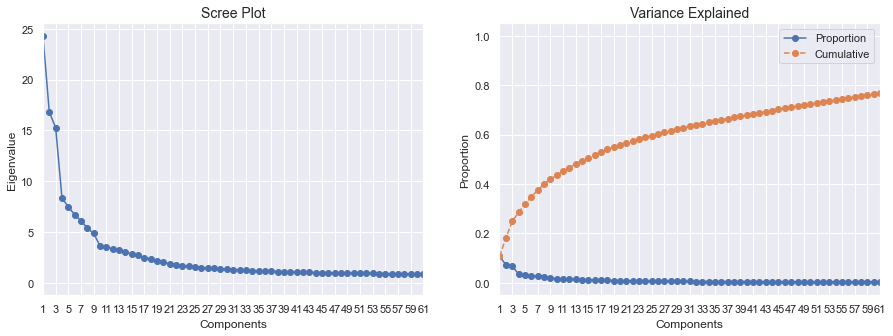

In [258]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax1.set_xlim(0, 60)
ax2.set_xlim(0, 60)
plt.show()

In [259]:
pca = PCA(n_components=47)
pca_feat = pca.fit_transform(df_pca[metric_features])


In [260]:
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0      -2.068834 -3.369207  2.453286 -1.246229  0.155658  1.249986 -1.894733   
1      16.156350  0.463154 -4.372590 -8.871592  2.457687 -6.226578  3.213466   
2      -4.569225 -4.265804  1.876157 -0.239758  0.124073 -0.291452 -0.655523   
3      -3.467869  0.037852 -2.753301 -4.197700  1.209070 -5.842658  3.992809   
4      -5.904809  0.676630 -0.252839 -5.147749 -1.064574  3.837251  1.900192   
...          ...       ...       ...       ...       ...       ...       ...   
90498  -1.675800 -3.273447  2.223384  0.678444 -0.825235 -2.823967  0.946584   
90499   3.803524  0.294411 -5.654666  4.687563 -0.183687  1.349653  4.737394   
90500   9.830924 -4.442642 -1.855557 -0.420955  2.812487 -0.611263  1.673672   
90501  -3.183932 -0.226467 -4.906173 -0.633371  0.310520  6.024620  0.823746   
90502   6.261737 -1.384806 -1.539923 -2.901756  0.241642  0.367577 -0.821319   

            PC7       PC8       PC9  ...      PC37      PC38      PC39  \
0     -0.524355  2.572971 -0.247613  ...  0.147963 -0.268342 -0.680425   
1     -1.450373 -0.607229  2.932343  ... -0.675908 -0.720768  0.942073   
2     -1.960195 -2.069905  2.125361  ... -0.450948  0.495131  0.422886   
3     -5.189615  2.175851 -1.234655  ...  0.207880 -0.750127 -0.310783   
4      8.344250 -1.645284  0.438206  ...  1.015862  0.287156  0.335122   
...         ...       ...       ...  ...       ...       ...       ...   
90498  0.216174 -1.565064  1.322186  ...  0.002462 -0.897674  0.129582   
90499  3.329045  1.797024  1.456191  ...  1.445374 -0.601622  0.760150   
90500 -0.000859 -3.712473 -3.663550  ...  0.138640  0.369807  1.543309   
90501  0.435302  1.265094 -1.058735  ...  0.819819  1.415724 -0.462355   
90502 -0.048224  2.626487 -0.830760  ... -1.097020 -0.604212 -0.823950   

           PC40      PC41      PC42      PC43      PC44      PC45      PC46  
0     -0.946323  1.224276 -0.780607  0.066513  0.517737  0.494201  0.943139  
1      1.373909 -0.358747 -0.576824  3.111311  1.668437  1.145609 -3.089560  
2      0.046244 -0.400557 -0.589451 -0.582080 -0.062244  0.365672 -0.393225  
3     -0.990056 -1.389624  1.553042 -0.733755  0.271853  0.761701  0.963466  
4      0.787459 -0.344916  0.994011 -0.538428 -1.154466 -0.043469 -0.574427  
...         ...       ...       ...       ...       ...       ...       ...  
90498 -0.548044  0.263918  2.325173  1.200103  1.204416  0.403303 -0.015663  
90499 -1.351533 -1.776060  1.146476 -1.825116  0.723427 -0.217246 -0.895206  
90500 -1.256931  0.205168  0.238609  0.467710  1.946338 -1.579980 -0.315229  
90501 -0.278679 -0.199398  0.615923 -1.417548  2.044916  0.891279  1.210721  
90502 -0.082949  1.459424  0.487836  0.156821  0.018969  0.762200 -0.570765  

[90503 rows x 47 columns]

In [261]:
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

OSOURCE     TCODE STATE    ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR  \
0     GRI -0.161431    IL  61081        O      0   XXXX     T2        U   
1     BOA -0.154633    CA  91326        O      0   XXXX     S1        H   
2     AMH -0.154633    NC  27017        O      0   XXXX     R2        U   
3     BRY -0.161431    CA  95953        O      0   XXXX     R2        U   
4     MBC -0.161431    FL  33176        O      0   XXXX     S2        H   

  CHILD03  ...      PC37      PC38      PC39      PC40      PC41      PC42  \
0       N  ...  0.147963 -0.268342 -0.680425 -0.946323  1.224276 -0.780607   
1       N  ... -0.675908 -0.720768  0.942073  1.373909 -0.358747 -0.576824   
2       N  ... -0.450948  0.495131  0.422886  0.046244 -0.400557 -0.589451   
3       N  ...  0.207880 -0.750127 -0.310783 -0.990056 -1.389624  1.553042   
4       N  ...  1.015862  0.287156  0.335122  0.787459 -0.344916  0.994011   

       PC43      PC44      PC45      PC46  
0  0.066513  0.517737  0.494201  0.943139  
1  3.111311  1.668437  1.145609 -3.089560  
2 -0.582080 -0.062244  0.365672 -0.393225  
3 -0.733755  0.271853  0.761701  0.963466  
4 -0.538428 -1.154466 -0.043469 -0.574427  

[5 rows x 358 columns]

In [262]:
df_pca[[i for i in list(df_pca.columns) if i not in non_metric_features]]

TCODE    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0     -0.161431  0.049363 -0.479366 -0.253308  0.741294  0.276095 -0.839251   
1     -0.154633  1.272994  1.962100 -0.253308 -1.390990  1.678309 -1.239803   
2     -0.154633 -0.562453 -0.174183 -0.253308 -0.946764 -0.057766  0.019076   
3     -0.161431 -1.786084 -0.174183 -0.253308 -0.680229 -1.059347 -0.095368   
4     -0.161431 -0.562453  8.676131  0.027190 -0.236003 -1.393208  1.163511   
...         ...       ...       ...       ...       ...       ...       ...   
90498 -0.161431  1.272994  1.046550  0.307689  1.185519 -0.258082  0.762959   
90499 -0.154633  0.049363 -0.479366  3.673669  0.474758  1.144132 -1.239803   
90500 -0.154633  1.884809 -0.326775 -0.253308  0.030532  0.877043 -0.782029   
90501 -0.154633  0.049363 -0.479366 -0.253308 -1.124455  1.077360 -0.724807   
90502 -0.161431  1.884809 -0.479366 -0.253308 -0.236003  0.342867 -0.724807   

       LOCALGOV  STATEGOV    FEDGOV  ...      PC37      PC38      PC39  \
0      0.731683 -0.506822 -0.527263  ...  0.147963 -0.268342 -0.680425   
1     -0.200894 -0.506822 -0.527263  ... -0.675908 -0.720768  0.942073   
2     -0.200894  0.680313 -0.527263  ... -0.450948  0.495131  0.422886   
3     -0.900327 -0.902534 -0.014870  ...  0.207880 -0.750127 -0.310783   
4      4.461994 -0.308966 -0.271067  ...  1.015862  0.287156  0.335122   
...         ...       ...       ...  ...       ...       ...       ...   
90498  4.228849  0.878169 -0.527263  ...  0.002462 -0.897674  0.129582   
90499  0.032250  0.680313  2.547095  ...  1.445374 -0.601622  0.760150   
90500 -0.667183 -0.704678 -0.783460  ...  0.138640  0.369807  1.543309   
90501  0.032250  3.648151 -0.783460  ...  0.819819  1.415724 -0.462355   
90502  0.498539 -0.704678 -0.527263  ... -1.097020 -0.604212 -0.823950   

           PC40      PC41      PC42      PC43      PC44      PC45      PC46  
0     -0.946323  1.224276 -0.780607  0.066513  0.517737  0.494201  0.943139  
1      1.373909 -0.358747 -0.576824  3.111311  1.668437  1.145609 -3.089560  
2      0.046244 -0.400557 -0.589451 -0.582080 -0.062244  0.365672 -0.393225  
3     -0.990056 -1.389624  1.553042 -0.733755  0.271853  0.761701  0.963466  
4      0.787459 -0.344916  0.994011 -0.538428 -1.154466 -0.043469 -0.574427  
...         ...       ...       ...       ...       ...       ...       ...  
90498 -0.548044  0.263918  2.325173  1.200103  1.204416  0.403303 -0.015663  
90499 -1.351533 -1.776060  1.146476 -1.825116  0.723427 -0.217246 -0.895206  
90500 -1.256931  0.205168  0.238609  0.467710  1.946338 -1.579980 -0.315229  
90501 -0.278679 -0.199398  0.615923 -1.417548  2.044916  0.891279  1.210721  
90502 -0.082949  1.459424  0.487836  0.156821  0.018969  0.762200 -0.570765  

[90503 rows x 274 columns]

In [263]:
def _color_red_or_green(val):
    if val < -0.40:
        color = 'background-color: red'
    elif val > 0.40:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[[i for i in list(df_pca.columns) if i not in non_metric_features]].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

In [264]:
loadings_excel = loadings.style.applymap(_color_red_or_green)
loadings_excel.to_excel('loadings_pca.xlsx')

In [265]:
loadings_pca = pca.components_
loadings_pca=np.transpose(loadings_pca)

In [266]:
df_pca[metric_features].columns.shape

(227,)

In [267]:
len(pca_feat_names)

47

In [268]:
pca_table = pd.DataFrame(loadings_pca, index=df_pca[metric_features].columns,columns=pca_feat_names)
print('PCA loadings \n%s' %pca_table)

PCA loadings 
               PC0       PC1       PC2       PC3       PC4       PC5  \
TCODE     0.001660 -0.005807  0.004648  0.004745 -0.001394 -0.007191   
INCOME    0.082375 -0.007276 -0.003018 -0.012235  0.031545 -0.016929   
HIT       0.013801  0.010267  0.012363 -0.007127 -0.018195  0.042711   
MALEMILI  0.006330 -0.005748 -0.047353  0.121297 -0.009271  0.012029   
MALEVET   0.009531 -0.010805  0.109150  0.059671 -0.093697 -0.013998   
VIETVETS  0.035084 -0.077734 -0.087692  0.062855  0.015232  0.030761   
WWIIVETS -0.024282  0.071009  0.130230 -0.056913 -0.083723 -0.034230   
LOCALGOV -0.011444 -0.009018  0.007051 -0.056105 -0.028242  0.035867   
STATEGOV -0.015566 -0.003691  0.002093  0.015548  0.029488  0.119403   
FEDGOV   -0.001746 -0.014760 -0.040421  0.080168 -0.013435  0.019782   
WEALTH2   0.104167  0.002883  0.010156  0.009818  0.029684  0.031377   
POP901   -0.001600 -0.002520 -0.029798  0.017323 -0.014045 -0.032756   
POP90C1   0.083946  0.110076 -0.085036 -0.022896 -

In [269]:
pca_table["PC43"].nlargest(3)

TCODE    0.313982
HC15     0.263824
ANC15    0.221466
Name: PC43, dtype: float64

In [270]:
pca_table["PC43"].nsmallest(3)

POP901   -0.408864
HIT      -0.184532
TPE6     -0.158527
Name: PC43, dtype: float64

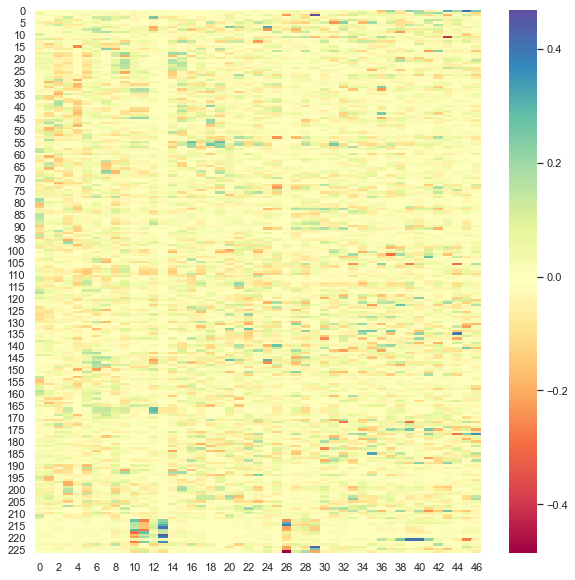

In [271]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(loadings_pca, cmap='Spectral')
plt.show()


<hr>
<a class="anchor" id="import">
    
# 9. Clustering
    
</a>

In [252]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [254]:
# pca_features = df_pca.columns[df_pca.columns.str.startswith('PC')]
# pca_features=pca_features.drop('PCOWNERS')
# pca_features

In [255]:
metric_features

Index(['TCODE', 'INCOME', 'HIT', 'MALEMILI', 'MALEVET', 'VIETVETS', 'WWIIVETS',
       'LOCALGOV', 'STATEGOV', 'FEDGOV',
       ...
       'NGIFTALL', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'TIMELAG', 'AVGGIFT',
       'CONTROLN', 'HPHONE_D', 'Age', 'Recency'],
      dtype='object', length=227)

<hr>
<a class="anchor" id="kmeans">
    
## 9.1. K-means - all donors dataset
    
</a>

In [256]:
range_clusters = range(1, 15)

In [257]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1, n_jobs=-1)
    kmclust.fit(donors[metric_features])
    inertia.append(kmclust.inertia_)

In [258]:
inertia[0]

20544180.99999987

In [259]:
ini=[]
for i in range(1,14):
    ini.append(round(inertia[i-1]-inertia[i],2))
print(ini)

[1508224.3, 788619.36, 663285.45, 551603.94, 452022.43, 385934.89, 329107.11, 264378.16, 250708.71, 196740.83, 185623.0, 168996.75, 149314.63]


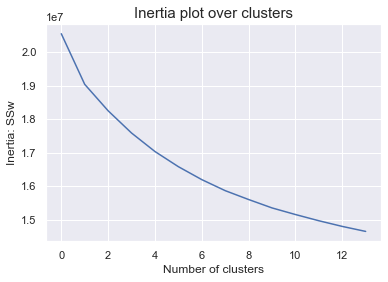

In [260]:
# The inertia plot
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [261]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1, n_jobs=-1)
km_labels = kmclust.fit_predict(donors[metric_features])
km_labels

array([2, 1, 2, ..., 1, 0, 1])

In [262]:
df_kmeans = pd.concat((donors, pd.Series(km_labels, name='labels')), axis=1)
df_kmeans_mean=df_kmeans.groupby('labels').mean()
df_kmeans_mean

TCODE    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
labels                                                                         
0      -0.035156 -0.251087 -0.011176  0.148368 -0.430228 -0.107988 -0.116212   
1       0.007091  0.497324  0.079424  0.030793  0.043786  0.223641 -0.164596   
2       0.013116 -0.235140 -0.052637 -0.100047  0.192150 -0.108308  0.181773   

        LOCALGOV  STATEGOV    FEDGOV  ...  NGIFTALL  MINRAMNT  MAXRAMNT  \
labels                                ...                                 
0      -0.022180  0.016014  0.111825  ... -0.043030  0.057108  0.015430   
1      -0.027187 -0.077257  0.003449  ... -0.096096  0.092822  0.095449   
2       0.031581  0.048519 -0.060860  ...  0.093181 -0.098112 -0.078309   

        LASTGIFT   TIMELAG   AVGGIFT  CONTROLN  HPHONE_D       Age   Recency  
labels                                                                        
0       0.020855 -0.024573  0.039893  0.186578 -0.113713  0.015051  0.000953  
1       0.104622  0.039360  0.128587  0.151222  0.033436 -0.065892  0.011289  
2      -0.087892 -0.016158 -0.115462 -0.208626  0.034693  0.040655 -0.008807  

[3 rows x 227 columns]

In [263]:
kmeans_loadings=kmclust.transform(donors[metric_features])
kmeans_loadings_table=pd.DataFrame(kmclust.transform(donors[metric_features]))

In [264]:
print(df_kmeans["labels"].value_counts())

2    40087
1    29509
0    20907
Name: labels, dtype: int64


In [265]:
df_kmeans

OSOURCE     TCODE STATE     ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR  \
0         GRI -0.161431    IL   61081        O      0   XXXX     T2        U   
1         BOA -0.154633    CA   91326        O      0   XXXX     S1        H   
2         AMH -0.154633    NC   27017        O      0   XXXX     R2        U   
3         BRY -0.161431    CA   95953        O      0   XXXX     R2        U   
4         MBC -0.161431    FL   33176        O      0   XXXX     S2        H   
...       ...       ...   ...     ...      ...    ...    ...    ...      ...   
90498     LHJ -0.161431    FL  32776-        O      0   XXXX     S2        H   
90499     ASE -0.154633    AK   99504        O      0   XXXX     C2        U   
90500     DCD -0.154633    TX   77379        O      0   XXXX     C1        H   
90501     MBC -0.154633    MI   48910        O      0   XXXX     C3        U   
90502     PRV -0.161431    CA   91320        O      0   XXXX     C1        H   

      CHILD03  ...   AVGGIFT  CONTROLN  HPHONE_D  MDMAUD_R MDMAUD_F  MDMAUD_A  \
0           N  ... -0.682168  0.002178 -1.006062         X        X         X   
1           N  ...  0.308558  0.963193 -1.006062         X        X         X   
2           N  ... -0.714729 -1.455784  0.993974         X        X         X   
3           N  ... -0.798363  1.398586  0.993974         X        X         X   
4           N  ... -0.791816 -1.600172  0.993974         X        X         X   
...       ...  ...       ...       ...       ...       ...      ...       ...   
90498       N  ... -1.228109 -1.093092 -1.006062         X        X         X   
90499       N  ...  1.475382  1.616310 -1.006062         X        X         X   
90500       N  ...  0.850298  0.495029  0.993974         X        X         X   
90501       N  ... -0.614186  1.708261  0.993974         X        X         X   
90502       N  ... -0.131542 -1.644017  0.993974         X        X         X   

      GEOCODE2       Age   Recency  labels  
0            C  0.220585 -0.092966       2  
1            A -0.812616 -0.092966       1  
2            C -0.537096 -0.092966       2  
3            C  0.840505 -0.092966       0  
4            A  1.391545 -0.350495       0  
...        ...       ...       ...     ...  
90498        C -0.537096 -0.608024       2  
90499        C -0.537096 -0.608024       1  
90500        A -0.674856 -0.848939       1  
90501        B  0.151705 -2.626722       0  
90502        A  0.013945 -3.391003       1  

[90503 rows x 312 columns]

In [266]:
# Look at metric_features mean grouped by labels (Clusters)
mean_kmeans = df_kmeans.groupby('labels').mean()[metric_features]
mean_kmeans

TCODE    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
labels                                                                         
0      -0.035156 -0.251087 -0.011176  0.148368 -0.430228 -0.107988 -0.116212   
1       0.007091  0.497324  0.079424  0.030793  0.043786  0.223641 -0.164596   
2       0.013116 -0.235140 -0.052637 -0.100047  0.192150 -0.108308  0.181773   

        LOCALGOV  STATEGOV    FEDGOV  ...  NGIFTALL  MINRAMNT  MAXRAMNT  \
labels                                ...                                 
0      -0.022180  0.016014  0.111825  ... -0.043030  0.057108  0.015430   
1      -0.027187 -0.077257  0.003449  ... -0.096096  0.092822  0.095449   
2       0.031581  0.048519 -0.060860  ...  0.093181 -0.098112 -0.078309   

        LASTGIFT   TIMELAG   AVGGIFT  CONTROLN  HPHONE_D       Age   Recency  
labels                                                                        
0       0.020855 -0.024573  0.039893  0.186578 -0.113713  0.015051  0.000953  
1       0.104622  0.039360  0.128587  0.151222  0.033436 -0.065892  0.011289  
2      -0.087892 -0.016158 -0.115462 -0.208626  0.034693  0.040655 -0.008807  

[3 rows x 227 columns]

In [267]:
mean_kmeansT = mean_kmeans.T
mean_kmeansT

labels           0         1         2
TCODE    -0.035156  0.007091  0.013116
INCOME   -0.251087  0.497324 -0.235140
HIT      -0.011176  0.079424 -0.052637
MALEMILI  0.148368  0.030793 -0.100047
MALEVET  -0.430228  0.043786  0.192150
VIETVETS -0.107988  0.223641 -0.108308
WWIIVETS -0.116212 -0.164596  0.181773
LOCALGOV -0.022180 -0.027187  0.031581
STATEGOV  0.016014 -0.077257  0.048519
FEDGOV    0.111825  0.003449 -0.060860
WEALTH2  -0.288240  0.602524 -0.293203
POP901    0.026668 -0.027019  0.005980
POP90C1   0.559804  0.534292 -0.685266
POP90C2  -0.146117 -0.280865  0.282958
POP90C3  -0.615057 -0.394378  0.611088
POP90C4  -0.350284  0.143141  0.077318
ETH2      0.566106 -0.247230 -0.113256
ETH3      0.051966 -0.163449  0.093217
ETH4      0.321335  0.275889 -0.370678
ETH5      0.657770 -0.106700 -0.264510
ETH6      0.090818  0.333539 -0.292891
ETH7      0.109020  0.198416 -0.202917
ETH8      0.168742  0.215428 -0.246588
ETH9      0.261917  0.134166 -0.235363
ETH10     0.151922  0.240488 -0.256263
ETH11     0.259154  0.074944 -0.190328
ETH13     0.585818 -0.134791 -0.206305
ETH14     0.351228 -0.027317 -0.163071
ETH16     0.506843  0.019039 -0.278354
AGE904   -0.299193 -0.076577  0.212412
AGE907   -0.290137  0.064790  0.103625
CHIL1     0.495107 -0.045620 -0.224636
CHIL2    -0.641686  0.100216  0.260894
CHIL3    -0.478385  0.098840  0.176739
AGEC1     0.727491 -0.279855 -0.173408
AGEC2     0.480264 -0.011607 -0.241933
AGEC3    -0.491207  0.656194 -0.226855
AGEC4    -0.825811  0.578809  0.004619
AGEC5    -0.651326 -0.000684  0.340196
AGEC6    -0.283479 -0.275641  0.350752
AGEC7     0.090739 -0.368633  0.224036
CHILC1    0.592185 -0.059877 -0.264772
CHILC2    0.208367  0.010037 -0.116060
CHILC3   -0.517854  0.097558  0.198267
CHILC4   -0.681756  0.142908  0.250366
CHILC5   -0.120212 -0.015533  0.074129
HHAGE2    0.221286 -0.490640  0.245762
HHN1      0.724189 -0.450075 -0.046383
HHN2     -0.583480  0.118703  0.216929
HHN3     -0.434214  0.350412 -0.031487
MARR1    -1.262794  0.467652  0.314349
MARR2     0.922934 -0.404386 -0.183669
MARR4     0.977363 -0.127457 -0.415910
DW3       0.619010 -0.296788 -0.104366
DW4       1.062819 -0.193205 -0.412080
DW7       0.233281 -0.177014  0.008638
DW8       0.126423 -0.152002  0.045957
DW9       0.233642 -0.096171 -0.051060
HV2      -0.086512  0.730736 -0.492793
HV4       0.021407  0.860900 -0.644894
HU5      -0.377131 -0.161514  0.315583
HHD4     -0.719404  0.450794  0.043358
HHD8      0.458940 -0.339285  0.010399
HHD9      0.751890 -0.421811 -0.081636
HHD10     0.907548 -0.314845 -0.241558
HHD12     0.758702  0.004212 -0.398795
ETHC1    -0.838368  0.234559  0.264579
ETHC4     0.550543 -0.251899 -0.101702
ETHC6     0.404525 -0.233712 -0.038936
HVP6     -0.081712  0.494525 -0.321416
HUR1      0.877393 -0.335340 -0.210744
HUR2     -0.959883  0.855314 -0.128999
RHP4      0.469419 -0.204331 -0.094408
HUPA4     0.260503 -0.356650  0.126675
HUPA5     0.855635 -0.332446 -0.201527
HUPA7    -0.279600 -0.424937  0.458629
MSA       0.278726  0.344152 -0.398705
ADI      -0.195693 -0.270344  0.301069
DMA       0.185718  0.155678 -0.211458
IC3      -0.598275  1.081407 -0.484025
IC5      -0.380323  0.850797 -0.427938
IC6       0.524372 -0.895479  0.385703
IC7       0.369471 -0.889055  0.461761
IC8       0.085186 -0.518535  0.337278
IC9      -0.351766  0.277285 -0.020656
IC10     -0.535190  0.971668 -0.436145
IC11     -0.452990  0.987480 -0.490655
IC12     -0.377655  0.818605 -0.405632
IC13     -0.304117  0.669326 -0.334098
IC14     -0.284707  0.585480 -0.282499
IC16      0.312713 -0.897399  0.497505
IC17      0.092004 -0.663197  0.440211
HHAS1    -0.165658 -0.461713  0.426276
HHAS2     0.597157 -0.560828  0.101397
HHAS3    -0.658758  0.790005 -0.237973
HHAS4     0.670666 -0.699804  0.165363
MC2      -0.612037 -0.121892  0.408930
MC3       0.238367  0.203385 -0.274035
TPE1     -0.711252  0.445381  0.043091
TPE2      0.214117 -0.423531  0.200100
TPE3      0.703536 -0.065288 -0.318863
TPE5      0.152619  0.

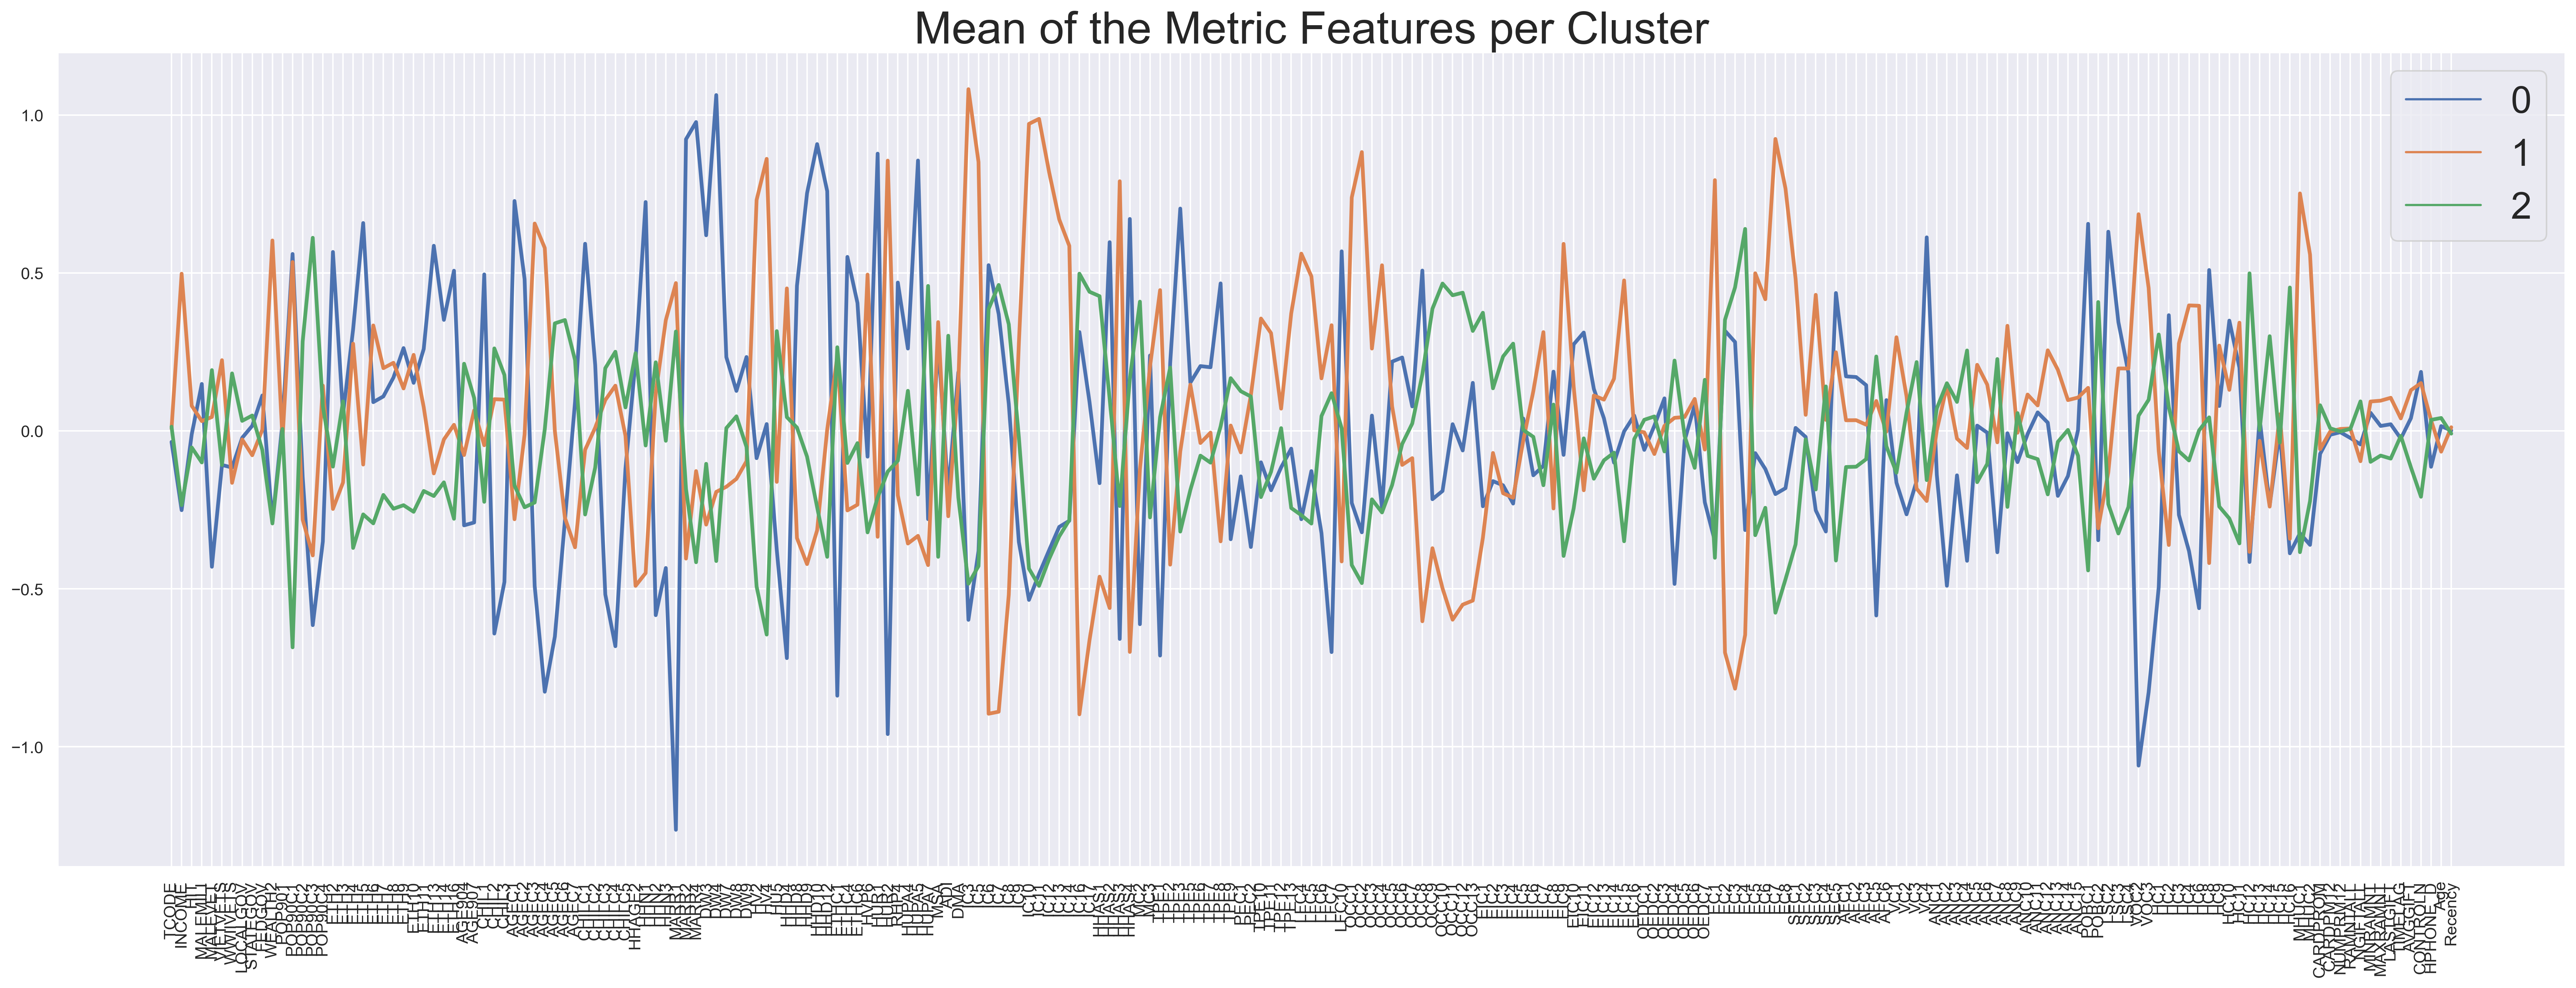

In [268]:
# Visualize the mean for metric features per cluster
from matplotlib.ticker import MaxNLocator

plt.figure(figsize = (30,10), dpi=300)
plt.xticks(rotation=90)
plt.title('Mean of the Metric Features per Cluster', fontdict = {'fontsize': 30})

sns.lineplot(data=mean_kmeansT, dashes = False, linewidth=2.5)
plt.legend(fontsize=25)

**K-means - using PCA loadings**

In [ ]:
# inertia_pca = []
# for n_clus in range_clusters:  # iterate over desired ncluster range
#     kmclust_pca = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=0, n_jobs=-1)
#     kmclust_pca.fit(df_pca[pca_features])
#     inertia_pca.append(kmclust_pca.inertia_)

In [ ]:
# # The inertia plot
# plt.plot(inertia_pca)
# plt.ylabel("Inertia: SSw")
# plt.xlabel("Number of clusters")
# plt.title("Inertia plot over clusters", size=15)
# plt.show()

In [ ]:
# number_clusters = 3
# kmclust_pca = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1, n_jobs=-1)
# km_labels_pca = kmclust_pca.fit_predict(df_pca[pca_features])
# km_labels_pca

In [ ]:
# df_kmeans_pca = pd.concat((df_pca, pd.Series(km_labels_pca, name='labels')), axis=1)
# df_kmeans_pca.groupby('labels').mean()

In [ ]:
# print(df_kmeans_pca["labels"].value_counts())

**Visualization**

In [ ]:
# plt.figure(figsize=(12,6),dpi=200)

# plt.subplot(1,2,1)
# sns.scatterplot(x='VIETVETS',y='WWIIVETS',data=df_kmeans,hue='labels')

# plt.subplot(1,2,2)
# sns.scatterplot(x='VIETVETS',y='WWIIVETS',data=df_kmeans_pca,hue='labels')

In [ ]:
# import seaborn as sns


# # Draw a pointplot to show pulse as a function of three categorical factors
# g = sns.catplot(x="INCOME", y="GENDER", col="labels",
#                 capsize=.2, height=6, aspect=.75,
#                 kind="point", data=df_kmeans)
# g.despine(left=True)

In [ ]:
# # Draw a pointplot to show pulse as a function of three categorical factors
# g = sns.catplot(x="INCOME", y="GENDER", col="labels",
#                 capsize=.2, height=6, aspect=.75,
#                 kind="point", data=df_kmeans_pca)
# g.despine(left=True)

<hr>
<a class="anchor" id="perspectives">
    
## 9.2. Clustering using different perspectives
    
</a>

In [269]:
donors_f=donors.copy()

In [270]:
donors_features = ['Age','Recency','AVGGIFT','HPHONE_D','NUMPRM12','INCOME']

neighborhood_features = ['POP90C1','HC13', 'PEC1', 'TPE3','IC3','AFC1','EC1','OEDC1','VC3','EIC13','EIC14',
                        'EIC3','EIC4','EIC5']
df_donf = donors_f[donors_features].copy()
df_neighf = donors_f[neighborhood_features].copy()

In [271]:
df_donf.dtypes

Age         float64
Recency     float64
AVGGIFT     float64
HPHONE_D    float64
NUMPRM12    float64
INCOME      float64
dtype: object

In [272]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone

In [273]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=20):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=10,
    random_state=1
)


***donors_features***

In [274]:
#Finding optimal cluster
r2_scores = {}
r2_scores['kmeans_donf'] = get_r2_scores(df_donf, kmeans)
r2_scores['kmeans_neighf'] = get_r2_scores(df_neighf, kmeans)

pd.DataFrame(r2_scores)

kmeans_donf  kmeans_neighf
2      0.170157       0.104440
3      0.310252       0.162385
4      0.390982       0.211495
5      0.442551       0.254003
6      0.491963       0.293104
7      0.525656       0.336673
8      0.556806       0.372297
9      0.579248       0.406697
10     0.599229       0.429880
11     0.615445       0.447889
12     0.635306       0.464493
13     0.651567       0.480018
14     0.664602       0.492512
15     0.676180       0.504345
16     0.685449       0.514853
17     0.694415       0.523693
18     0.704418       0.530391
19     0.711862       0.538146

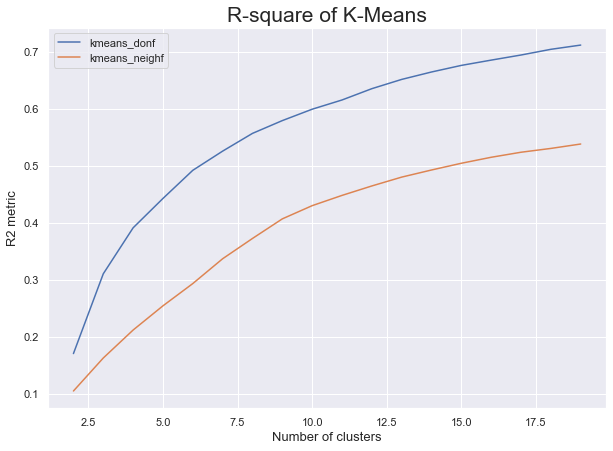

In [275]:
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))
plt.title("R-square of K-Means", fontsize=21)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

In [276]:
# Applying the right clustering (algorithm and number of clusters) for each perspective
kmeans_donf = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=0
)
donf_labels = kmeans_donf.fit_predict(df_donf)

kmeans_neighf = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=0
)
neighf_labels = kmeans_neighf.fit_predict(df_neighf)

donors_f['donf_labels'] = donf_labels
donors_f['neighf_labels'] = neighf_labels

In [277]:
# Look at donors_features mean grouped by donf_labels (Donors Clusters)
donors_f.groupby('donf_labels').mean()[donors_features]

Age   Recency   AVGGIFT  HPHONE_D  NUMPRM12    INCOME
donf_labels                                                            
0            0.106036  0.131087 -0.078222  0.993974 -0.196549 -0.027827
1           -0.157113  0.129453  0.031122 -1.006062 -0.208777  0.037906
2            0.378667 -1.985703  0.363369  0.011544  3.088590 -0.074164

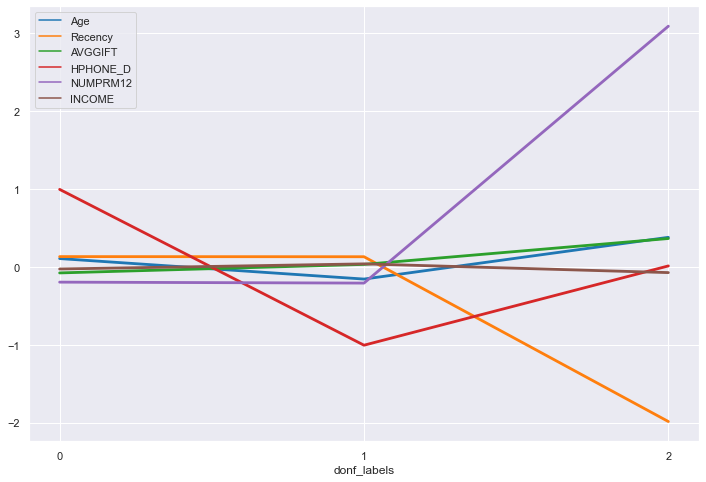

In [278]:
# Visualize the mean for metric features per donor cluster
from matplotlib.ticker import MaxNLocator

ax = plt.figure(figsize = (12, 8)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

sns.lineplot(data=donors_f.groupby('donf_labels').mean()[donors_features], dashes = False, linewidth=2.8, palette='tab10')

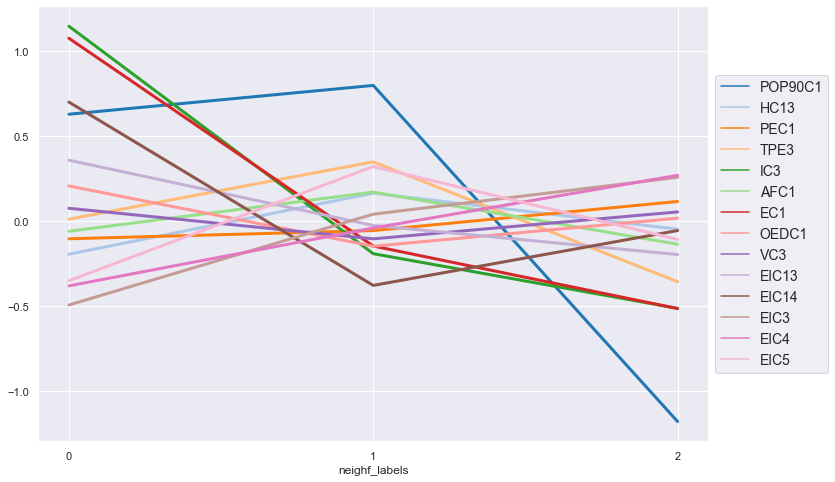

In [279]:
# Visualize the mean for metric features per neighborhood cluster
ax = plt.figure(figsize = (12, 8)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

sns.lineplot(data=donors_f.groupby('neighf_labels').mean()[neighborhood_features], dashes = False, linewidth=3.0, palette='tab20')
ax.legend(fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5))

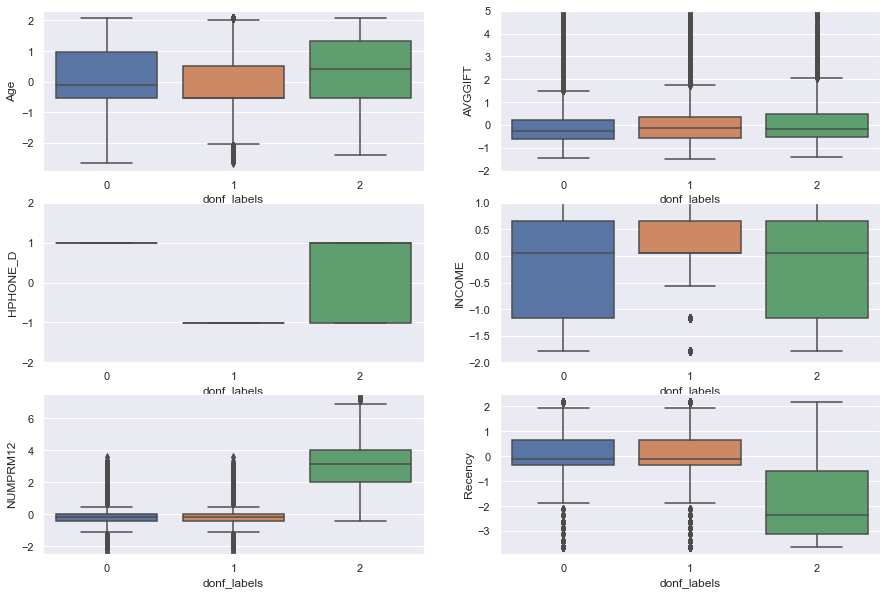

In [304]:
# plotting sub-plots to analyse the distribution of Donors Clusters

plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.boxplot(x='donf_labels', y='Age', data=donors_f)

plt.subplot(3,2,2)
sns.boxplot(x='donf_labels', y='AVGGIFT', data=donors_f)
plt.ylim(-2,5)

plt.subplot(3,2,3)
sns.boxplot(x='donf_labels', y='HPHONE_D', data=donors_f)
plt.ylim(-2,2)

plt.subplot(3,2,4)
sns.boxplot(x='donf_labels', y='INCOME', data=donors_f)
plt.ylim(-2,1)

plt.subplot(3,2,5)
sns.boxplot(x='donf_labels', y='NUMPRM12', data=donors_f)
plt.ylim(-2.5,7.5)

plt.subplot(3,2,6)
sns.boxplot(x='donf_labels', y='Recency', data=donors_f)

(-2.5, 2.5)

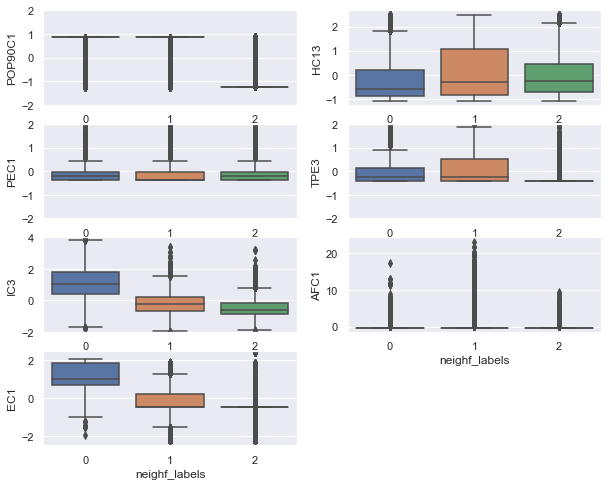

In [281]:
# plotting sub-plots to analyse the distribution of Donors Clusters

plt.figure(figsize=(10,8))

plt.subplot(4,2,1)
sns.boxplot(x='neighf_labels', y='POP90C1', data=donors_f)
plt.ylim(-2,2)

plt.subplot(4,2,2)
sns.boxplot(x='neighf_labels', y='HC13', data=donors_f)

plt.subplot(4,2,3)
sns.boxplot(x='neighf_labels', y='PEC1', data=donors_f)
plt.ylim(-2,2)

plt.subplot(4,2,4)
sns.boxplot(x='neighf_labels', y='TPE3', data=donors_f)
plt.ylim(-2,2)

plt.subplot(4,2,5)
sns.boxplot(x='neighf_labels', y='IC3', data=donors_f)
plt.ylim(-2,4)

plt.subplot(4,2,6)
sns.boxplot(x='neighf_labels', y='AFC1', data=donors_f)

plt.subplot(4,2,7)
sns.boxplot(x='neighf_labels', y='EC1', data=donors_f)
plt.ylim(-2.5,2.5)

(-5.0, 5.0)

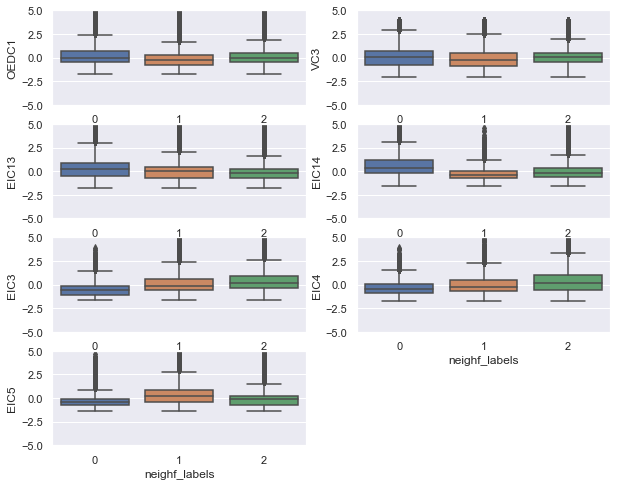

In [282]:
# plotting sub-plots to analyse the distribution of Donors Clusters

plt.figure(figsize=(10,8))

plt.subplot(4,2,1)
sns.boxplot(x='neighf_labels', y='OEDC1', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,2)
sns.boxplot(x='neighf_labels', y='VC3', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,3)
sns.boxplot(x='neighf_labels', y='EIC13', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,4)
sns.boxplot(x='neighf_labels', y='EIC14', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,5)
sns.boxplot(x='neighf_labels', y='EIC3', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,6)
sns.boxplot(x='neighf_labels', y='EIC4', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,7)
sns.boxplot(x='neighf_labels', y='EIC5', data=donors_f)
plt.ylim(-5,5)

**Joining the 2 Perspectives - Donors & Neighborhood**

In [283]:
donors_f.groupby(['donf_labels', 'neighf_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('neighf_labels', 'donf_labels', 0)

donf_labels        0      1     2
neighf_labels                    
0              10451   9287  1494
1              16166  16199  2133
2              16073  16755  1945

In [284]:
df_centroids = donors_f.groupby(['neighf_labels',  'donf_labels']).mean()
df_centroids.index

MultiIndex([(0, 0),
            (0, 1),
            (0, 2),
            (1, 0),
            (1, 1),
            (1, 2),
            (2, 0),
            (2, 1),
            (2, 2)],
           names=['neighf_labels', 'donf_labels'])

In [285]:
from scipy.cluster.hierarchy import dendrogram

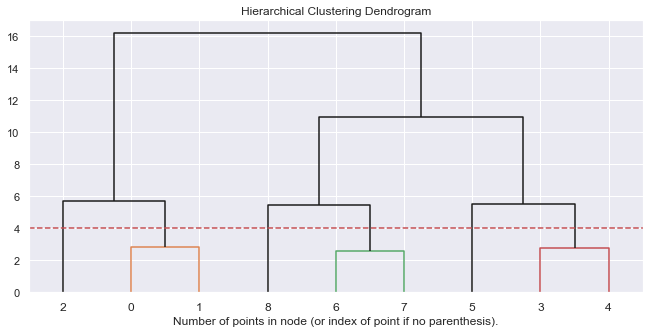

In [286]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='ward', affinity='euclidean')

model = model.fit(df_centroids)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level',p=3,color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [289]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=6
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  

TCODE    INCOME       HIT  MALEMILI   MALEVET  \
neighf_labels donf_labels                                                     
0             0           -0.023687  0.539588  0.411377 -0.042189  0.082491   
              1           -0.016014  0.423686 -0.227041 -0.053996 -0.049349   
              2            0.085987  0.428983  0.262347 -0.048473 -0.163333   
1             0           -0.015265 -0.188460  0.313910  0.155866  0.094806   
              1           -0.013712 -0.027874 -0.278470  0.136747 -0.140012   
              2            0.017125 -0.232021  0.209979  0.075058 -0.199432   
2             0            0.023595 -0.235210  0.151051 -0.115668  0.088307   
              1            0.013439 -0.112327 -0.361756 -0.106254 -0.011936   
              2            0.049238 -0.287529  0.020067 -0.123803 -0.112259   

                           VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV  \
neighf_labels donf_labels                                                     
0             0            0.083745  0.085244  0.127618  0.268812 -0.042351   
              1            0.002715  0.033790  0.202860  0.092732 -0.081850   
              2           -0.199668  0.023481  0.022107  0.117470 -0.111587   
1             0            0.053375 -0.020522 -0.135448 -0.196453  0.144639   
              1            0.053008 -0.156259 -0.093368 -0.244684  0.124244   
              2           -0.200420 -0.115836 -0.259262 -0.274645  0.036777   
2             0           -0.022326  0.084055  0.041911  0.091399 -0.100243   
              1           -0.058754  0.033662  0.026949  0.140889 -0.070131   
              2           -0.284276 -0.022994 -0.062086  0.025507 -0.140663   

                           ...  MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
neighf_labels donf_labels  ...                                           
0             0            ...  0.052504  0.010841  0.040862  0.059467   
              1            ...  0.155603  0.101868  0.138085  0.043407   
              2            ... -0.018462  0.898757  0.497039 -0.035680   
1             0            ... -0.040651 -0.090776 -0.062274  0.005502   
              1            ...  0.103276 -0.012216  0.021882 -0.030436   
              2            ... -0.155561  0.593388  0.200171 -0.106942   
2             0            ... -0.114918 -0.119457 -0.099414  0.002005   
              1            ... -0.023207 -0.061829 -0.046336 -0.015516   
              2            ... -0.213011  0.490269  0.075841 -0.057259   

                            AVGGIFT  CONTROLN  HPHONE_D       Age   Recency  \
neighf_labels donf_labels                                                     
0             0            0.044118  0.086175  0.993974  0.113887  0.149256   
              1            0.166148  0.421160 -1.006062 -0.154595  0.141231   
              2            0.637237 -0.840937  0.058214  0.396611 -2.004040   
1             0           -0.085719 -0.050686  0.993974  0.141257  0.132301   
              1            0.048722  0.253917 -1.006062 -0.172022  0.133714   
              2            0.325183 -0.826273  0.016929  0.381078 -1.962313   
2             0           -0.150229 -0.169321  0.993974  0.065507  0.118054   
              1           -0.060738 -0.044739 -1.006062 -0.144095  0.118804   
              2            0.194882 -0.830771 -0.030209  0.362240 -1.997269   

                           hclust_labels  
neighf_labels donf_labels                 
0             0                        0  
              1                        0  
              2                        3  
1             0                        2  
              1                        2  
              2                        4  
2             0                        1  
              1                        1  
              2                        5  

[9 rows x 228 columns]

In [290]:
cluster_mapper=df_centroids['hclust_labels'].to_dict()
cluster_mapper

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 3,
 (1, 0): 2,
 (1, 1): 2,
 (1, 2): 4,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 5}

In [291]:
donors_f['merged_labels'] = donors_f.apply(
    lambda row: cluster_mapper[
        (row['neighf_labels'], row['donf_labels'])
    ], axis=1
)

In [292]:
donors_f.groupby('merged_labels').mean()

TCODE    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  \
merged_labels                                                               
0             -0.020077  0.485054  0.110993 -0.047745  0.020459  0.045620   
1              0.018412 -0.172492 -0.110679 -0.110863  0.037144 -0.040918   
2             -0.014488 -0.108085  0.017418  0.146297 -0.022723  0.053192   
3              0.085987  0.428983  0.262347 -0.048473 -0.163333 -0.199668   
4              0.017125 -0.232021  0.209979  0.075058 -0.199432 -0.200420   
5              0.049238 -0.287529  0.020067 -0.123803 -0.112259 -0.284276   

               WWIIVETS  LOCALGOV  STATEGOV    FEDGOV  ...  MAXRAMNT  \
merged_labels                                          ...             
0              0.061034  0.163020  0.185964 -0.060936  ...  0.053671   
1              0.058335  0.034274  0.116658 -0.084874  ... -0.090044   
2             -0.088460 -0.114386 -0.220593  0.134431  ... -0.051456   
3              0.023481  0.022107  0.117470 -0.111587  ...  0.898757   
4             -0.115836 -0.259262 -0.274645  0.036777  ...  0.593388   
5             -0.022994 -0.062086  0.025507 -0.140663  ...  0.490269   

               LASTGIFT   TIMELAG   AVGGIFT  CONTROLN  HPHONE_D       Age  \
merged_labels                                                               
0              0.086607  0.051910  0.101535  0.243790  0.052930 -0.012438   
1             -0.072323 -0.006937 -0.104554 -0.105736 -0.026819 -0.041471   
2             -0.020153 -0.012485 -0.018430  0.101771 -0.007064 -0.015542   
3              0.497039 -0.035680  0.637237 -0.840937  0.058214  0.396611   
4              0.200171 -0.106942  0.325183 -0.826273  0.016929  0.381078   
5              0.075841 -0.057259  0.194882 -0.830771 -0.030209  0.362240   

                Recency  donf_labels  neighf_labels  
merged_labels                                        
0              0.145480     0.470514            0.0  
1              0.118437     0.510387            2.0  
2              0.133008     0.500510            1.0  
3             -2.004040     2.000000            0.0  
4             -1.962313     2.000000            1.0  
5             -1.997269     2.000000            2.0  

[6 rows x 229 columns]

In [293]:
donors_f

OSOURCE     TCODE STATE     ZIP MAILCODE NOEXCH MDMAUD DOMAIN HOMEOWNR  \
0         GRI -0.161431    IL   61081        O      0   XXXX     T2        U   
1         BOA -0.154633    CA   91326        O      0   XXXX     S1        H   
2         AMH -0.154633    NC   27017        O      0   XXXX     R2        U   
3         BRY -0.161431    CA   95953        O      0   XXXX     R2        U   
4         MBC -0.161431    FL   33176        O      0   XXXX     S2        H   
...       ...       ...   ...     ...      ...    ...    ...    ...      ...   
90498     LHJ -0.161431    FL  32776-        O      0   XXXX     S2        H   
90499     ASE -0.154633    AK   99504        O      0   XXXX     C2        U   
90500     DCD -0.154633    TX   77379        O      0   XXXX     C1        H   
90501     MBC -0.154633    MI   48910        O      0   XXXX     C3        U   
90502     PRV -0.161431    CA   91320        O      0   XXXX     C1        H   

      CHILD03  ...  HPHONE_D MDMAUD_R MDMAUD_F  MDMAUD_A GEOCODE2       Age  \
0           N  ... -1.006062        X        X         X        C  0.220585   
1           N  ... -1.006062        X        X         X        A -0.812616   
2           N  ...  0.993974        X        X         X        C -0.537096   
3           N  ...  0.993974        X        X         X        C  0.840505   
4           N  ...  0.993974        X        X         X        A  1.391545   
...       ...  ...       ...      ...      ...       ...      ...       ...   
90498       N  ... -1.006062        X        X         X        C -0.537096   
90499       N  ... -1.006062        X        X         X        C -0.537096   
90500       N  ...  0.993974        X        X         X        A -0.674856   
90501       N  ...  0.993974        X        X         X        B  0.151705   
90502       N  ...  0.993974        X        X         X        A  0.013945   

        Recency  donf_labels  neighf_labels  merged_labels  
0     -0.092966            1              2              1  
1     -0.092966            1              0              0  
2     -0.092966            0              2              1  
3     -0.092966            0              2              1  
4     -0.350495            2              0              3  
...         ...          ...            ...            ...  
90498 -0.608024            1              2              1  
90499 -0.608024            1              1              2  
90500 -0.848939            0              0              0  
90501 -2.626722            2              0              3  
90502 -3.391003            2              0              3  

[90503 rows x 314 columns]

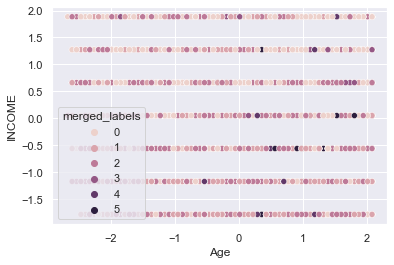

In [302]:
sns.scatterplot(x="Age", y="INCOME",data=donors_f, hue="merged_labels")

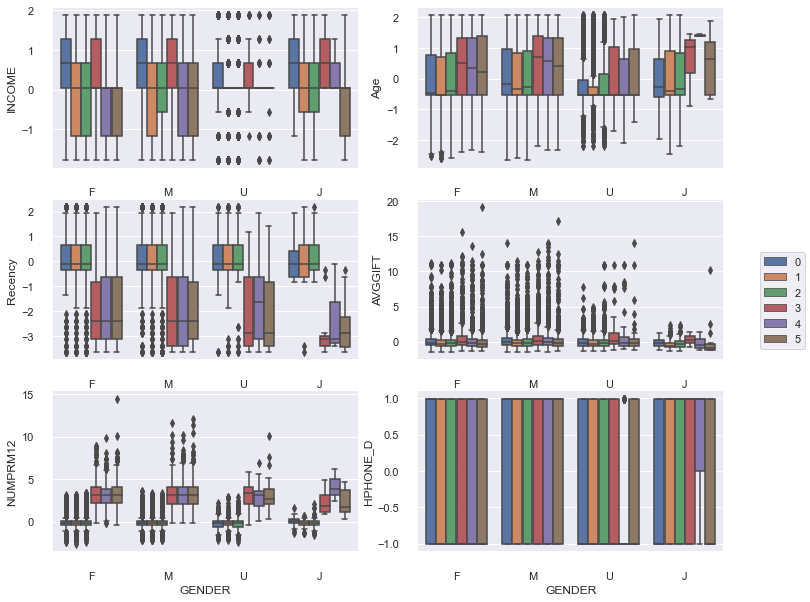

In [295]:
f, axes = plt.subplots(3, 2,figsize=(12,10))
ax1=sns.boxplot(x="GENDER", y="INCOME",hue="merged_labels",data=donors_f, ax=axes[0,0])
ax2=sns.boxplot(x="GENDER", y="Age",hue="merged_labels", data=donors_f, ax=axes[0,1])
ax3=sns.boxplot(x="GENDER", y="Recency",hue="merged_labels",data=donors_f, ax=axes[1,0])
ax4=sns.boxplot(x="GENDER", y='AVGGIFT',hue="merged_labels",data=donors_f, ax=axes[1,1])
ax5=sns.boxplot(x="GENDER", y='NUMPRM12', hue="merged_labels",data=donors_f, ax=axes[2,0])
ax6=sns.boxplot(x="GENDER", y='HPHONE_D',hue="merged_labels",data=donors_f, ax=axes[2,1])

handles, labels = ax1.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='center right')
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()
ax6.get_legend().remove()

sns.despine(offset=10, trim=True)
plt.show()

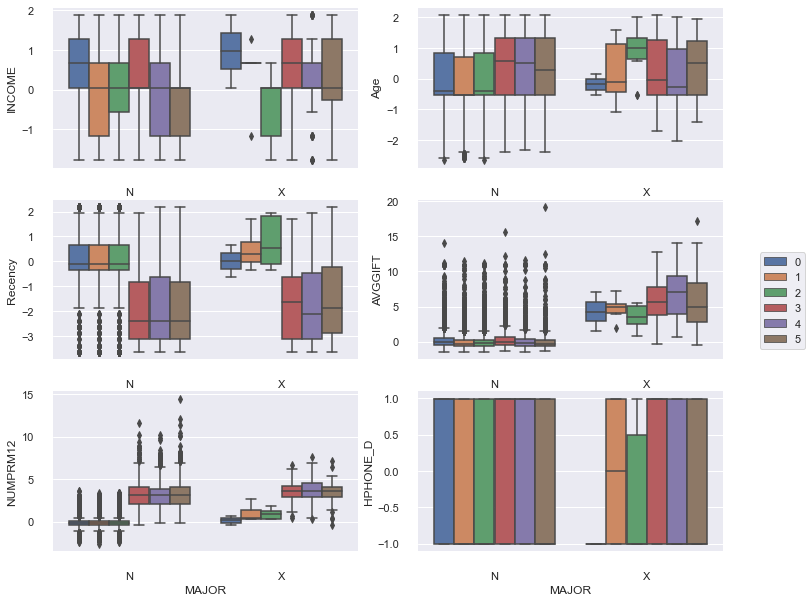

In [296]:
f, axes = plt.subplots(3, 2,figsize=(12,10))
ax1=sns.boxplot(x="MAJOR", y="INCOME",hue="merged_labels",data=donors_f, ax=axes[0,0])
ax2=sns.boxplot(x="MAJOR", y="Age",hue="merged_labels", data=donors_f, ax=axes[0,1])
ax3=sns.boxplot(x="MAJOR", y="Recency",hue="merged_labels",data=donors_f, ax=axes[1,0])
ax4=sns.boxplot(x="MAJOR", y='AVGGIFT',hue="merged_labels",data=donors_f, ax=axes[1,1])
ax5=sns.boxplot(x="MAJOR", y='NUMPRM12', hue="merged_labels",data=donors_f, ax=axes[2,0])
ax6=sns.boxplot(x="MAJOR", y='HPHONE_D',hue="merged_labels",data=donors_f, ax=axes[2,1])

handles, labels = ax1.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='center right')
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()
ax6.get_legend().remove()

sns.despine(offset=10, trim=True)
plt.show()

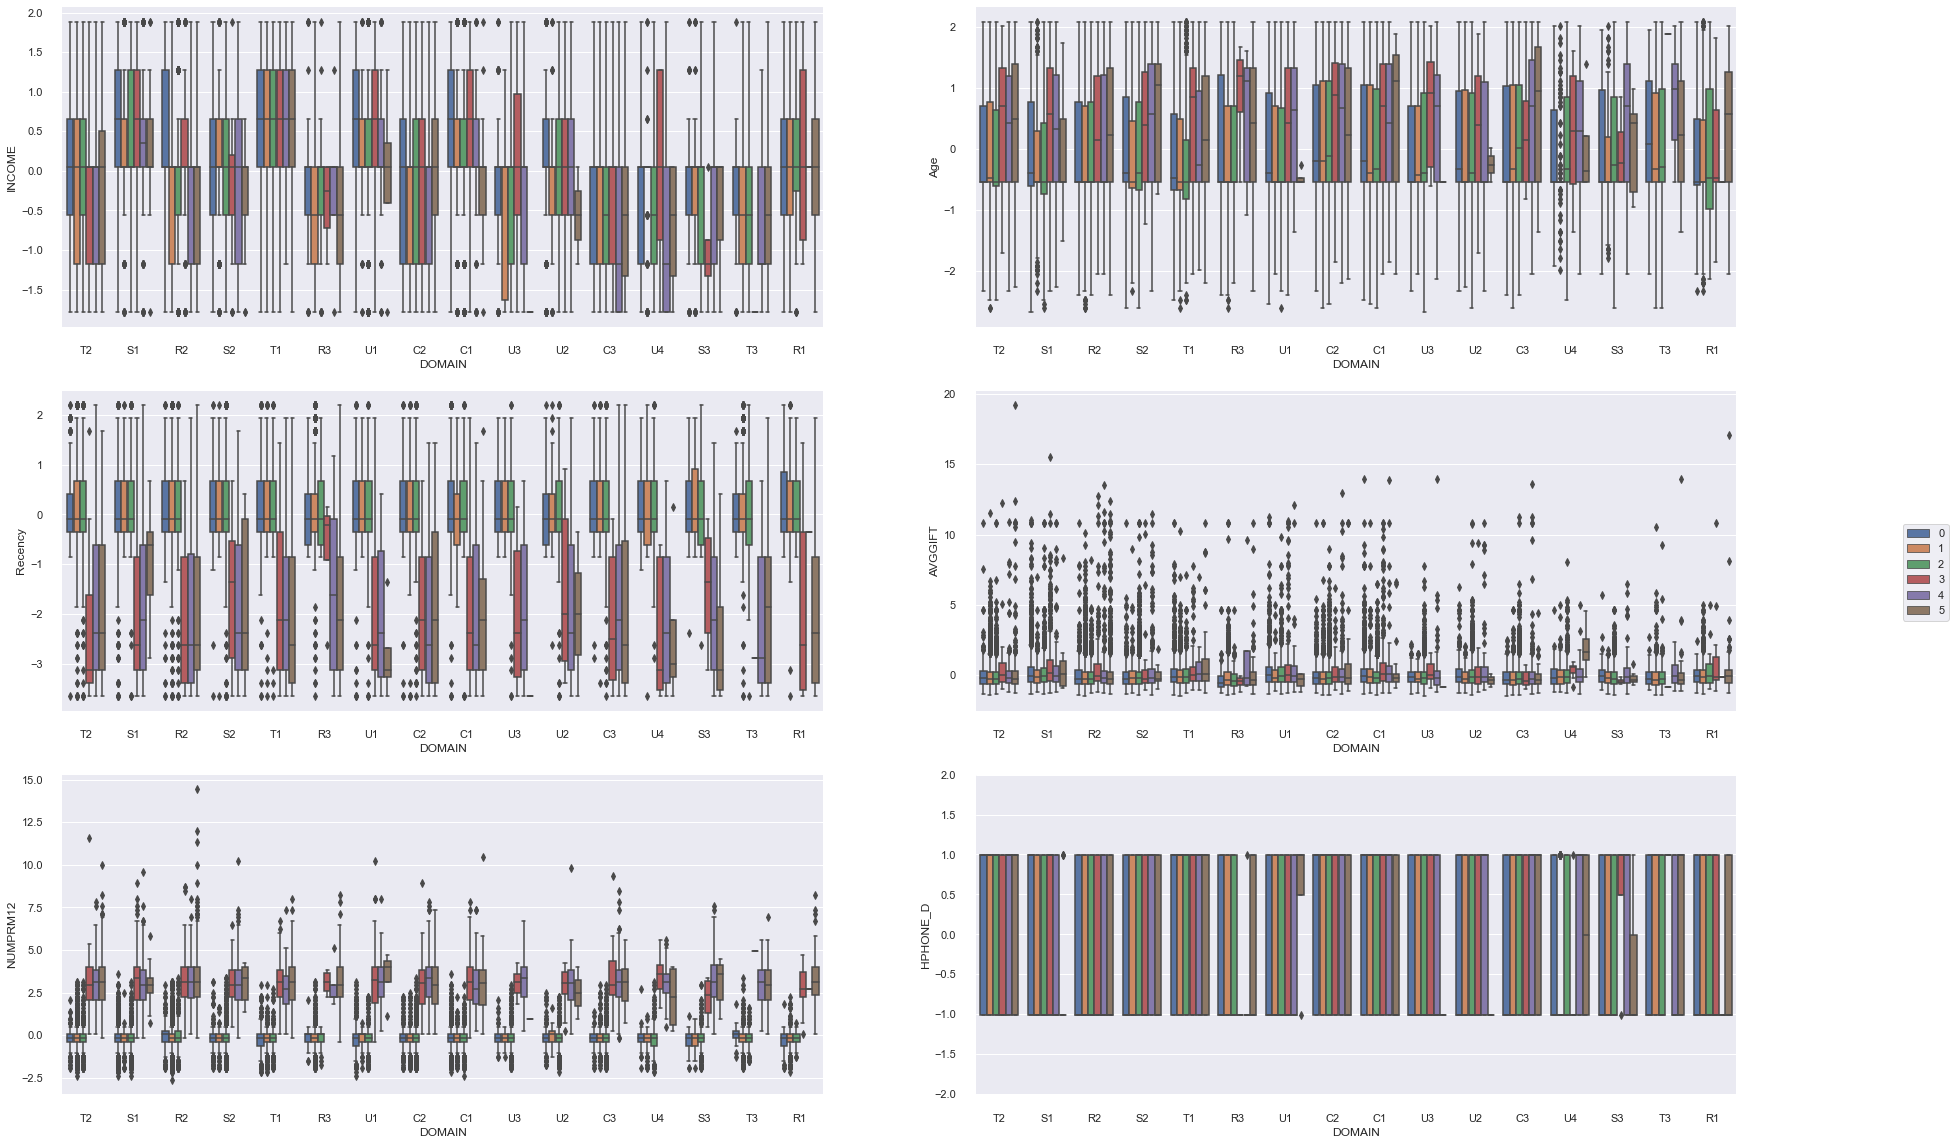

In [297]:
f, axes = plt.subplots(3, 2,figsize=(30,20))
ax1=sns.boxplot(x="DOMAIN", y="INCOME",hue="merged_labels",data=donors_f, ax=axes[0,0])

ax2=sns.boxplot(x="DOMAIN", y="Age",hue="merged_labels", data=donors_f, ax=axes[0,1])

plt.ylim(-2,2)
ax3=sns.boxplot(x="DOMAIN", y="Recency",hue="merged_labels",data=donors_f, ax=axes[1,0])

plt.ylim(-2,5)
ax4=sns.boxplot(x="DOMAIN", y='AVGGIFT',hue="merged_labels",data=donors_f, ax=axes[1,1])
plt.ylim(-2,5)

ax5=sns.boxplot(x="DOMAIN", y='NUMPRM12', hue="merged_labels",data=donors_f, ax=axes[2,0])
plt.ylim(-2,2)

ax6=sns.boxplot(x="DOMAIN", y='HPHONE_D',hue="merged_labels",data=donors_f, ax=axes[2,1])

handles, labels = ax1.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='center right')
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()
ax6.get_legend().remove()

sns.despine(offset=10, trim=True)
plt.show()

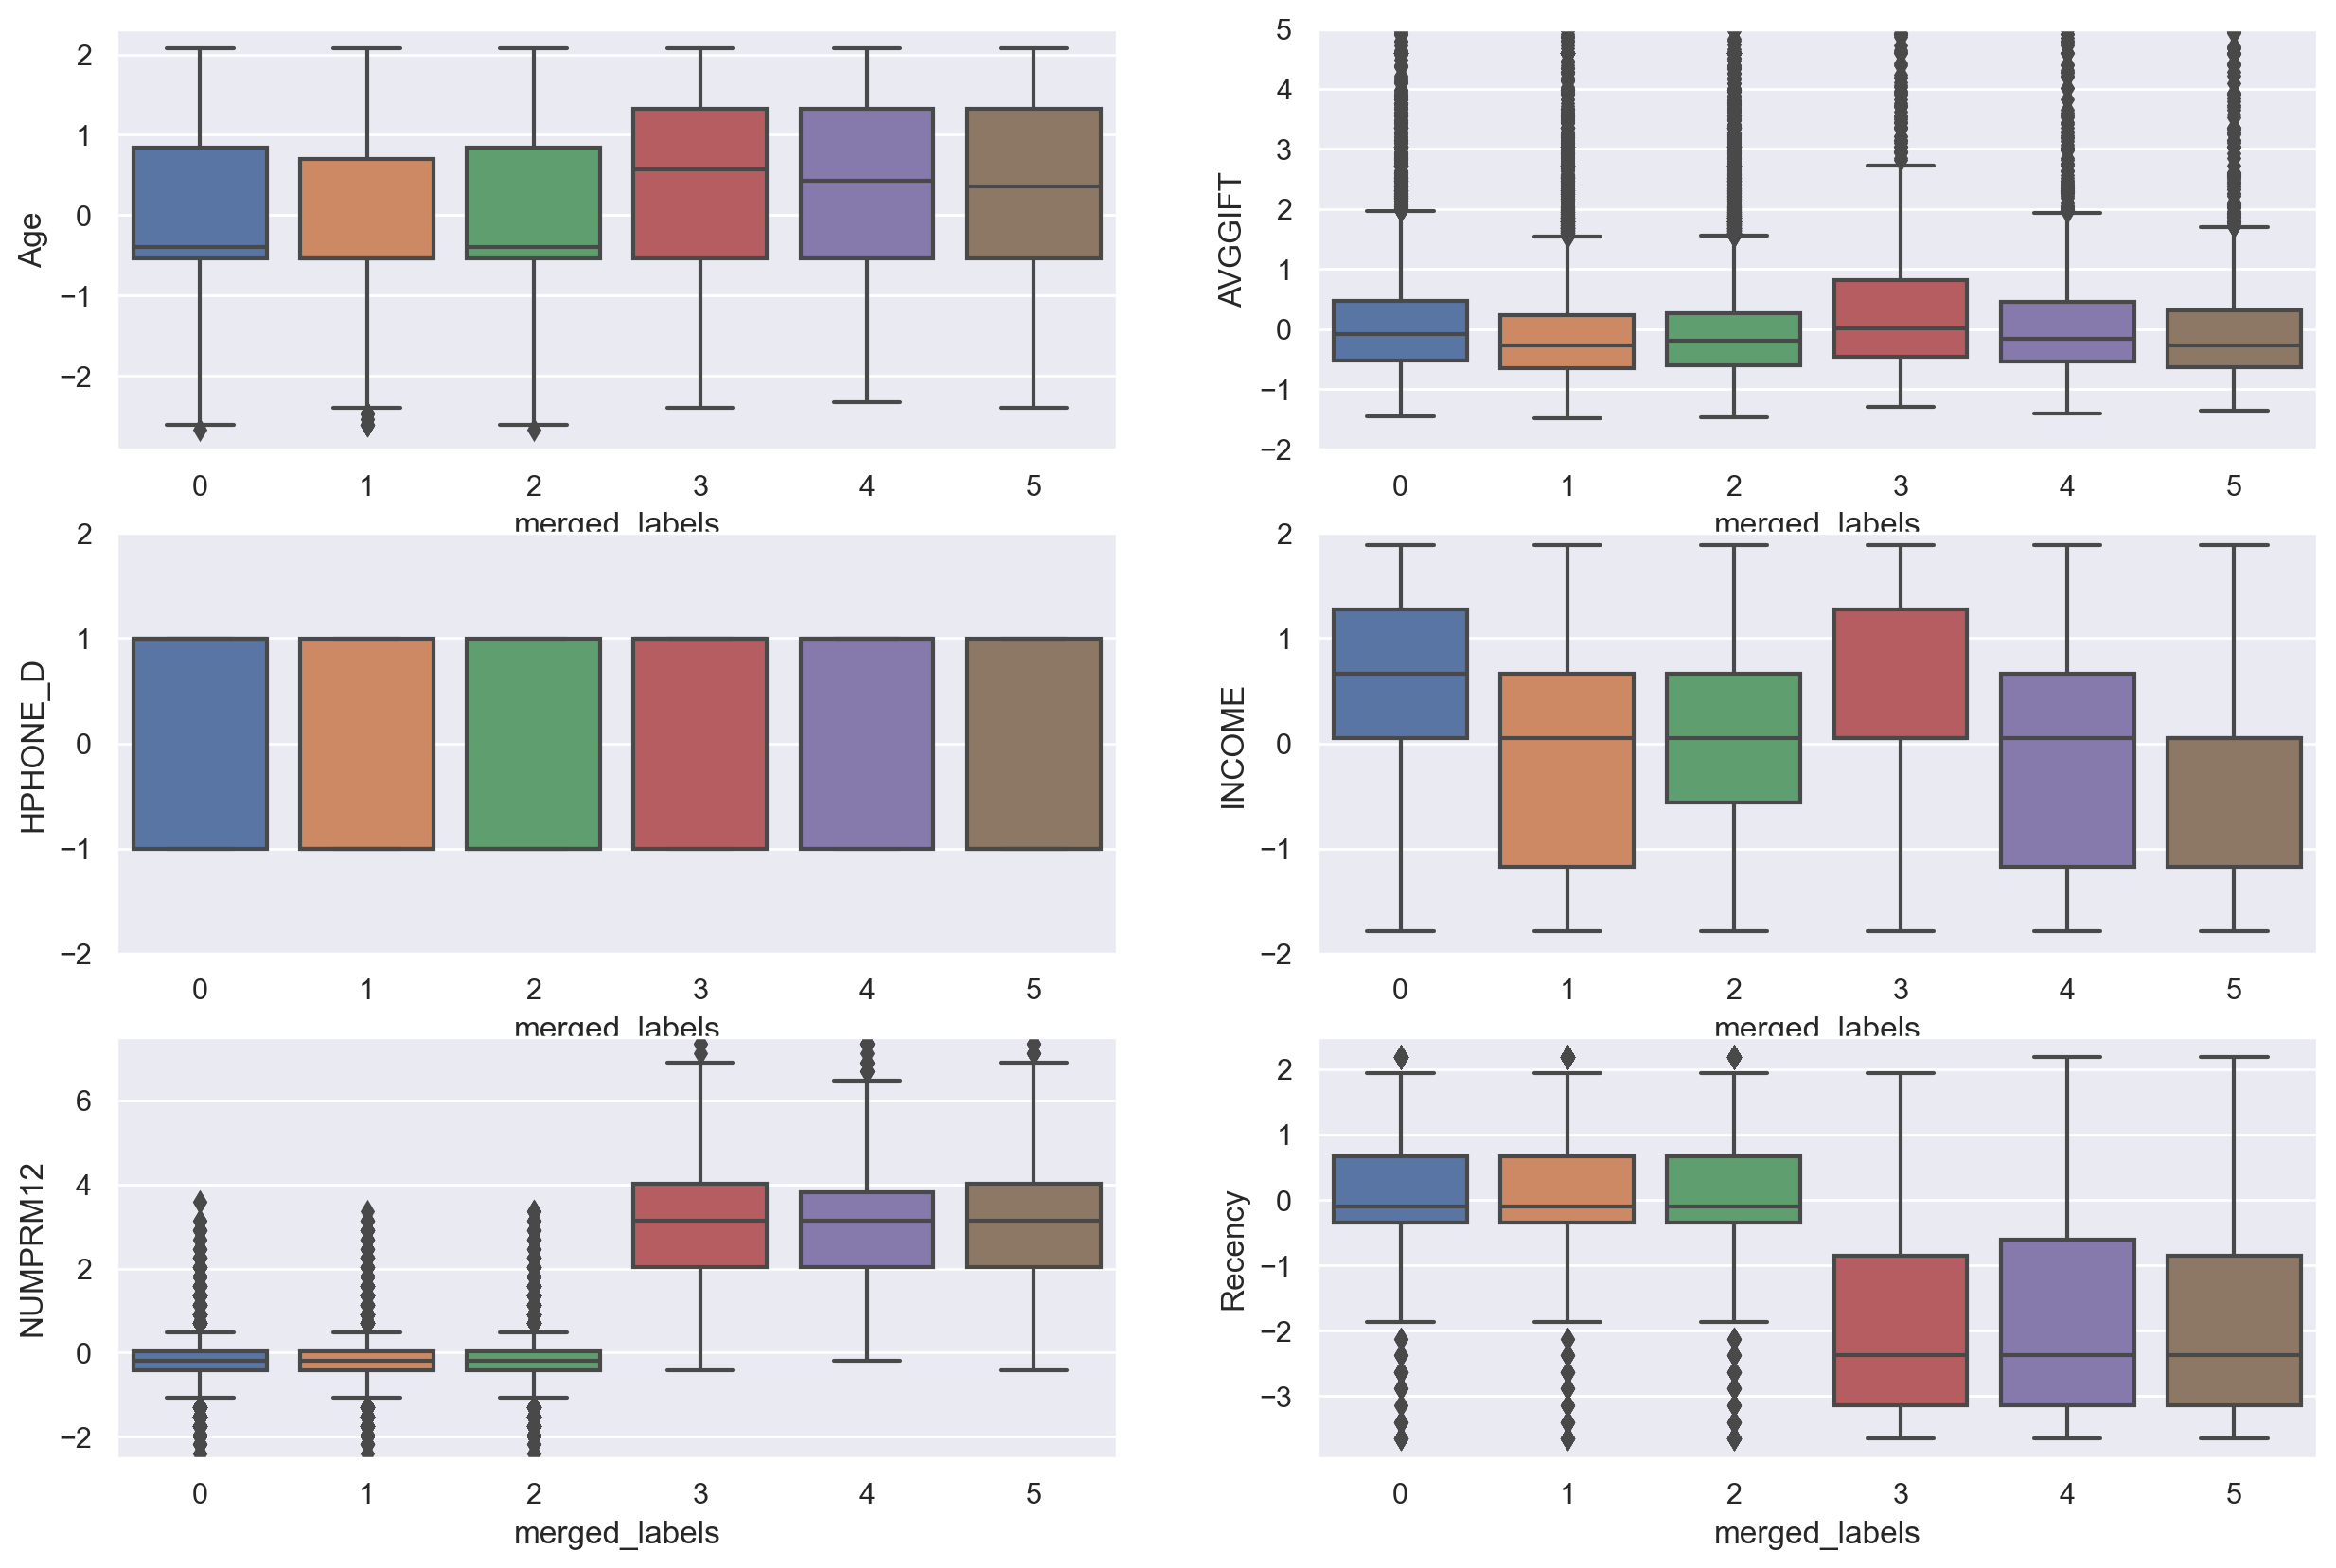

In [298]:
# plotting sub-plots to analyse the distribution of Donors Clusters

plt.figure(figsize=(15,10), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='merged_labels', y='Age', data=donors_f)

plt.subplot(3,2,2)
sns.boxplot(x='merged_labels', y='AVGGIFT', data=donors_f)
plt.ylim(-2,5)

plt.subplot(3,2,3)
sns.boxplot(x='merged_labels', y='HPHONE_D', data=donors_f)
plt.ylim(-2,2)

plt.subplot(3,2,4)
sns.boxplot(x='merged_labels', y='INCOME', data=donors_f)
plt.ylim(-2,2)

plt.subplot(3,2,5)
sns.boxplot(x='merged_labels', y='NUMPRM12', data=donors_f)
plt.ylim(-2.5,7.5)

plt.subplot(3,2,6)
sns.boxplot(x='merged_labels', y='Recency', data=donors_f)

(-2.5, 2.5)

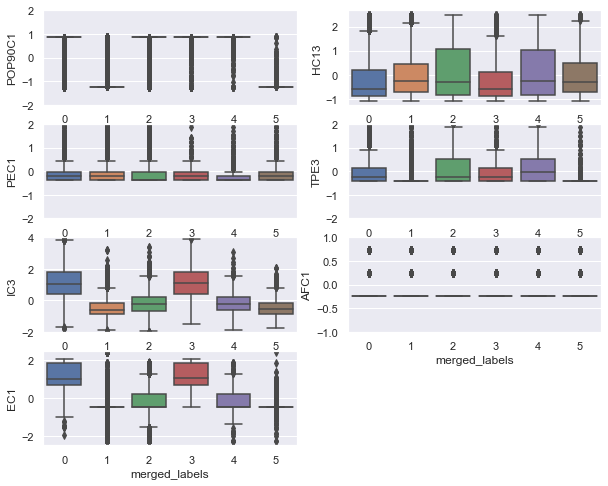

In [299]:
# plotting sub-plots to analyse the distribution of Donors Clusters

plt.figure(figsize=(10,8))

plt.subplot(4,2,1)
sns.boxplot(x='merged_labels', y='POP90C1', data=donors_f)
plt.ylim(-2,2)

plt.subplot(4,2,2)
sns.boxplot(x='merged_labels', y='HC13', data=donors_f)

plt.subplot(4,2,3)
sns.boxplot(x='merged_labels', y='PEC1', data=donors_f)
plt.ylim(-2,2)

plt.subplot(4,2,4)
sns.boxplot(x='merged_labels', y='TPE3', data=donors_f)
plt.ylim(-2,2)

plt.subplot(4,2,5)
sns.boxplot(x='merged_labels', y='IC3', data=donors_f)
plt.ylim(-2,4)

plt.subplot(4,2,6)
sns.boxplot(x='merged_labels', y='AFC1', data=donors_f)
plt.ylim(-1,1)

plt.subplot(4,2,7)
sns.boxplot(x='merged_labels', y='EC1', data=donors_f)
plt.ylim(-2.5,2.5)

(-5.0, 5.0)

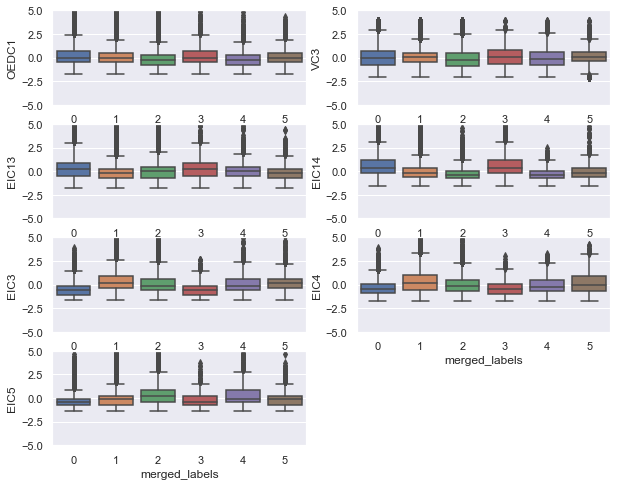

In [300]:
# plotting sub-plots to analyse the distribution of Donors Clusters

plt.figure(figsize=(10,8))

plt.subplot(4,2,1)
sns.boxplot(x='merged_labels', y='OEDC1', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,2)
sns.boxplot(x='merged_labels', y='VC3', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,3)
sns.boxplot(x='merged_labels', y='EIC13', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,4)
sns.boxplot(x='merged_labels', y='EIC14', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,5)
sns.boxplot(x='merged_labels', y='EIC3', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,6)
sns.boxplot(x='merged_labels', y='EIC4', data=donors_f)
plt.ylim(-5,5)

plt.subplot(4,2,7)
sns.boxplot(x='merged_labels', y='EIC5', data=donors_f)
plt.ylim(-5,5)

<hr>
<a class="anchor" id="comparing">
    
## 9.3. Comparing the cluster algorithms
    
</a>

In [ ]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(donors[metric_features]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(donors[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(donors[metric_features], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(donors[metric_features], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
df_join=pd.concat([df_donf,df_neighf],axis=1)
df_join

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_join) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_join)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_join, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_join, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<hr>
<a class="anchor" id="kprototypes">
    
## 9.4. K-Prototypes
    
</a>

In [ ]:
#pip install kmodes

In [ ]:
from sklearn.preprocessing import PowerTransformer
from kmodes.kprototypes import KPrototypes

In [ ]:
donors.columns.tolist()

In [ ]:
#Get index of the non_metric_variables
lista_proto=[]
for x in donors.columns:
    if x in non_metric_features:
        donors[x] = donors[x].astype(str)
        index_no = donors.columns.get_loc(x) 
        lista_proto.append(index_no)
print(lista_proto)

In [ ]:
# Converting the dataset into matrix
X = donors.values
X

In [ ]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=0, n_init=10,n_jobs=-1,verbose=1)

In [ ]:
clusters = kproto.fit_predict(X, categorical=lista_proto)

In [ ]:
#Visualize K-Prototype clustering 
X_df=pd.DataFrame(X,columns=donors.columns)
X_df['Cluster_id']=clusters
print(X_df['Cluster_id'].value_counts())

In [ ]:
X_df.head()

In [ ]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='HUANG', n_init=1, random_state=0)
    kproto.fit_predict(X,  categorical=lista_proto)
    cost.append(kproto.cost_)

plt.plot(cost)

In [ ]:
# Plot the results
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Data points categorized with category score', fontsize=18)
    plt.xlabel('Category Score', fontsize=16)
    plt.ylabel('Category Type', fontsize=16)
plt.show()

In [ ]:
sns.scatterplot(x="Age",y="Recency",hue="Cluster_id",data=X_df)

In [ ]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='Cluster_id', y='INCOME', data=X_df)

plt.subplot(3,2,2)
sns.boxplot(x='Cluster_id', y='Recency', data=X_df)

plt.subplot(3,2,3)
sns.boxplot(x='Cluster_id', y='AVGGIFT', data=X_df)
plt.ylim(-2,5)

plt.subplot(3,2,4)
sns.boxplot(x='Cluster_id', y='POP90C1', data=X_df)
plt.ylim(-2,1)

plt.subplot(3,2,5)
sns.boxplot(x='Cluster_id', y='Age', data=X_df)

plt.subplot(3,2,6)
sns.boxplot(x='Cluster_id', y='HC13', data=X_df)


In [ ]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(15,15), dpi=100)

plt.subplot(3,2,1)
sns.boxplot(x='Cluster_id', y='OEDC1', data=X_df)
plt.ylim(-2,4)

plt.subplot(3,2,2)
sns.boxplot(x='Cluster_id', y='PEC1', data=X_df)
plt.ylim(-1,1)

plt.subplot(3,2,3)
sns.boxplot(x='Cluster_id', y='NUMPRM12', data=X_df)
plt.ylim(-2.5,2.5)

plt.subplot(3,2,4)
sns.boxplot(x='Cluster_id', y='TPE3', data=X_df)
plt.ylim(-2.5,2.5)

plt.subplot(3,2,5)
sns.boxplot(x='Cluster_id', y='IC3', data=X_df)

plt.subplot(3,2,6)
sns.boxplot(x='Cluster_id', y='AFC1', data=X_df)
plt.ylim(-1,2)

In [ ]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='Cluster_id', y='EC1', data=X_df)
plt.ylim(-3,3)

plt.subplot(3,2,2)
sns.boxplot(x='Cluster_id', y='VC3', data=X_df)
plt.ylim(-2.5,4)

plt.subplot(3,2,3)
sns.boxplot(x='Cluster_id', y='EIC13', data=X_df)
plt.ylim(-2.5,4)

plt.subplot(3,2,4)
sns.boxplot(x='Cluster_id', y='EIC14', data=X_df)
plt.ylim(-2.5,4)

plt.subplot(3,2,5)
sns.boxplot(x='Cluster_id', y='EIC5', data=X_df)
plt.ylim(-3,3)

plt.subplot(3,2,6)
sns.boxplot(x='Cluster_id', y='EIC4', data=X_df)

In [ ]:
sns.catplot(hue='Cluster_id', x='DOMAIN', kind="count",data=X_df)
sns.catplot(hue='Cluster_id', x='MAJOR', kind="count",data=X_df)
sns.catplot(hue='Cluster_id', x='RFA_2', kind="count",data=X_df)
sns.catplot(hue='Cluster_id', x='PEPSTRFL', kind="count",data=X_df)
sns.catplot(x='SOLIH',hue="Cluster_id", kind="count", data=X_df)

<hr>
<a class="anchor" id="tsne">
    
## 9.5. T-SNE
    
</a>

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2,perplexity=5, n_jobs=-1).fit_transform(donors_f[metric_features])
X_embedded.shape

In [ ]:
# t-SNE visualization
pd.DataFrame(X_embedded).plot.scatter(x=0, y=1, c=donors_f['merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

<hr>
<a class="anchor" id="classification">
    
# 10. Outliers Classification
    
</a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = X_df.drop(columns={"Cluster_id"})
X=X[metric_features]
y =  X_df.loc[:, 'Cluster_id'] # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0, max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

In [ ]:
# Test accuracy
print("It is estimated that in average, we are able to predict {0:.2f}% of the donors correctly".format(clf.score(X_test, y_test)*100))

In [ ]:
labels_out = clf.predict(df_outliers[metric_features]) # predicting to which cluster each outlier belongs
df_out=df_outliers[metric_features].copy()
df_out["cluster_label"] = labels_out
df_out.head()

In [ ]:
print(df_out['cluster_label'].value_counts())